<a href="https://colab.research.google.com/github/Bovi-analytics/Hut-et-al-2022/blob/main/DefinitiveModelLyingTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for Lying time

*   Load libraries
*   Create dataset lying grouped per 3/4/5
*   Descriptives dataset lying all cows
*   Run models lying grouped in 7 groups per 4
    * Create subsets lying
    * Descriptives lactating AMS/CMS and dry cows
    * Models linear mixed models (glmmTNB):
      1. THI mean
      2. THI max
      3. THI min
      4. THI mean 1 day before
      5. THI mean 2 days before
      6. Temperature mean
      7. Temperature max
      8. Temperature min
      9. Temperature mean 1 day before
      10. Temperature mean 2 days before
      a= lactating cows AMS farms
      b= lactating cows CMS farms
      c= dry cows
*   Lying time figures:
    * THI mean figures
    * Temperature mean figures

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
%reload_ext rpy2.ipython

# Libraries

In [ ]:
%%R
lib_loc <- "/content/drive/Shareddrives/Bovi-Analytics/R-lib/"

In [ ]:
%%R
package_list <- c("glmmTMB",
                  "dplyr",
                  "ggplot2",
                  "emmeans",
                  "lsmeans",
                  "plyr")

for (pkg in package_list) {
  if (pkg %in% rownames(.packages()) == FALSE)
  {library(pkg, lib.loc = lib_loc, character.only = TRUE)}

}

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.

R[write to console]: ------------------------------------------------------------------------------

R[write to console]: You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

R[write to console]: ------------------------------------------------------------------------------

R[write to console]: 
Attaching package: ‘plyr’


R[write to 

# Create dataset lying grouped per 3/4/5

In [ ]:
%%R
url_lying <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/in/SensorData/ObservationType=LyingTimeMinutesPerDay/part-00131-tid-7288064156538290647-292796ee-9893-4de2-a04f-ea381f27134d-125-2.c000.csv'
dataset_behaviour <- read.csv(url_lying, header = TRUE, sep = ",") %>% 
 dplyr::mutate(
    Date = as.Date(EventDate,"%Y-%m-%d")
    ) %>%
 dplyr::select(
     -c(EventDate, Hour)
    ) %>%
 mutate(DimCat = case_when(DaysInMilk <= 0 ~ 0, #condition 1
                         DaysInMilk <= 21  ~ 1, #condition 2
                         DaysInMilk <= 60  ~ 3, #condition 3
                         DaysInMilk <= 120 ~ 4, #condition 4
                         DaysInMilk <= 200 ~ 5, #condition 5
                         DaysInMilk >= 200 ~ 6
    )) %>%
  mutate(AutomaticMilking = case_when(HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314 ~ 1, 
                         HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888~ 0
    )) %>%
  mutate(CowLac = paste(LactationNumber, AnimalEartag)) 

In [ ]:
%%R
url_KNMI3 <-'/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/df_KNMI_per3.csv'
url_KNMI4 <-'/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/df_KNMI_per4.csv'
url_KNMI5 <-'/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/df_KNMI_per5.csv'

In [ ]:
%%R
dataset_KNMI3 <- read.csv(url_KNMI3, header = TRUE, sep = ",") %>% 
  dplyr::mutate(
      Date = as.Date(Date,"%Y-%m-%d")
  )
  dataset_KNMI4 <- read.csv(url_KNMI4, header = TRUE, sep = ",") %>% 
  dplyr::mutate(
      Date = as.Date(Date,"%Y-%m-%d")
  )
  dataset_KNMI5 <- read.csv(url_KNMI5, header = TRUE, sep = ",") %>% 
  dplyr::mutate(
      Date = as.Date(Date,"%Y-%m-%d")
  )

In [ ]:
%%R
df_joined_per4 <- dataset_behaviour %>%
  dplyr::left_join(dataset_KNMI4, by = c("HerdIdentifier", "Date")) %>%                                                              
  dplyr::filter(Year > 2016) %>%
  dplyr::filter(SensorValue <=1440) %>%
  dplyr::mutate(Day= as.numeric(Date)-min(as.numeric(Date))) %>%
  dplyr::mutate(LactationNumber= case_when(LactationNumber == 1 ~ 1,
                                            LactationNumber == 2 ~ 2,
                                            LactationNumber == 3 ~ 3,
                                            LactationNumber == 4 ~ 4,
                                            LactationNumber == 5 ~ 5,
                                            LactationNumber == 6 ~ 6,
                                            LactationNumber == 7 ~ 7,
                                            LactationNumber >= 8 ~ 8))

In [ ]:
%%R
df_joined_per3 <- dataset_behaviour %>%
  dplyr::left_join(dataset_KNMI3, by = c("HerdIdentifier", "Date")) %>%                                                              
  dplyr::filter(Year > 2016) %>%
  dplyr::filter(SensorValue <=1440) %>%
  dplyr::mutate(Day= as.numeric(Date)-min(as.numeric(Date))) %>%
  dplyr::mutate(LactationNumber= case_when(LactationNumber == 1 ~ 1,
                                            LactationNumber == 2 ~ 2,
                                            LactationNumber == 3 ~ 3,
                                            LactationNumber == 4 ~ 4,
                                            LactationNumber == 5 ~ 5,
                                            LactationNumber == 6 ~ 6,
                                            LactationNumber == 7 ~ 7,
                                            LactationNumber >= 8 ~ 8))

In [ ]:
%%R
df_joined_per5 <- dataset_behaviour %>%
  dplyr::left_join(dataset_KNMI5, by = c("HerdIdentifier", "Date")) %>%                                                              
  dplyr::filter(Year > 2016) %>%
  dplyr::filter(SensorValue <=1440) %>%
  dplyr::mutate(Day= as.numeric(Date)-min(as.numeric(Date))) %>%
  dplyr::mutate(LactationNumber= case_when(LactationNumber == 1 ~ 1,
                                            LactationNumber == 2 ~ 2,
                                            LactationNumber == 3 ~ 3,
                                            LactationNumber == 4 ~ 4,
                                            LactationNumber == 5 ~ 5,
                                            LactationNumber == 6 ~ 6,
                                            LactationNumber == 7 ~ 7,
                                            LactationNumber >= 8 ~ 8))

In [ ]:
%%R
write.csv(df_joined_per3, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/df_joined_per3_lying.csv', row.names = FALSE)
write.csv(df_joined_per4, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/df_joined_per4_lying.csv', row.names = FALSE)
write.csv(df_joined_per5, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/df_joined_per5_lying.csv', row.names = FALSE)

#Descriptives dataset lying all cows together

In [ ]:
## Count unique cowlactations in the dataset
%%R
length(unique(df_joined_per4$CowLac))

[1] 4643


In [ ]:
## Count number of measurements per lactationgroup in the dataset. 
%%R
table(df_joined_per4$LactationNumber)


     1      2      3      4      5      6      7      8 
241994 258423 202362 141627  84626  42602  16931  17201 


In [ ]:
## Days in each THI mean group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$ThiMeanCat)


     0      1      2      3      4      5      6 
 11427 591804 136079 134024  90666  30567  11199 


In [ ]:
## Days in each THI max group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$ThiMaxCat)


     0      1      2      3      4      5      6 
  1375 423791 110823 114251 137953 124462  93111 


In [ ]:
## Days in each THI min group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$ThiMinCat)


     0      1      2      3      4      5      6 
 65994 540310 132915 120994  94697  40067  10789 


In [ ]:
## Days in each THI mean 1daybefore group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6 
 11447 592296 135712 133810  90666  30556  11176 


In [ ]:
## Days in each THI mean 2 daysbefore group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6 
 11468 593067 135101 133655  90519  30598  11151 


In [ ]:
## Days in each Temperature mean group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$TempMeanCat)


     0      1      2      3      4      5      6 
 36792 507203 194138 185204  63900  15595   2934 


In [ ]:
## Days in each Temperature max group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$TempMaxCat)


     0      1      2      3      4      5      6 
 12635 366895 160566 160039 168115  89960  47556 


In [ ]:
## Days in each Temperature min group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$TempMinCat)


     0      1      2      3      4      5      6 
131602 203882 235068 219998 173901  36678   4637 


In [ ]:
## Days in each Temperature mean 1daybefore group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$TempMean1daybeforeCat)


     0      1      2      3      4      5      6 
 36710 507753 193776 184906  64023  15572   2923 


In [ ]:
## Days in each Temperature mean 2 daysbefore group when THI grouped in 7 groups per 4
%%R
table(df_joined_per4$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6 
 36690 508347 193277 184682  64112  15529   2922 


In [ ]:
## Days in each THI mean group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$ThiMeanCat)



     0      1      2      3      4      5      6      7 
 11427 623099 104784 103074  91385  40430  20368  11199 


In [ ]:
## Days in each THI max group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$ThiMaxCat)


     0      1      2      3      4      5      6      7 
  1375 453308  81306  84634  96095 109458  86479  93111 


In [ ]:
## Days in each THI min group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$ThiMinCat)


     0      1      2      3      4      5      6      7 
191005 311538 103761 100669  91572  91167  65198  50856 


In [ ]:
## Days in each THI mean 1daybefore group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
 11447 623439 104569 102855  91365  40448  20364  11176 


In [ ]:
## Days in each THI mean 2daysbefore group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
 11468 624166 104002 102756  91165  40451  20400  11151 


In [ ]:
## Days in each Temperature mean group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$TempMeanCat)


     0      1      2      3      4      5      6      7 
 36792 546922 154419 149276  78738  27739   8946   2934 


In [ ]:
## Days in each Temperature max group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$TempMaxCat)


     0      1      2      3      4      5      6      7 
 12635 406192 121269 116033 132383 110540  59158  47556 


In [ ]:
## Days in each Temperature min group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$TempMinCat)


     0      1      2      3      4      5      6      7 
131602 203882 175692 171347 159569 122359  36678   4637 


In [ ]:
## Days in each Temperature mean 1daybefore group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$TempMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
 36710 507753 193776 149141  78704  27719   8937   2923 


In [ ]:
## Days in each Temperature mean 2daysbefore group when THI grouped in 8 groups per 3
%%R
table(df_joined_per3$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
 36690 508347 193277 149059  78579  27764   8921   2922 


In [ ]:
## Days in each THI mean group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$ThiMeanCat)


     0      1      2      3      4      5 
 11427 563447 164436 167779  76173  22504 


In [ ]:
## Days in each THI max group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$ThiMaxCat)


     0      1      2      3      4      5 
  1375 397592 137022 147100 179387 143290 


In [ ]:
## Days in each THI min group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$ThiMinCat)


     0      1      2      3      4      5 
 65994 436549 171140 153885 127342  50856 


In [ ]:
## Days in each THI mean 1daybefore group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$ThiMean1daybeforeCat)


     0      1      2      3      4      5 
 11447 563721 164287 167374  76357  22477 


In [ ]:
## Days in each THI mean 2daysbefore group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$ThiMean2daysbeforeCat)


     0      1      2      3      4      5 
 11468 564375 163793 167205  76294  22424 


In [ ]:
## Days in each Temperature mean group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$TempMeanCat)


     0      1      2      3      4      5 
 36792 417774 222887 245884  70549  11880 


In [ ]:
## Days in each Temperature max group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$TempMaxCat)


     0      1      2      3      4      5 
 12635 274499 208459 204542 198917 106714 


In [ ]:
## Days in each Temperature min group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$TempMinCat)


     0      1      2      3      4      5 
131602 264706 286215 251517  67089   4637 


In [ ]:
## Days in each Temperature mean 1daybefore group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$TempMean1daybeforeCat)


     0      1      2      3      4      5 
 36710 418313 222913 245209  70658  11860 


In [ ]:
## Days in each Temperature mean 2daysbefore group when THI grouped in 6 groups per 5
%%R
table(df_joined_per5$TempMean2daysbeforeCat)


     0      1      2      3      4      5 
 36690 418860 222621 244825  70720  11843 


In [ ]:
%%R
rm(dataset_behaviour)
rm(dataset_KNMI3)
rm(dataset_KNMI4)
rm(dataset_KNMI5)
gc()

            used  (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   1999909 106.9    6364812  340.0   5046857  269.6
Vcells 105004460 801.2  219951177 1678.1 219922720 1677.9


# Run models Lying grouped in 7 groups per 4

## Create sub datasets lying

In [ ]:
## load dataset
%%R 
url4 <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/df_joined_per4_lying.csv'

dataset_per4 <- read.csv(url4, header = TRUE, sep = ",")[ ,c('SensorValue','DimCat','LactationNumber','ThiMeanCat','TempMeanCat','ThiMaxCat','TempMinCat','ThiMinCat',
                                                       'ThiMean1daybeforeCat', 'TempMean1daybeforeCat', 'ThiMean2daysbeforeCat', 'TempMean2daysbeforeCat','CowLac',  
                                                        'TempMaxCat','Year', 'Month', 'HerdIdentifier','Day','AnimalEartag','CowLac', 'Temp6Hrs16','Thi6Hrs60')]
## Change categorized data to factor and relevel 
dataset<-dataset_per4
dataset$fDimCat <- factor(dataset$DimCat)
dataset$fHerdIdentifier <- factor(dataset$HerdIdentifier)
dataset$fYear <- factor(dataset$Year)
dataset$fMonth <- factor(dataset$Month)
dataset$fThiMeanCat <- factor(dataset$ThiMeanCat)
dataset$fThiMaxCat <- factor(dataset$ThiMaxCat)
dataset$fThiMinCat <- factor(dataset$ThiMinCat)
dataset$fTempMeanCat <- factor(dataset$TempMeanCat)
dataset$fTempMaxCat <- factor(dataset$TempMaxCat)
dataset$fTempMinCat <- factor(dataset$TempMinCat)
dataset$fThiMean1daybeforeCat <- factor(dataset$ThiMean1daybeforeCat)
dataset$fThiMean2daysbeforeCat <- factor(dataset$ThiMean2daysbeforeCat)
dataset$fTempMean2daysbeforeCat <- factor(dataset$TempMean2daysbeforeCat)
dataset$fTempMean1daybeforeCat <- factor(dataset$TempMean1daybeforeCat)
dataset$fTemp6Hrs16 <- factor(dataset$Temp6Hrs16)
dataset$fThi6Hrs60 <- factor(dataset$Thi6Hrs60)
dataset$fLactationNumberCat <- factor(dataset$LactationNumber)
dataset <- within(dataset, fThiMeanCat <- relevel(fThiMeanCat, ref = "1"))
dataset <- within(dataset, fThiMinCat <- relevel(fThiMinCat, ref = "1"))
dataset <- within(dataset, fThiMaxCat <- relevel(fThiMaxCat, ref = "1"))
dataset <- within(dataset, fTempMeanCat <- relevel(fTempMeanCat, ref = "1"))
dataset <- within(dataset, fTempMinCat <- relevel(fTempMinCat, ref = "1"))
dataset <- within(dataset, fTempMaxCat <- relevel(fTempMaxCat, ref = "1"))
dataset <- within(dataset, fThiMean1daybeforeCat <- relevel(fThiMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean1day1beforeCat <- relevel(fTempMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fThiMean2daysbeforeCat <- relevel(fThiMean2daysbeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean2daysbeforeCat <- relevel(fTempMean2daysbeforeCat, ref = "1"))

In [ ]:
%%R
dataset_milk <- filter(dataset, fDimCat==1|fDimCat==2|fDimCat==3|fDimCat==4|fDimCat==5|fDimCat==6)
dataset_dry <- filter(dataset, fDimCat==0)
dataset_AMS <- filter(dataset_milk, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_CMS <- filter(dataset_milk, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)
dataset_dry_AMS <- filter(dataset_dry, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_dry_CMS <- filter(dataset_dry, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)

In [ ]:
%%R
write.csv(dataset_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per4_lying_AMS.csv', row.names = FALSE)
write.csv(dataset_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per4_lying_CMS.csv', row.names = FALSE)
write.csv(dataset_dry, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per4_lying_DRY.csv', row.names = FALSE)
write.csv(dataset_milk, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per4_lying_milk.csv', row.names = FALSE)
write.csv(dataset_dry_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per4_lying_DRY_AMS.csv', row.names = FALSE)
write.csv(dataset_dry_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per4_lying_DRY_CMS.csv', row.names = FALSE)


## Descriptives lactating AMS/CMS, dry cow

In [ ]:
%%R
data_count_AMS_cowlac <- dataset_AMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_AMS_cowlac

  count
1  1332


In [ ]:
%%R
data_count_AMS_cow <- dataset_AMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_AMS_cow

  count
1   559


In [ ]:
%%R
data_count_CMS_cowlac <- dataset_CMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_CMS_cowlac

  count
1  2793


In [ ]:
%%R
data_count_dry_CMS <- dataset_CMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_CMS

  count
1  1283


In [ ]:
%%R
data_count_dry_cowlac <- dataset_dry %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_dry_cowlac

  count
1  3615


In [ ]:
%%R
data_count_dry_cow <- dataset_dry %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_cow

  count
1  1878


In [ ]:
%%R
table(dataset_AMS$ThiMeanCat)


     0      1      2      3      4      5      6 
  1729 177589  37119  39445  26197   7867   2672 


In [ ]:
%%R
table(dataset_AMS$ThiMaxCat)


     0      1      2      3      4      5      6 
   111 130770  31488  33133  39393  33893  23830 


In [ ]:
%%R
table(dataset_AMS$ThiMinCat)


     0      1      2      3      4      5      6 
 14639 158105  36469  35102  30976  14155   3172 


In [ ]:
%%R
table(dataset_AMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6 
  1735 177703  37086  39409  26162   7859   2664 


In [ ]:
%%R
table(dataset_AMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6 
  1735 178026  37021  39265  26088   7831   2652 


In [ ]:
%%R
table(dataset_AMS$TempMeanCat)


     0      1      2      3      4      5      6 
  9103 154215  53358  55039  16922   3403    578 


In [ ]:
%%R
table(dataset_AMS$TempMaxCat)


     0      1      2      3      4      5      6 
  2935 113431  47106  48461  45767  24146  10772 


In [ ]:
%%R
table(dataset_AMS$TempMinCat)


    0     1     2     3     4     5     6 
30660 60553 71483 60752 54920 13163  1087 


In [ ]:
%%R
table(dataset_AMS$TempMean1daybeforeCat)


     0      1      2      3      4      5      6 
  9092 154308  53330  55013  16908   3391    576 


In [ ]:
%%R
table(dataset_AMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6 
  9042 154570  53271  54887  16902   3372    574 


In [ ]:
%%R
table(dataset_CMS$ThiMeanCat)


     0      1      2      3      4      5      6 
  8773 372665  88376  83330  56730  20233   7598 


In [ ]:
%%R
table(dataset_CMS$ThiMaxCat)


     0      1      2      3      4      5      6 
  1158 263457  71450  72294  87535  80205  61606 


In [ ]:
%%R
table(dataset_CMS$ThiMinCat)


     0      1      2      3      4      5      6 
 46512 344055  86398  75870  55641  22524   6705 


In [ ]:
%%R
table(dataset_CMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6 
  8771 372981  88153  83116  56761  20237   7592 


In [ ]:
%%R
table(dataset_CMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6 
  8768 373419  87642  83128  56668  20296   7596 


In [ ]:
%%R
table(dataset_CMS$TempMeanCat)


     0      1      2      3      4      5      6 
 24975 317609 125850 114577  41692  10918   2084 


In [ ]:
%%R
table(dataset_CMS$TempMaxCat)


     0      1      2      3      4      5      6 
  8728 228015 101945  98991 108709  58426  32891 


In [ ]:
%%R
table(dataset_CMS$TempMinCat)


     0      1      2      3      4      5      6 
 91652 129073 146917 142289 104254  20376   3144 


In [ ]:
%%R
table(dataset_CMS$TempMean1daybeforeCat)


     0      1      2      3      4      5      6 
 24886 318025 125606 114306  41787  10917   2084 


In [ ]:
%%R
table(dataset_CMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6 
 24899 318347 125203 114200  41869  10905   2094 


In [ ]:
%%R
table(dataset_dry$ThiMeanCat)


    0     1     2     3     4     5     6 
  925 41550 10584 11249  7739  2467   929 


In [ ]:
%%R
table(dataset_dry$ThiMaxCat)


    0     1     2     3     4     5     6 
  106 29564  7885  8824 11025 10364  7675 


In [ ]:
%%R
table(dataset_dry$ThiMinCat)


    0     1     2     3     4     5     6 
 4843 38150 10048 10022  8080  3388   912 


In [ ]:
%%R
table(dataset_dry$ThiMean1daybeforeCat)


    0     1     2     3     4     5     6 
  941 41612 10473 11285  7743  2460   920 


In [ ]:
%%R
table(dataset_dry$ThiMean2daysbeforeCat)


    0     1     2     3     4     5     6 
  965 41622 10438 11262  7763  2471   903 


In [ ]:
%%R
table(dataset_dry$TempMeanCat)


    0     1     2     3     4     5     6 
 2714 35379 14930 15588  5286  1274   272 


In [ ]:
%%R
table(dataset_dry$TempMaxCat)


    0     1     2     3     4     5     6 
  972 25449 11515 12587 13639  7388  3893 


In [ ]:
%%R
table(dataset_dry$TempMinCat)


    0     1     2     3     4     5     6 
 9290 14256 16668 16957 14727  3139   406 


In [ ]:
%%R
table(dataset_dry$TempMean1daybeforeCat)


    0     1     2     3     4     5     6 
 2732 35420 14840 15587  5328  1264   263 


In [ ]:
%%R
table(dataset_dry$TempMean2daysbeforeCat)


    0     1     2     3     4     5     6 
 2749 35430 14803 15595  5341  1252   254 


## Model THI mean

In [ ]:
%%R
##AMS
fit.1a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model1a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMeanAMS.R'
save(fit.1a, file= url_model1a)
summary(fit.1a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3671791  3672194 -1835858  3671715   292580 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.449e+04 253.9482       
              Day         1.306e-01   0.3615 -0.78 
 Residual                 1.614e+04 127.0347       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.61e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           687.9018    13.4320   51.21  < 2e-16 ***
fDimCat3               -6.0174     1.1668   -5.16 2.51e-07 ***
fDimCat4               14.2590     1.1834   12.05  < 2e-16 ***
fDimCat5               46.9662     1.3640   34.43  < 2e-16 ***
fDimCat6            

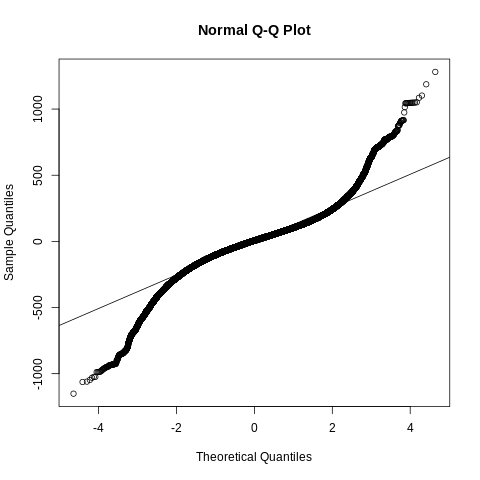

In [ ]:
%%R
qqnorm(residuals(fit.1a))
abline(0,sd(residuals(fit.1a)))

In [ ]:
%%R
confint(fit.1a)

                            2.5 %      97.5 %     Estimate
(Intercept)           661.5756345 714.2280541  687.9018443
fDimCat3               -8.3043495  -3.7304134   -6.0173815
fDimCat4               11.9395993  16.5784044   14.2590019
fDimCat5               44.2928543  49.6395176   46.9661860
fDimCat6               50.1566888  56.8911224   53.5239056
fLactationNumberCat2  -33.4164330 -23.4386067  -28.4275199
fLactationNumberCat3  -70.7899797 -52.0732337  -61.4316067
fLactationNumberCat4  -90.9182987 -63.6869894  -77.3026440
fLactationNumberCat5 -104.4772658 -68.4006801  -86.4389730
fLactationNumberCat6 -112.8443656 -67.4768570  -90.1606113
fLactationNumberCat7 -150.7195085 -96.0309464 -123.3752274
fLactationNumberCat8 -150.5652736 -85.4544552 -118.0098644
fThiMeanCat0          -24.7642111 -12.4563611  -18.6102861
fThiMeanCat2           -7.2851957  -3.6337771   -5.4594864
fThiMeanCat3           -9.7873571  -5.6348373   -7.7110972
fThiMeanCat4          -21.3911784 -16.5365270  -18.96385

In [ ]:
%%R
rm(fit.1a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2392964  127.8    6364812  340.0   5046857  269.6
Vcells 182657041 1393.6  265078109 2022.4 233400937 1780.8


In [ ]:
%%R
##CMS 
fit.1b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model1b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMeanCMS.R'
save(fit.1b, file= url_model1b)
summary(fit.1b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817144  7817599 -3908532  7817064   637665 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.697e+04 192.2802       
              Day         6.098e-02   0.2469 -0.75 
 Residual                 1.209e+04 109.9470       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           611.7987    10.0898   60.64  < 2e-16 ***
fDimCat3                2.9226     0.6467    4.52 6.21e-06 ***
fDimCat4               30.7725     0.6452   47.69  < 2e-16 ***
fDimCat5               58.6108     0.7229   81.08  < 2e-16 ***
fDimCat6           

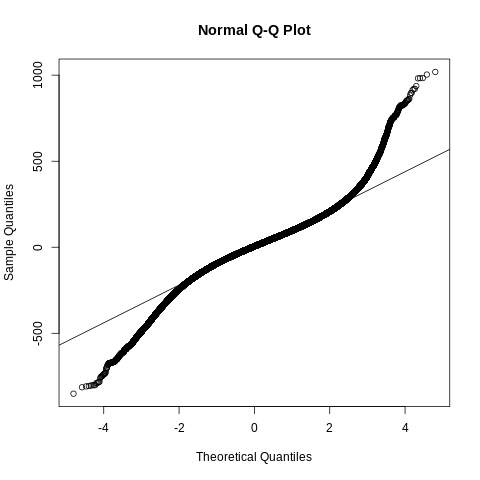

In [ ]:
%%R
qqnorm(residuals(fit.1b))
abline(0,sd(residuals(fit.1b)))

In [ ]:
%%R
confint(fit.1b)

                            2.5 %       97.5 %     Estimate
(Intercept)           592.0230476  631.5743266  611.7986871
fDimCat3                1.6550724    4.1901034    2.9225879
fDimCat4               29.5078589   32.0371917   30.7725253
fDimCat5               57.1939665   60.0277193   58.6108429
fDimCat6               72.0801342   75.5485228   73.8143285
fLactationNumberCat2   -7.2995334   -2.3389610   -4.8192472
fLactationNumberCat3  -32.9874447  -23.9238122  -28.4556284
fLactationNumberCat4  -59.4955764  -46.2358975  -52.8657369
fLactationNumberCat5  -76.7229818  -59.0670627  -67.8950223
fLactationNumberCat6 -102.9965478  -80.2640245  -91.6302862
fLactationNumberCat7 -104.0988206  -75.5431062  -89.8209634
fLactationNumberCat8 -141.0033471 -105.5447385 -123.2740428
fThiMeanCat0           -3.8700568    0.9793428   -1.4453570
fThiMeanCat2           -8.6382450   -6.5981455   -7.6181953
fThiMeanCat3          -10.1477008   -7.7391705   -8.9434356
fThiMeanCat4          -23.8029790  -21.1

In [ ]:
%%R
rm(fit.1b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2738215  146.3    6364812  340.0   5545776  296.2
Vcells 199844375 1524.7  402605763 3071.7 314044551 2396.0


In [ ]:
%%R
##DRY 
fit.1c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model1c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMeanDRY.R'
save(fit.1c, file= url_model1c)
summary(fit.1c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

     AIC      BIC   logLik deviance df.resid 
  968520   968880  -484221   968442    75404 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.327e+04 152.5418       
              Day         4.570e-02   0.2138 -0.78 
 Residual                 1.975e+04 140.5443       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          664.0141     9.0742   73.18  < 2e-16 ***
fLactationNumberCat2  76.0605     3.3838   22.48  < 2e-16 ***
fLactationNumberCat3  75.7961     4.4610   16.99  < 2e-16 ***
fLactationNumberCat4  67.7407     5.3337   12.70  < 2e-16 ***
fLactationNumberCat5  72.4903     6

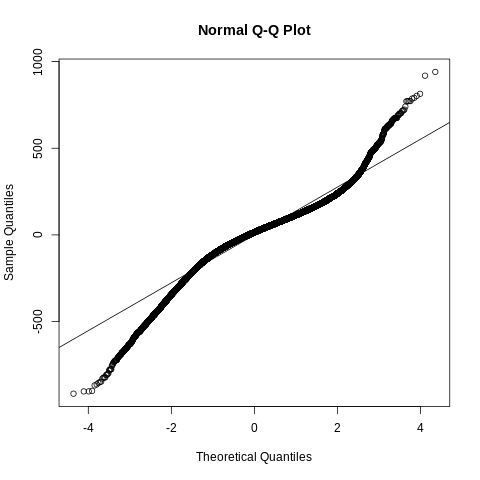

In [ ]:
%%R
qqnorm(residuals(fit.1c))
abline(0,sd(residuals(fit.1c)))

In [ ]:
%%R
confint(fit.1c)

                           2.5 %      97.5 %    Estimate
(Intercept)          646.2289009 681.7992263 664.0140636
fLactationNumberCat2  69.4283506  82.6925878  76.0604692
fLactationNumberCat3  67.0526933  84.5394189  75.7960561
fLactationNumberCat4  57.2867623  78.1945887  67.7406755
fLactationNumberCat5  60.2406426  84.7399231  72.4902828
fLactationNumberCat6  61.1092141  90.8174591  75.9633366
fLactationNumberCat7  77.9080489 117.0280362  97.4680425
fLactationNumberCat8  83.0816500 137.1628011 110.1222256
fThiMeanCat0         -24.0460905  -3.9336938 -13.9898922
fThiMeanCat2         -11.6215835  -3.5155542  -7.5685688
fThiMeanCat3         -12.2007565  -2.8719999  -7.5363782
fThiMeanCat4         -14.0047608  -3.6279553  -8.8163580
fThiMeanCat5         -21.4870912  -7.1506725 -14.3188819
fThiMeanCat6         -44.6338892 -23.4631387 -34.0485139
fYear2018             21.9241887  33.3986735  27.6614311
fYear2019              8.8632028  27.8142834  18.3387431
fYear2020              1.906375

In [ ]:
%%R
rm(fit.1c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2176108  116.3    6364812  340.0   5545776  296.2
Vcells 172813071 1318.5  402605763 3071.7 314044551 2396.0


## Model THI max

In [ ]:
%%R
##AMS
fit.2a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model2a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMaxAMS.R'
save(fit.2a, file= url_model2a)
summary(fit.2a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3671992  3672394 -1835958  3671916   292580 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.454e+04 254.0567       
              Day         1.306e-01   0.3613 -0.78 
 Residual                 1.615e+04 127.0786       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.61e+04 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           685.89394   13.43775   51.04  < 2e-16 ***
fDimCat3               -6.06988    1.16721   -5.20 1.99e-07 ***
fDimCat4               14.25026    1.18380   12.04  < 2e-16 ***
fDimCat5               46.97878    1.36448   34.43  < 2e-16 ***
fDimCat6        

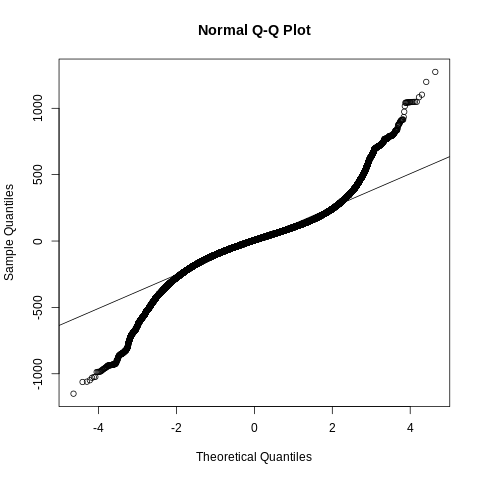

In [ ]:
%%R
qqnorm(residuals(fit.2a))
abline(0,sd(residuals(fit.2a)))

In [ ]:
%%R
confint(fit.2a)

                            2.5 %      97.5 %      Estimate
(Intercept)           659.5564291 712.2314470  685.89393808
fDimCat3               -8.3575715  -3.7821909   -6.06988123
fDimCat4               11.9300618  16.5704582   14.25025998
fDimCat5               44.3044560  49.6531095   46.97878276
fDimCat6               50.0874418  56.8245145   53.45597819
fLactationNumberCat2  -33.8947454 -23.9127568  -28.90375112
fLactationNumberCat3  -71.7203548 -52.9961742  -62.35826450
fLactationNumberCat4  -92.0622207 -64.8203272  -78.44127397
fLactationNumberCat5 -105.9699267 -69.8793832  -87.92465492
fLactationNumberCat6 -114.6676345 -69.2831652  -91.97539984
fLactationNumberCat7 -152.9632850 -98.2553014 -125.60929320
fLactationNumberCat8 -153.0146068 -87.8818304 -120.44821860
fThiMaxCat0           -64.5783622 -17.0368867  -40.80762449
fThiMaxCat2             3.0215039   6.6993632    4.86043354
fThiMaxCat3            -1.0249789   3.1976910    1.08635604
fThiMaxCat4            -1.3674775   3.11

In [ ]:
%%R
rm(fit.2a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2393451  127.9    6364812  340.0   5545776  296.2
Vcells 182662342 1393.7  402605763 3071.7 314044551 2396.0


In [ ]:
%%R
##CMS 
fit.2b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model2b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMaxCMS.R'
save(fit.2b, file= url_model2b)
summary(fit.2b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817180  7817635 -3908550  7817100   637665 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.705e+04 192.4797       
              Day         6.112e-02   0.2472 -0.75 
 Residual                 1.209e+04 109.9497       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           610.8875    10.0984   60.49  < 2e-16 ***
fDimCat3                2.9410     0.6467    4.55 5.43e-06 ***
fDimCat4               30.7627     0.6453   47.67  < 2e-16 ***
fDimCat5               58.6063     0.7230   81.06  < 2e-16 ***
fDimCat6            

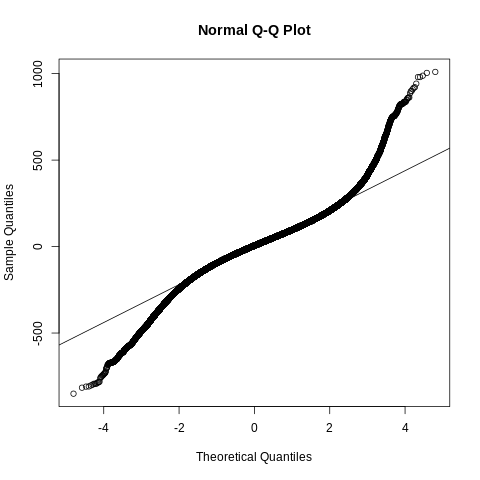

In [ ]:
%%R
qqnorm(residuals(fit.2b))
abline(0,sd(residuals(fit.2b)))

In [ ]:
%%R
confint(fit.2b)

                            2.5 %       97.5 %     Estimate
(Intercept)           591.0949760  630.6799989  610.8874875
fDimCat3                1.6734739    4.2086046    2.9410393
fDimCat4               29.4979528   32.0274613   30.7627071
fDimCat5               57.1891928   60.0233247   58.6062587
fDimCat6               72.0599486   75.5290711   73.7945099
fLactationNumberCat2   -7.2403897   -2.2785896   -4.7594897
fLactationNumberCat3  -33.0029309  -23.9366701  -28.4698005
fLactationNumberCat4  -59.6518044  -46.3878055  -53.0198050
fLactationNumberCat5  -77.1679478  -59.5058738  -68.3369108
fLactationNumberCat6 -103.7040737  -80.9629956  -92.3335347
fLactationNumberCat7 -105.0277334  -76.4608401  -90.7442867
fLactationNumberCat8 -142.2290467 -106.7575639 -124.4933053
fThiMaxCat0             8.9216957   21.7159429   15.3188193
fThiMaxCat2            -0.6171366    1.5667363    0.4747998
fThiMaxCat3            -5.1852814   -2.7099261   -3.9476037
fThiMaxCat4            -6.0554771   -3.4

In [ ]:
%%R
rm(fit.2b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2738694  146.3    6364812  340.0   5567674  297.4
Vcells 199849644 1524.8  402605763 3071.7 384554663 2934.0


In [ ]:
%%R
##DRY 
fit.2c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model2c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMaxDRY.R'
save(fit.2c, file= url_model2c)
summary(fit.2c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

     AIC      BIC   logLik deviance df.resid 
  968548   968908  -484235   968470    75404 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.328e+04 152.5867       
              Day         4.567e-02   0.2137 -0.78 
 Residual                 1.976e+04 140.5724       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           662.685      9.059   73.15  < 2e-16 ***
fLactationNumberCat2   76.078      3.384   22.48  < 2e-16 ***
fLactationNumberCat3   75.800      4.461   16.99  < 2e-16 ***
fLactationNumberCat4   67.839      5.334   12.72  < 2e-16 ***
fLactationNumberCat5   72.686      6

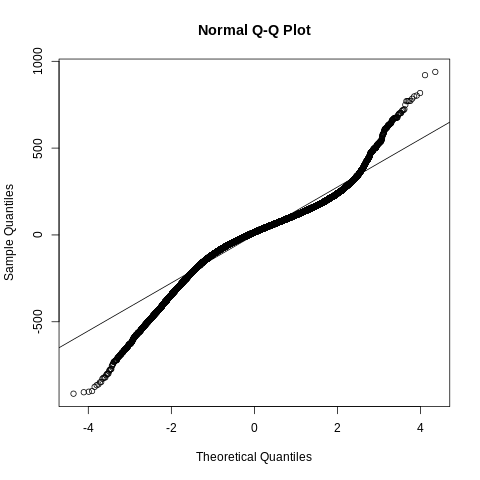

In [ ]:
%%R
qqnorm(residuals(fit.2c))
abline(0,sd(residuals(fit.2c)))

In [ ]:
%%R
confint(fit.2c)

                           2.5 %      97.5 %    Estimate
(Intercept)          644.9295442 680.4402275 662.6848859
fLactationNumberCat2  69.4452346  82.7103160  76.0777753
fLactationNumberCat3  67.0561994  84.5441954  75.8001974
fLactationNumberCat4  57.3847081  78.2936847  67.8391964
fLactationNumberCat5  60.4367057  84.9350647  72.6858852
fLactationNumberCat6  61.3859569  91.0890856  76.2375212
fLactationNumberCat7  77.5933063 116.7073061  97.1503062
fLactationNumberCat8  82.2368267 136.3045217 109.2706742
fThiMaxCat0          -23.0712938  31.8394311   4.3840686
fThiMaxCat2           -6.2524847   2.5350366  -1.8587240
fThiMaxCat3          -14.6872344  -4.6870082  -9.6871213
fThiMaxCat4          -12.0846744  -1.4705098  -6.7775921
fThiMaxCat5          -13.8244416  -2.7245302  -8.2744859
fThiMaxCat6          -19.4599885  -7.3665836 -13.4132860
fYear2018             22.2623325  33.7422167  28.0022746
fYear2019              8.9796386  27.9231001  18.4513693
fYear2020              2.232523

In [ ]:
%%R
rm(fit.2c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2175984  116.3    6364812  340.0   5567674  297.4
Vcells 172811148 1318.5  402605763 3071.7 384554663 2934.0


## Model THI min

In [ ]:
%%R
##AMS
fit.3a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model3a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIminAMS.R'
save(fit.3a, file= url_model3a)
summary(fit.3a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672271  3672674 -1836098  3672195   292580 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.465e+04 254.2702       
              Day         1.309e-01   0.3618 -0.78 
 Residual                 1.616e+04 127.1388       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           684.5648    13.4636   50.85  < 2e-16 ***
fDimCat3               -6.1159     1.1678   -5.24 1.63e-07 ***
fDimCat4               14.0847     1.1844   11.89  < 2e-16 ***
fDimCat5               46.7055     1.3653   34.21  < 2e-16 ***
fDimCat6             

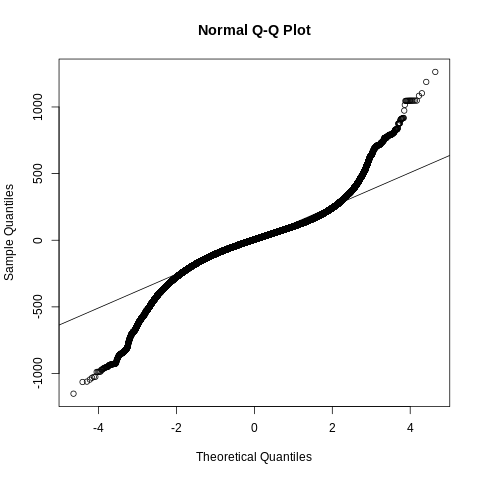

In [ ]:
%%R
qqnorm(residuals(fit.3a))
abline(0,sd(residuals(fit.3a)))

In [ ]:
%%R
confint(fit.3a)

                            2.5 %      97.5 %     Estimate
(Intercept)           658.1766194 710.9529787  684.5647990
fDimCat3               -8.4047274  -3.8270725   -6.1159000
fDimCat4               11.7633573  16.4060938   14.0847255
fDimCat5               44.0296446  49.3813388   46.7054917
fDimCat6               49.8025946  56.5439455   53.1732701
fLactationNumberCat2  -33.4090654 -23.4167193  -28.4128924
fLactationNumberCat3  -70.6859484 -51.9422389  -61.3140936
fLactationNumberCat4  -91.0867881 -63.8183857  -77.4525869
fLactationNumberCat5 -104.9458734 -68.8211926  -86.8835330
fLactationNumberCat6 -113.5507078 -68.1241586  -90.8374332
fLactationNumberCat7 -152.0178653 -97.2595279 -124.6386966
fLactationNumberCat8 -152.2682470 -87.0770570 -119.6726520
fThiMinCat0           -12.0682054  -7.6007050   -9.8344552
fThiMinCat2            -2.7779503   0.5249355   -1.1265074
fThiMinCat3            -5.3508616  -1.4855129   -3.4181872
fThiMinCat4           -14.9844939 -10.7161579  -12.85032

In [ ]:
%%R
rm(fit.3a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2393331  127.9    6364812  340.0   5567674  297.4
Vcells 182660427 1393.6  402605763 3071.7 384554663 2934.0


In [ ]:
%%R
##CMS 
fit.3b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model3b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMinCMS.R'
save(fit.3b, file= url_model3b)
summary(fit.3b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7818430  7818885 -3909175  7818350   637665 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.704e+04 192.4549       
              Day         6.113e-02   0.2472 -0.75 
 Residual                 1.211e+04 110.0580       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           609.9368    10.0965   60.41  < 2e-16 ***
fDimCat3                3.0209     0.6474    4.67 3.06e-06 ***
fDimCat4               30.8143     0.6459   47.70  < 2e-16 ***
fDimCat5               58.6480     0.7237   81.03  < 2e-16 ***
fDimCat6            

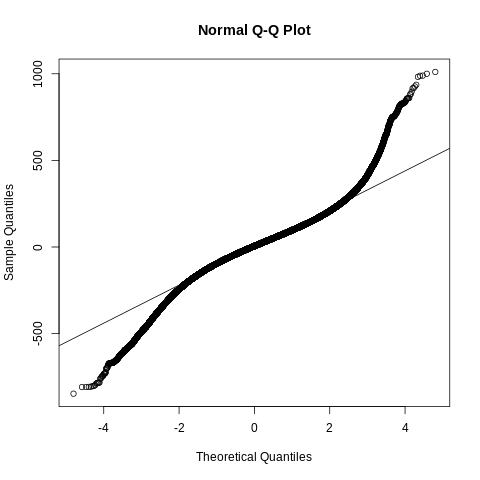

In [ ]:
%%R
qqnorm(residuals(fit.3b))
abline(0,sd(residuals(fit.3b)))

In [ ]:
%%R
confint(fit.3b)

                            2.5 %       97.5 %     Estimate
(Intercept)           590.1479410  629.7256688  609.9368049
fDimCat3                1.7520996    4.2896818    3.0208907
fDimCat4               29.5483060   32.0803340   30.8143200
fDimCat5               57.2294661   60.0665013   58.6479837
fDimCat6               72.0916778   75.5644480   73.8280629
fLactationNumberCat2   -7.3143257   -2.3469285   -4.8306271
fLactationNumberCat3  -33.0962174  -24.0198973  -28.5580573
fLactationNumberCat4  -59.7120807  -46.4345172  -53.0732990
fLactationNumberCat5  -76.9929746  -59.3136320  -68.1533033
fLactationNumberCat6 -103.3812260  -80.6189936  -92.0001098
fLactationNumberCat7 -104.7401305  -76.1476750  -90.4439027
fLactationNumberCat8 -141.8712667 -106.3678940 -124.1195803
fThiMinCat0            -3.4184192   -1.1896263   -2.3040228
fThiMinCat2            -7.2578700   -5.3895214   -6.3236957
fThiMinCat3            -6.7721416   -4.6455191   -5.7088304
fThiMinCat4            -8.6133701   -6.2

In [ ]:
%%R
rm(fit.3b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739362  146.3    6364812  340.0   5567674  297.4
Vcells 199849864 1524.8  402605763 3071.7 384554663 2934.0


In [ ]:
%%R
##DRY 
fit.3c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model3c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMinDRY.R'
save(fit.3c, file= url_model3c)
summary(fit.3c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968541.4  968901.5 -484231.7  968463.4     75404 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.329e+04 152.6064       
              Day         4.572e-02   0.2138 -0.78 
 Residual                 1.976e+04 140.5640       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           664.272      9.084   73.13  < 2e-16 ***
fLactationNumberCat2   75.878      3.385   22.42  < 2e-16 ***
fLactationNumberCat3   75.549      4.462   16.93  < 2e-16 ***
fLactationNumberCat4   67.656      5.335   12.68  < 2e-16 ***
fLactationNumberCat5   72.

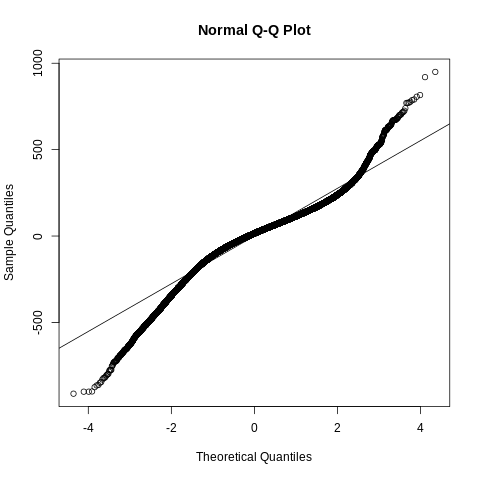

In [ ]:
%%R
qqnorm(residuals(fit.3c))
abline(0,sd(residuals(fit.3c)))

In [ ]:
%%R
confint(fit.3c)

                           2.5 %      97.5 %    Estimate
(Intercept)          646.4682497 682.0763429 664.2722963
fLactationNumberCat2  69.2434544  82.5123324  75.8778934
fLactationNumberCat3  66.8029526  84.2951232  75.5490379
fLactationNumberCat4  57.1989654  78.1137378  67.6563516
fLactationNumberCat5  60.1139129  84.6201008  72.3670069
fLactationNumberCat6  61.0116669  90.7249211  75.8682940
fLactationNumberCat7  77.8374559 116.9627909  97.4001234
fLactationNumberCat8  82.4457778 136.5324311 109.4891044
fThiMinCat0          -12.3731164  -2.8419937  -7.6075550
fThiMinCat2           -6.6958672   0.6001670  -3.0478501
fThiMinCat3           -9.8778376  -1.7538207  -5.8158291
fThiMinCat4           -7.8779968   1.0497740  -3.4141114
fThiMinCat5          -13.4292477  -1.3560150  -7.3926314
fThiMinCat6          -32.4379443 -12.0177389 -22.2278416
fYear2018             21.6637800  33.1250481  27.3944141
fYear2019              8.7324203  27.6865369  18.2094786
fYear2020              1.733780

In [ ]:
%%R
rm(fit.3c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177253  116.3    6364812  340.0   5567674  297.4
Vcells 172818552 1318.6  402605763 3071.7 384554663 2934.0


## Model THI mean 1 day before

In [ ]:
%%R
##AMS
fit.4a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model4a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMean1daybeforeAMS.R'
save(fit.4a, file= url_model4a)
summary(fit.4a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672503  3672905 -1836214  3672427   292580 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 64808.226 254.575        
              Day             0.131   0.362  -0.78 
 Residual                 16177.100 127.189        
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             682.2462    13.4806   50.61  < 2e-16 ***
fDimCat3                 -6.1884     1.1683   -5.30 1.18e-07 ***
fDimCat4                 14.0707     1.1849   11.87  < 2e-16 ***
fDimCat5                 46.6905     1.3659   34.18  < 2e-16 ***


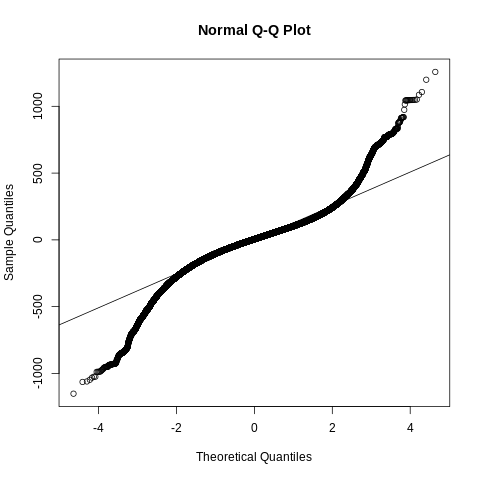

In [ ]:
%%R
qqnorm(residuals(fit.4a))
abline(0,sd(residuals(fit.4a)))

In [ ]:
%%R
confint(fit.4a)

                              2.5 %       97.5 %     Estimate
(Intercept)             655.8247617  708.6676717  682.2462167
fDimCat3                 -8.4781526   -3.8985854   -6.1883690
fDimCat4                 11.7482685   16.3931331   14.0707008
fDimCat5                 44.0132672   49.3676373   46.6904523
fDimCat6                 49.6660753   56.4110322   53.0385537
fLactationNumberCat2    -33.8979079  -23.9031950  -28.9005515
fLactationNumberCat3    -71.8439352  -53.0946444  -62.4692898
fLactationNumberCat4    -92.6756759  -65.3963696  -79.0360227
fLactationNumberCat5   -107.0851976  -70.9444247  -89.0148111
fLactationNumberCat6   -116.2158253  -70.7678859  -93.4918556
fLactationNumberCat7   -155.2016583 -100.4180623 -127.8098603
fLactationNumberCat8   -155.9054028  -90.6851121 -123.2952575
fThiMean1daybeforeCat0  -22.3356881  -10.0891779  -16.2124330
fThiMean1daybeforeCat2   -6.3810832   -2.7150825   -4.5480828
fThiMean1daybeforeCat3   -8.5680302   -4.3575287   -6.4627794
fThiMean

In [ ]:
%%R
rm(fit.4a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394596  127.9    6364812  340.0   5567674  297.4
Vcells 182667836 1393.7  402605763 3071.7 384554663 2934.0


In [ ]:
%%R
##CMS 
fit.4b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model4b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelThiMean1daybeforeCMS.R'
save(fit.4b, file= url_model4b)
summary(fit.4b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817731  7818185 -3908825  7817651   637571 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.709e+04 192.5968       
              Day         6.125e-02   0.2475 -0.75 
 Residual                 1.212e+04 110.0969       
Number of obs: 637611, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             608.6323    10.1049   60.23  < 2e-16 ***
fDimCat3                  2.9861     0.6476    4.61 4.01e-06 ***
fDimCat4                 30.7398     0.6462   47.57  < 2e-16 ***
fDimCat5                 58.5609     0.7242   80.87  < 2e-16 ***

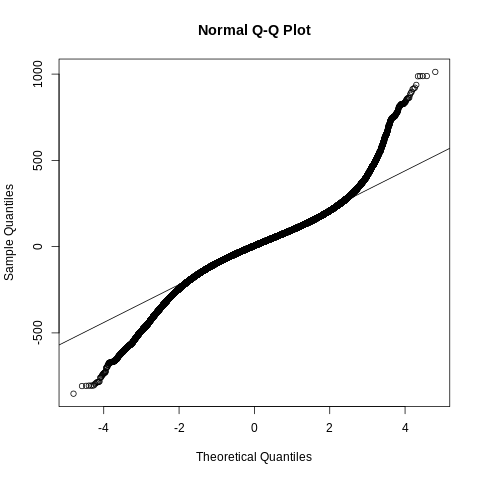

In [ ]:
%%R
qqnorm(residuals(fit.4b))
abline(0,sd(residuals(fit.4b)))

In [ ]:
%%R
confint(fit.4b)

                              2.5 %       97.5 %     Estimate
(Intercept)             588.8271016  628.4375791  608.6323404
fDimCat3                  1.7167268    4.2554168    2.9860718
fDimCat4                 29.4731496   32.0063789   30.7397643
fDimCat5                 57.1416070   59.9802747   58.5609408
fDimCat6                 71.9525661   75.4277993   73.6901827
fLactationNumberCat2     -7.4310758   -2.4602536   -4.9456647
fLactationNumberCat3    -33.4056132  -24.3223427  -28.8639780
fLactationNumberCat4    -60.2631811  -46.9739877  -53.6185844
fLactationNumberCat5    -77.9606283  -60.2646778  -69.1126530
fLactationNumberCat6   -104.6694450  -81.8850916  -93.2772683
fLactationNumberCat7   -106.2901039  -77.6699315  -91.9800177
fLactationNumberCat8   -143.8390413 -108.3036784 -126.0713598
fThiMean1daybeforeCat0   -5.1612610   -0.3123287   -2.7367949
fThiMean1daybeforeCat2   -8.5012832   -6.4514999   -7.4763915
fThiMean1daybeforeCat3   -9.7570541   -7.3176527   -8.5373534
fThiMean

In [ ]:
%%R
rm(fit.4b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739136  146.3    6364812  340.0   5681831  303.5
Vcells 200162542 1527.2  402605763 3071.7 385334784 2939.9


In [ ]:
%%R
##DRY 
fit.4c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model4c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMean1daybeforeDRY.R'
save(fit.4c, file= url_model4c)
summary(fit.4c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968435.1  968795.1 -484178.6  968357.1     75395 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.324e+04 152.4401       
              Day         4.560e-02   0.2136 -0.78 
 Residual                 1.976e+04 140.5774       
Number of obs: 75434, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            663.1037     9.0716   73.10  < 2e-16 ***
fLactationNumberCat2    75.9775     3.3832   22.46  < 2e-16 ***
fLactationNumberCat3    75.6377     4.4601   16.96  < 2e-16 ***
fLactationNumberCat4    67.6665     5.3325   12.69  < 2e-16 ***
fLact

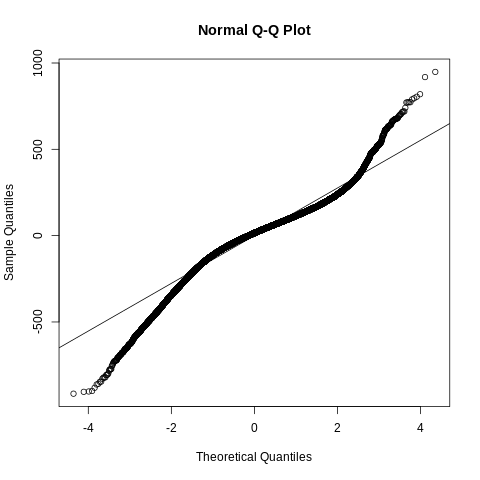

In [ ]:
%%R
qqnorm(residuals(fit.4c))
abline(0,sd(residuals(fit.4c)))

In [ ]:
%%R
confint(fit.4c)

                             2.5 %      97.5 %    Estimate
(Intercept)            645.3236357 680.8838157 663.1037257
fLactationNumberCat2    69.3466085  82.6084308  75.9775196
fLactationNumberCat3    66.8961174  84.3791960  75.6376567
fLactationNumberCat4    57.2149795  78.1180337  67.6665066
fLactationNumberCat5    60.2942293  84.7875285  72.5408789
fLactationNumberCat6    61.1654278  90.8660227  76.0157253
fLactationNumberCat7    77.5378964 116.6480067  97.0929515
fLactationNumberCat8    82.2222526 136.2905653 109.2564089
fThiMean1daybeforeCat0 -13.0214146   6.8879061  -3.0667543
fThiMean1daybeforeCat2  -8.4666926  -0.2992223  -4.3829574
fThiMean1daybeforeCat3 -10.0920135  -0.6668301  -5.3794218
fThiMean1daybeforeCat4  -7.1239566   3.3300526  -1.8969520
fThiMean1daybeforeCat5  -4.9375453   9.5167000   2.2895774
fThiMean1daybeforeCat6 -25.5755163  -4.2385705 -14.9070434
fYear2018               21.3862411  32.8567182  27.1214797
fYear2019                8.7624080  27.7004957  18.23145

In [ ]:
%%R
rm(fit.4c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177115  116.3    6364812  340.0   5681831  303.5
Vcells 172854072 1318.8  402605763 3071.7 385334784 2939.9


##Model THI mean 2 days before

In [ ]:
%%R
##AMS
fit.5a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model5a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMean2daysbeforeAMS.R'
save(fit.5a, file= url_model5a)
summary(fit.5a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672661  3673063 -1836292  3672585   292580 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.523e+04 255.4085       
              Day         1.319e-01   0.3632 -0.78 
 Residual                 1.619e+04 127.2225       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              678.0446    13.5399   50.08  < 2e-16 ***
fDimCat3                  -6.2281     1.1686   -5.33 9.85e-08 ***
fDimCat4                  13.9771     1.1854   11.79  < 2e-16 ***
fDimCat5                  46.5341     1.3668   34.05  < 2e-1

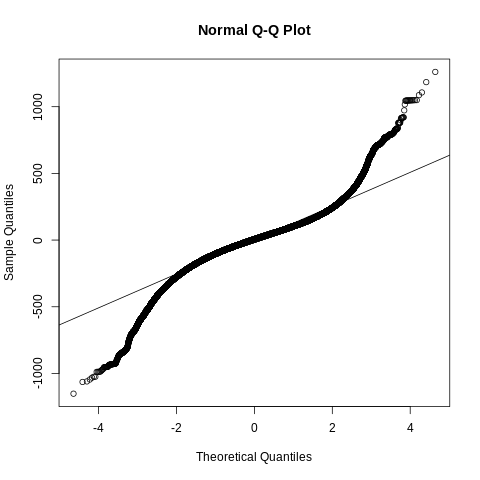

In [ ]:
%%R
qqnorm(residuals(fit.5a))
abline(0,sd(residuals(fit.5a)))

In [ ]:
%%R
confint(fit.5a)

                               2.5 %       97.5 %     Estimate
(Intercept)              651.5068132  704.5823106  678.0445619
fDimCat3                  -8.5185668   -3.9376953   -6.2281310
fDimCat4                  11.6537171   16.3005023   13.9771097
fDimCat5                  43.8551710   49.2130309   46.5341010
fDimCat6                  49.3649892   56.1157987   52.7403939
fLactationNumberCat2     -34.3514398  -24.3465013  -29.3489706
fLactationNumberCat3     -72.7850614  -54.0151023  -63.4000818
fLactationNumberCat4     -94.1397610  -66.8290616  -80.4844113
fLactationNumberCat5    -109.1040764  -72.9208049  -91.0124406
fLactationNumberCat6    -118.7831362  -73.2819224  -96.0325293
fLactationNumberCat7    -158.2834631 -103.4379499 -130.8607065
fLactationNumberCat8    -159.4038140  -94.1147590 -126.7592865
fThiMean2daysbeforeCat0  -24.4996785  -12.2496359  -18.3746572
fThiMean2daysbeforeCat2   -2.5828135    1.0879897   -0.7474119
fThiMean2daysbeforeCat3   -2.6087737    1.6238619   -0.

In [ ]:
%%R
rm(fit.5a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394470  127.9    6364812  340.0   5681831  303.5
Vcells 182666053 1393.7  402605763 3071.7 385334784 2939.9


In [ ]:
%%R
##CMS 
fit.5b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model5b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelThiMean2daysbeforeCMS.R'
save(fit.5b, file= url_model5b)
summary(fit.5b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7816898  7817353 -3908409  7816818   637477 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.725e+04 192.9980       
              Day         6.140e-02   0.2478 -0.75 
 Residual                 1.213e+04 110.1241       
Number of obs: 637517, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              606.0705    10.1225   59.87  < 2e-16 ***
fDimCat3                   3.0101     0.6478    4.65 3.38e-06 ***
fDimCat4                  30.7192     0.6465   47.51  < 2e-16 ***
fDimCat5                  58.5280     0.7246   80.77  < 2e-

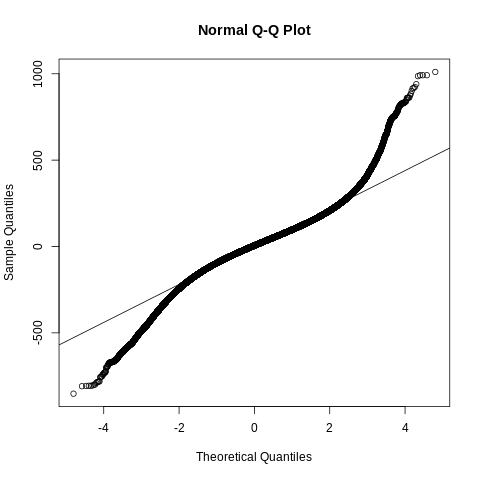

In [ ]:
%%R
qqnorm(residuals(fit.5b))
abline(0,sd(residuals(fit.5b)))

In [ ]:
%%R
confint(fit.5b)

                               2.5 %       97.5 %     Estimate
(Intercept)              586.2308923  625.9102061  606.0705492
fDimCat3                   1.7403772    4.2799004    3.0101388
fDimCat4                  29.4520539   31.9864148   30.7192344
fDimCat5                  57.1076666   59.9482410   58.5279538
fDimCat6                  71.8747529   75.3532125   73.6139827
fLactationNumberCat2      -7.5621343   -2.5859570   -5.0740457
fLactationNumberCat3     -33.7207255  -24.6268386  -29.1737821
fLactationNumberCat4     -60.7940599  -47.4886885  -54.1413742
fLactationNumberCat5     -78.7871049  -61.0691955  -69.9281502
fLactationNumberCat6    -105.7670776  -82.9547583  -94.3609179
fLactationNumberCat7    -107.6428131  -78.9890791  -93.3159461
fLactationNumberCat8    -145.6313497 -110.0582906 -127.8448202
fThiMean2daysbeforeCat0    0.2380298    5.0872138    2.6626218
fThiMean2daysbeforeCat2   -0.7592105    1.2929477    0.2668686
fThiMean2daysbeforeCat3   -6.6222044   -4.1724291   -5.

In [ ]:
%%R
rm(fit.5b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739522  146.4    6364812  340.0   5795850  309.6
Vcells 200163271 1527.2  402605763 3071.7 385334784 2939.9


In [ ]:
%%R
##DRY 
fit.5c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model5c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMean2daysbeforeDRY.R'
save(fit.5c, file= url_model5c)
summary(fit.5c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968318.8  968678.8 -484120.4  968240.8     75385 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.327e+04 152.5515       
              Day         4.568e-02   0.2137 -0.78 
 Residual                 1.976e+04 140.5868       
Number of obs: 75424, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             662.6077     9.0814   72.96  < 2e-16 ***
fLactationNumberCat2     76.0042     3.3843   22.46  < 2e-16 ***
fLactationNumberCat3     75.6638     4.4621   16.96  < 2e-16 ***
fLactationNumberCat4     67.7356     5.3347   12.70  < 2e-16 ***


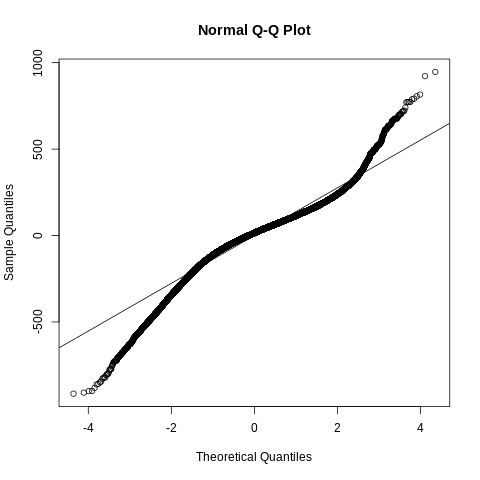

In [ ]:
%%R
qqnorm(residuals(fit.5c))
abline(0,sd(residuals(fit.5c)))

In [ ]:
%%R
confint(fit.5c)

                              2.5 %      97.5 %    Estimate
(Intercept)             644.8084275 680.4069188 662.6076731
fLactationNumberCat2     69.3710141  82.6372948  76.0041544
fLactationNumberCat3     66.9181967  84.4094473  75.6638220
fLactationNumberCat4     57.2797719  78.1914819  67.7356269
fLactationNumberCat5     60.3449567  84.8472377  72.5960972
fLactationNumberCat6     61.1827755  90.8927526  76.0377641
fLactationNumberCat7     77.4790590 116.6007026  97.0398808
fLactationNumberCat8     82.0864970 136.1717625 109.1291298
fThiMean2daysbeforeCat0 -10.2886425   9.4437489  -0.4224468
fThiMean2daysbeforeCat2  -5.1803627   2.9947917  -1.0927855
fThiMean2daysbeforeCat3  -6.7642469   2.6964899  -2.0338785
fThiMean2daysbeforeCat4  -3.7276981   6.7592071   1.5157545
fThiMean2daysbeforeCat5  -1.7770032  12.6959018   5.4594493
fThiMean2daysbeforeCat6 -17.0090333   4.5241570  -6.2424382
fYear2018                21.3514455  32.8309028  27.0911741
fYear2019                 8.8265601  27.

In [ ]:
%%R
rm(fit.5c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177000  116.3    6364812  340.0   5795850  309.6
Vcells 172851947 1318.8  402605763 3071.7 385334784 2939.9


## Model Temp mean

In [ ]:
%%R
##AMS
fit.6a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model6a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMeanAMS.R'
save(fit.6a, file= url_model6a)
summary(fit.6a)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3671724  3672127 -1835824  3671648   292580 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.434e+04 253.6465       
              Day         1.307e-01   0.3615 -0.78 
 Residual                 1.613e+04 127.0201       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.61e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           688.3094    13.4236   51.28  < 2e-16 ***
fDimCat3               -6.0600     1.1667   -5.19 2.06e-07 ***
fDimCat4               14.2073     1.1833   12.01  < 2e-16 ***
fDimCat5               46.8870     1.3639   34.38  < 2e-16 ***
fDimCat6            

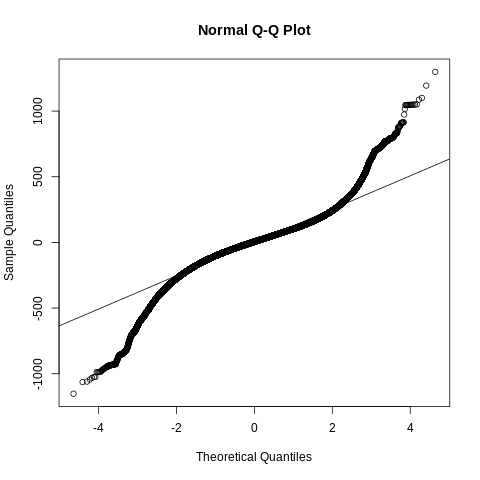

In [ ]:
%%R
qqnorm(residuals(fit.6a))
abline(0,sd(residuals(fit.6a)))

In [ ]:
%%R
confint(fit.6a)

                            2.5 %       97.5 %     Estimate
(Intercept)           661.9995238 714.61919183  688.3093578
fDimCat3               -8.3466751  -3.77337127   -6.0600232
fDimCat4               11.8881152  16.52647841   14.2072968
fDimCat5               44.2138013  49.56025006   46.8870257
fDimCat6               50.1063102  56.84046425   53.4733872
fLactationNumberCat2  -33.9545246 -23.97646002  -28.9654923
fLactationNumberCat3  -71.6517569 -52.93491678  -62.2933368
fLactationNumberCat4  -91.7961723 -64.56534881  -78.1807605
fLactationNumberCat5 -105.2806540 -69.20505580  -87.2428549
fLactationNumberCat6 -113.4889763 -68.12292949  -90.8059529
fLactationNumberCat7 -151.0359356 -96.34874204 -123.6923388
fLactationNumberCat8 -150.3067444 -85.19658132 -117.7516628
fTempMeanCat0         -18.0845273 -12.46877125  -15.2766493
fTempMeanCat2          -4.5271008  -0.99339483   -2.7602478
fTempMeanCat3         -11.3648588  -7.15911199   -9.2619854
fTempMeanCat4         -30.6774290 -25.19

In [ ]:
%%R
rm(fit.6a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394367  127.9    6364812  340.0   5795850  309.6
Vcells 182664413 1393.7  402605763 3071.7 385334784 2939.9


In [ ]:
%%R
##CMS 
fit.6b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model6b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMeanCMS.R'
save(fit.6b, file= url_model6b)
summary(fit.6b)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817256  7817711 -3908588  7817176   637665 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.701e+04 192.3854       
              Day         6.098e-02   0.2469 -0.75 
 Residual                 1.209e+04 109.9567       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           611.3224    10.0940   60.56  < 2e-16 ***
fDimCat3                2.9142     0.6468    4.51 6.61e-06 ***
fDimCat4               30.7598     0.6453   47.66  < 2e-16 ***
fDimCat5               58.5984     0.7231   81.04  < 2e-16 ***
fDimCat6           

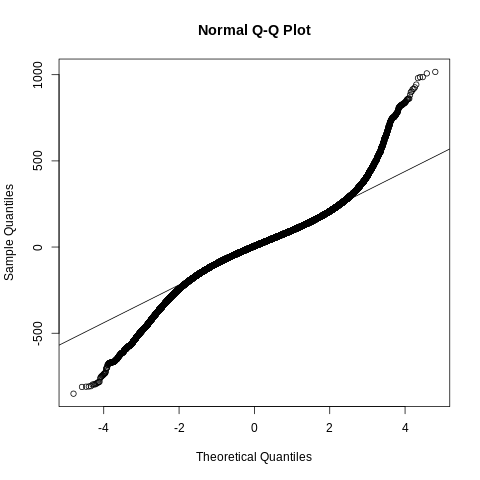

In [ ]:
%%R
qqnorm(residuals(fit.6b))
abline(0,sd(residuals(fit.6b)))

In [ ]:
%%R
confint(fit.6b)

                            2.5 %       97.5 %     Estimate
(Intercept)           591.5384744  631.1063168  611.3223956
fDimCat3                1.6465467    4.1818411    2.9141939
fDimCat4               29.4949127   32.0246059   30.7597593
fDimCat5               57.1811846   60.0155601   58.5983724
fDimCat6               72.0510981   75.5204748   73.7857864
fLactationNumberCat2   -7.4483544   -2.4853368   -4.9668456
fLactationNumberCat3  -33.2255695  -24.1579174  -28.6917434
fLactationNumberCat4  -59.7075097  -46.4430054  -53.0752575
fLactationNumberCat5  -76.8316985  -59.1703679  -68.0010332
fLactationNumberCat6 -102.9999622  -80.2610331  -91.6304976
fLactationNumberCat7 -103.9662592  -75.4030381  -89.6846487
fLactationNumberCat8 -140.6050417 -105.1375233 -122.8712825
fTempMeanCat0          -4.3300173   -1.3145802   -2.8222988
fTempMeanCat2          -7.7095994   -5.7587325   -6.7341659
fTempMeanCat3         -13.8227416  -11.4444113  -12.6335764
fTempMeanCat4         -28.8437760  -25.8

In [ ]:
%%R
rm(fit.6b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739610  146.4    6364812  340.0   5795850  309.6
Vcells 199851715 1524.8  402605763 3071.7 385334784 2939.9


In [ ]:
%%R
##DRY 
fit.6c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model6c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMeanDRY.R'
save(fit.6c, file= url_model6c)
summary(fit.6c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968505.3  968865.3 -484213.6  968427.3     75404 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.329e+04 152.6179       
              Day         4.575e-02   0.2139 -0.78 
 Residual                 1.975e+04 140.5283       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.97e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          664.9588     9.0912   73.14  < 2e-16 ***
fLactationNumberCat2  75.9035     3.3846   22.43  < 2e-16 ***
fLactationNumberCat3  75.6399     4.4622   16.95  < 2e-16 ***
fLactationNumberCat4  67.6340     5.3350   12.68  < 2e-16 ***
fLactationNumberCat5  72

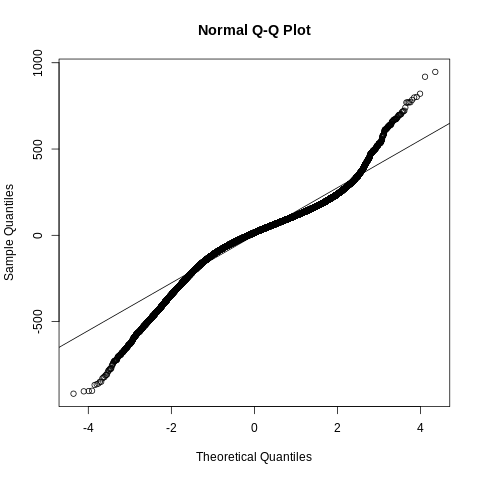

In [ ]:
%%R
qqnorm(residuals(fit.6c))
abline(0,sd(residuals(fit.6c)))

In [ ]:
%%R
confint(fit.6c)

                           2.5 %      97.5 %    Estimate
(Intercept)          647.1403359 682.7773212 664.9588286
fLactationNumberCat2  69.2697328  82.5372570  75.9034949
fLactationNumberCat3  66.8940599  84.3857566  75.6399082
fLactationNumberCat4  57.1776654  78.0903176  67.6339915
fLactationNumberCat5  60.1595679  84.6643506  72.4119592
fLactationNumberCat6  61.3520386  91.0643173  76.2081780
fLactationNumberCat7  77.9744869 117.1002497  97.5373683
fLactationNumberCat8  82.6911257 136.7773549 109.7342403
fTempMeanCat0        -17.3384742  -4.6108669 -10.9746705
fTempMeanCat2        -13.1557219  -5.1974293  -9.1765756
fTempMeanCat3        -13.3914115  -3.9151130  -8.6532622
fTempMeanCat4        -18.8278748  -6.9865759 -12.9072254
fTempMeanCat5        -41.5484408 -22.6093164 -32.0788786
fTempMeanCat6        -50.8341137 -14.9384432 -32.8862784
fYear2018             22.1872968  33.6645627  27.9259298
fYear2019              8.7391048  27.6996524  18.2193786
fYear2020              1.988030

In [ ]:
%%R
rm(fit.6c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177501  116.3    6364812  340.0   5795850  309.6
Vcells 172820403 1318.6  402605763 3071.7 385334784 2939.9


## Model Temp max

In [ ]:
%%R
##AMS
fit.7a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model7a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMaxAMS.R'
save(fit.7a, file= url_model7a)
summary(fit.7a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3671831  3672234 -1835878  3671755   292580 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.451e+04 253.9864       
              Day         1.306e-01   0.3614 -0.78 
 Residual                 1.614e+04 127.0435       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.61e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           687.2384    13.4295   51.17  < 2e-16 ***
fDimCat3               -6.1052     1.1669   -5.23 1.68e-07 ***
fDimCat4               14.1643     1.1835   11.97  < 2e-16 ***
fDimCat5               46.9527     1.3641   34.42  < 2e-16 ***
fDimCat6            

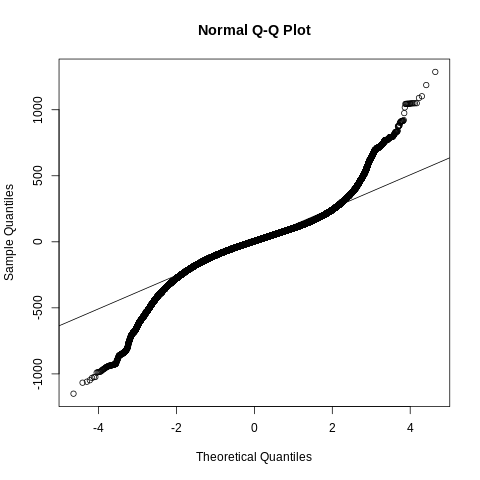

In [ ]:
%%R
qqnorm(residuals(fit.7a))
abline(0,sd(residuals(fit.7a)))

In [ ]:
%%R
confint(fit.7a)

                            2.5 %      97.5 %     Estimate
(Intercept)           660.9170428 713.5596976  687.2383702
fDimCat3               -8.3923115  -3.8181754   -6.1052435
fDimCat4               11.8447681  16.4838131   14.1642906
fDimCat5               44.2791681  49.6262681   46.9527181
fDimCat6               50.1385543  56.8735897   53.5060720
fLactationNumberCat2  -33.9544030 -23.9749401  -28.9646715
fLactationNumberCat3  -71.7446269 -53.0255525  -62.3850897
fLactationNumberCat4  -91.8703066 -64.6361997  -78.2532532
fLactationNumberCat5 -105.5604609 -69.4805914  -87.5205261
fLactationNumberCat6 -113.9713969 -68.6005498  -91.2859733
fLactationNumberCat7 -152.0411426 -97.3497278 -124.6954352
fLactationNumberCat8 -151.7500699 -86.6367423 -119.1934061
fTempMaxCat0          -20.8437897 -11.4492864  -16.1465381
fTempMaxCat2            3.2435100   6.5641600    4.9038350
fTempMaxCat3            0.2922383   4.4764394    2.3843389
fTempMaxCat4           -6.0303263  -1.4544831   -3.74240

In [ ]:
%%R
rm(fit.7a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394844  127.9    6364812  340.0   5795850  309.6
Vcells 182669674 1393.7  402605763 3071.7 385334784 2939.9


In [ ]:
%%R
##CMS 
fit.7b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model7b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMaxCMS.R'
save(fit.7b, file= url_model7b)
summary(fit.7b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817177  7817632 -3908549  7817097   637665 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.695e+04 192.2116       
              Day         6.095e-02   0.2469 -0.75 
 Residual                 1.209e+04 109.9500       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           611.6472    10.0860   60.64  < 2e-16 ***
fDimCat3                2.9174     0.6467    4.51 6.45e-06 ***
fDimCat4               30.7723     0.6453   47.69  < 2e-16 ***
fDimCat5               58.6008     0.7229   81.07  < 2e-16 ***
fDimCat6           

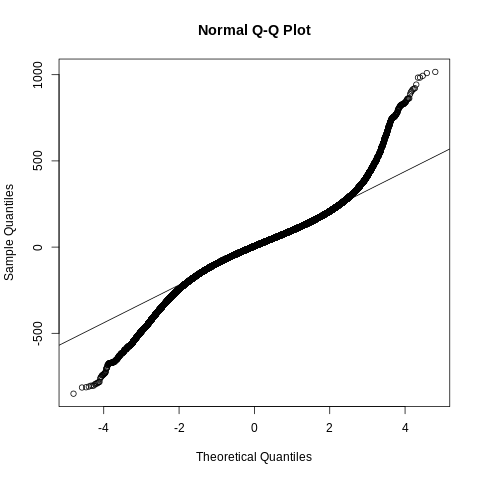

In [ ]:
%%R
qqnorm(residuals(fit.7b))
abline(0,sd(residuals(fit.7b)))

In [ ]:
%%R
confint(fit.7b)

                            2.5 %       97.5 %     Estimate
(Intercept)           591.8789971  631.4153792  611.6471881
fDimCat3                1.6498010    4.1849423    2.9173717
fDimCat4               29.5076391   32.0369865   30.7723128
fDimCat5               57.1839510   60.0175826   58.6007668
fDimCat6               72.0588762   75.5268702   73.7928732
fLactationNumberCat2   -7.2895958   -2.3294704   -4.8095331
fLactationNumberCat3  -32.9951820  -23.9328949  -28.4640385
fLactationNumberCat4  -59.4966596  -46.2395272  -52.8680934
fLactationNumberCat5  -76.7259073  -59.0738257  -67.8998665
fLactationNumberCat6 -102.9790471  -80.2513102  -91.6151786
fLactationNumberCat7 -103.9600296  -75.4097454  -89.6848875
fLactationNumberCat8 -140.8765120 -105.4236124 -123.1500622
fTempMaxCat0           -5.5829314   -0.7999522   -3.1914418
fTempMaxCat2           -1.1463966    0.8599636   -0.1432165
fTempMaxCat3           -6.2196701   -3.7540848   -4.9868775
fTempMaxCat4           -9.6954181   -7.0

In [ ]:
%%R
rm(fit.7b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740087  146.4    6364812  340.0   5795850  309.6
Vcells 199856976 1524.8  402605763 3071.7 385334784 2939.9


In [ ]:
%%R
##DRY 
fit.7c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model7c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMaxDRY.R'
save(fit.7c, file= url_model7c)
summary(fit.7c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968526.1  968886.1 -484224.0  968448.1     75404 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.331e+04 152.6920       
              Day         4.574e-02   0.2139 -0.78 
 Residual                 1.975e+04 140.5483       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          663.3669     9.0692   73.14  < 2e-16 ***
fLactationNumberCat2  75.9734     3.3847   22.45  < 2e-16 ***
fLactationNumberCat3  75.7160     4.4626   16.97  < 2e-16 ***
fLactationNumberCat4  67.6410     5.3355   12.68  < 2e-16 ***
fLactationNumberCat5  72.

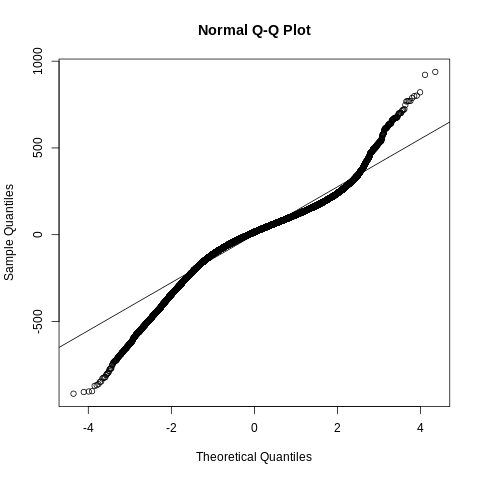

In [ ]:
%%R
qqnorm(residuals(fit.7c))
abline(0,sd(residuals(fit.7c)))

In [ ]:
%%R
confint(fit.7c)

                           2.5 %      97.5 %    Estimate
(Intercept)          645.5914587 681.1422486 663.3668536
fLactationNumberCat2  69.3395935  82.6072825  75.9734380
fLactationNumberCat3  66.9694264  84.4625262  75.7159763
fLactationNumberCat4  57.1835687  78.0984775  67.6410231
fLactationNumberCat5  60.1429008  84.6490162  72.3959585
fLactationNumberCat6  61.3549868  91.0669919  76.2109894
fLactationNumberCat7  77.7622127 116.8874683  97.3248405
fLactationNumberCat8  82.3180240 136.4015920 109.3598080
fTempMaxCat0         -24.0612061  -5.0613116 -14.5612589
fTempMaxCat2          -1.0855548   7.0165674   2.9655063
fTempMaxCat3         -12.2089505  -2.1358505  -7.1724005
fTempMaxCat4          -8.7889221   1.9442743  -3.4223239
fTempMaxCat5         -11.7374328   0.2081581  -5.7646374
fTempMaxCat6         -22.0219432  -7.9132827 -14.9676130
fYear2018             22.1566544  33.6463025  27.9014785
fYear2019              8.9460138  27.9001940  18.4231039
fYear2020              1.975145

In [ ]:
%%R
rm(fit.7c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177114  116.3    6364812  340.0   5795850  309.6
Vcells 172815532 1318.5  402605763 3071.7 385334784 2939.9


## Model Temp min

In [ ]:
%%R
##AMS
fit.8a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model8a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMinAMS.R'
save(fit.8a, file= url_model8a)
summary(fit.8a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672340  3672742 -1836132  3672264   292580 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.487e+04 254.6942       
              Day         1.313e-01   0.3624 -0.78 
 Residual                 1.617e+04 127.1533       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           6.816e+02  1.349e+01   50.52  < 2e-16 ***
fDimCat3             -6.141e+00  1.168e+00   -5.26 1.45e-07 ***
fDimCat4              1.408e+01  1.185e+00   11.89  < 2e-16 ***
fDimCat5              4.665e+01  1.366e+00   34.16  < 2e-16 ***
fDimCat6       

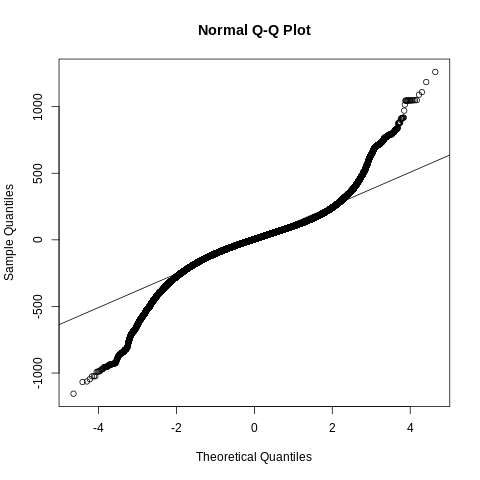

In [ ]:
%%R
qqnorm(residuals(fit.8a))
abline(0,sd(residuals(fit.8a)))

In [ ]:
%%R
confint(fit.8a)

                            2.5 %      97.5 %      Estimate
(Intercept)           655.1382534 708.0230394  681.58064642
fDimCat3               -8.4305646  -3.8523601   -6.14146235
fDimCat4               11.7607237  16.4042347   14.08247924
fDimCat5               43.9736602  49.3266978   46.65017898
fDimCat6               49.7045816  56.4480529   53.07631726
fLactationNumberCat2  -33.6420614 -23.6468886  -28.64447504
fLactationNumberCat3  -71.1242293 -52.3742734  -61.74925135
fLactationNumberCat4  -91.7079656 -64.4292270  -78.06859633
fLactationNumberCat5 -105.7201110 -69.5810980  -87.65060449
fLactationNumberCat6 -114.4431570 -68.9985735  -91.72086524
fLactationNumberCat7 -153.0915346 -98.3125356 -125.70203510
fLactationNumberCat8 -153.2510538 -88.0371570 -120.64410542
fTempMinCat0           -9.2736974  -5.6869106   -7.48030400
fTempMinCat2            2.8763785   5.7159575    4.29616798
fTempMinCat3            0.4110161   3.9363829    2.17369949
fTempMinCat4           -5.8161818  -1.51

In [ ]:
%%R
rm(fit.8a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394459  127.9    6364812  340.0   5795850  309.6
Vcells 182664775 1393.7  402605763 3071.7 385334784 2939.9


In [ ]:
%%R
##CMS 
fit.8b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model8b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMinCMS.R'
save(fit.8b, file= url_model8b)
summary(fit.8b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7818325  7818780 -3909122  7818245   637665 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.704e+04 192.4631       
              Day         6.116e-02   0.2473 -0.75 
 Residual                 1.211e+04 110.0488       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           610.4511    10.0979   60.45  < 2e-16 ***
fDimCat3                3.0231     0.6473    4.67 3.01e-06 ***
fDimCat4               30.8016     0.6459   47.69  < 2e-16 ***
fDimCat5               58.6408     0.7237   81.03  < 2e-16 ***
fDimCat6           

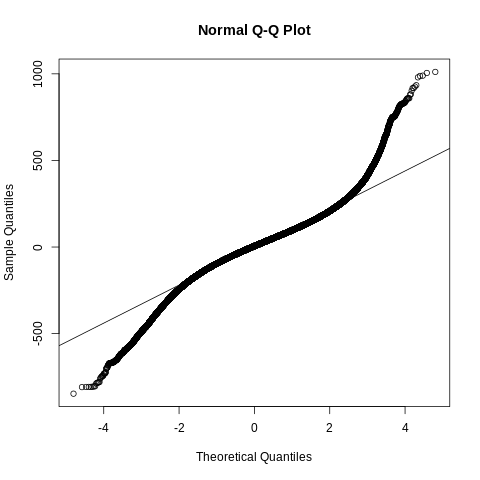

In [ ]:
%%R
qqnorm(residuals(fit.8b))
abline(0,sd(residuals(fit.8b)))

In [ ]:
%%R
confint(fit.8b)

                            2.5 %       97.5 %     Estimate
(Intercept)           590.6595935  630.2426277  610.4511106
fDimCat3                1.7543988    4.2917740    3.0230864
fDimCat4               29.5356954   32.0675700   30.8016327
fDimCat5               57.2223080   60.0592585   58.6407833
fDimCat6               72.0834709   75.5562460   73.8198585
fLactationNumberCat2   -7.3395107   -2.3720267   -4.8557687
fLactationNumberCat3  -33.1608335  -24.0842669  -28.6225502
fLactationNumberCat4  -59.7722233  -46.4939965  -53.1331099
fLactationNumberCat5  -77.0462197  -59.3659753  -68.2060975
fLactationNumberCat6 -103.4506422  -80.6873383  -92.0689902
fLactationNumberCat7 -104.8413889  -76.2478203  -90.5446046
fLactationNumberCat8 -141.9699594 -106.4660387 -124.2179991
fTempMinCat0           -4.1520958   -2.2402901   -3.1961930
fTempMinCat2            0.6271064    2.3458814    1.4864939
fTempMinCat3           -7.8296566   -5.7837367   -6.8066967
fTempMinCat4           -9.8374621   -7.4

In [ ]:
%%R
rm(fit.8b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739702  146.4    6364812  340.0   5795850  309.6
Vcells 199852077 1524.8  402605763 3071.7 385334784 2939.9


In [ ]:
%%R
##DRY 
fit.8c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model8c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMinDRY.R'
save(fit.8c, file= url_model8c)
summary(fit.8c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968514.9  968874.9 -484218.5  968436.9     75404 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.328e+04 152.5727       
              Day         4.572e-02   0.2138 -0.78 
 Residual                 1.975e+04 140.5387       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          666.2777     9.1182   73.07  < 2e-16 ***
fLactationNumberCat2  75.9534     3.3838   22.45  < 2e-16 ***
fLactationNumberCat3  75.5233     4.4613   16.93  < 2e-16 ***
fLactationNumberCat4  67.6043     5.3343   12.67  < 2e-16 ***
fLactationNumberCat5  72.

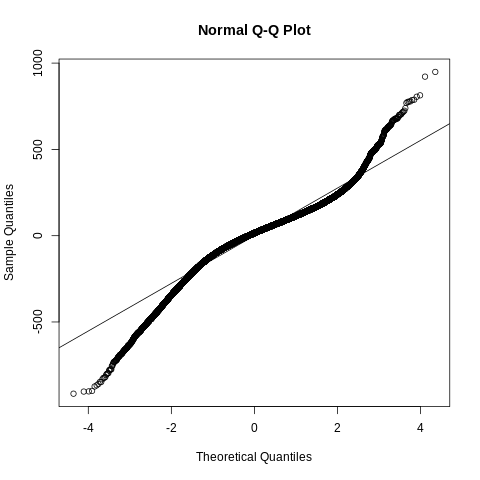

In [ ]:
%%R
qqnorm(residuals(fit.8c))
abline(0,sd(residuals(fit.8c)))

In [ ]:
%%R
confint(fit.8c)

                           2.5 %      97.5 %    Estimate
(Intercept)          648.4063260 684.1491140 666.2777200
fLactationNumberCat2  69.3212032  82.5856476  75.9534254
fLactationNumberCat3  66.7793994  84.2672925  75.5233460
fLactationNumberCat4  57.1491829  78.0593880  67.6042854
fLactationNumberCat5  60.2988502  84.7993980  72.5491241
fLactationNumberCat6  61.2254604  90.9338231  76.0796418
fLactationNumberCat7  77.7897668 116.9108633  97.3503151
fLactationNumberCat8  82.0840953 136.1651564 109.1246259
fTempMinCat0         -13.4318053  -5.4852267  -9.4585160
fTempMinCat2          -2.7179756   4.0050019   0.6435132
fTempMinCat3         -11.4290519  -3.2527073  -7.3408796
fTempMinCat4         -10.9116681  -1.4392786  -6.1754734
fTempMinCat5         -17.0713801  -3.4127222 -10.2420512
fTempMinCat6         -47.3327385 -17.7640260 -32.5483822
fYear2018             21.5123714  32.9770082  27.2446898
fYear2019              8.4525702  27.4108068  17.9316885
fYear2020              1.305177

In [ ]:
%%R
rm(fit.8c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177593  116.3    6364812  340.0   5795850  309.6
Vcells 172820765 1318.6  402605763 3071.7 385334784 2939.9


## Model Temp mean 1 day before

In [ ]:
%%R
##AMS
fit.9a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model9a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMean1daybeforeAMS.R'
save(fit.9a, file= url_model9a)
summary(fit.9a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672439  3672841 -1836182  3672363   292580 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.483e+04 254.6145       
              Day         1.313e-01   0.3624 -0.78 
 Residual                 1.617e+04 127.1750       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              670.0675    13.5444   49.47  < 2e-16 ***
fDimCat3                  -6.1916     1.1681   -5.30 1.15e-07 ***
fDimCat4                  14.0497     1.1848   11.86  < 2e-16 ***
fDimCat5                  46.6463     1.3659   34.15  < 2e-1

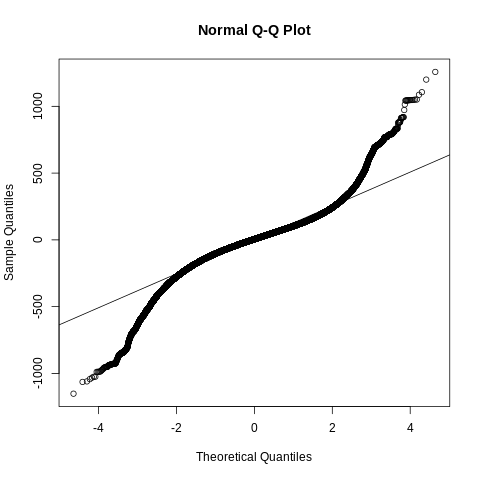

In [ ]:
%%R
qqnorm(residuals(fit.9a))
abline(0,sd(residuals(fit.9a)))

In [ ]:
%%R
confint(fit.9a)

                               2.5 %       97.5 %     Estimate
(Intercept)              643.5208834  696.6141390  670.0675112
fDimCat3                  -8.4810726   -3.9021318   -6.1916022
fDimCat4                  11.7274967   16.3719661   14.0497314
fDimCat5                  43.9691427   49.3234489   46.6462958
fDimCat6                  49.6362324   56.3812890   53.0087607
fLactationNumberCat2     -34.3207102  -24.3245765  -29.3226433
fLactationNumberCat3     -72.5472934  -53.7957700  -63.1715317
fLactationNumberCat4     -93.4115336  -66.1298273  -79.7706805
fLactationNumberCat5    -107.7401607  -71.5968500  -89.6685053
fLactationNumberCat6    -116.7724244  -71.3217917  -94.0471081
fLactationNumberCat7    -155.5133863 -100.7265762 -128.1199813
fLactationNumberCat8    -155.7793851  -90.5549909 -123.1671880
fTempMean1daybeforeCat1    8.7196437   14.3290972   11.5243704
fTempMean1daybeforeCat2    3.1178213    9.7541352    6.4359782
fTempMean1daybeforeCat3    2.4183977    9.4305429    5.

In [ ]:
%%R
rm(fit.9a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394936  128.0    6364812  340.0   5795850  309.6
Vcells 182670049 1393.7  402605763 3071.7 385334784 2939.9


In [ ]:
%%R
##CMS 
fit.9b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model9b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMean1daybeforeCMS.R'
save(fit.9b, file= url_model9b)
summary(fit.9b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817694  7818149 -3908807  7817614   637571 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.719e+04 192.8451       
              Day         6.133e-02   0.2477 -0.75 
 Residual                 1.212e+04 110.0934       
Number of obs: 637611, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              605.4733    10.1339   59.75  < 2e-16 ***
fDimCat3                   2.9759     0.6476    4.60 4.33e-06 ***
fDimCat4                  30.7019     0.6463   47.50  < 2e-16 ***
fDimCat5                  58.5093     0.7244   80.77  < 2e-

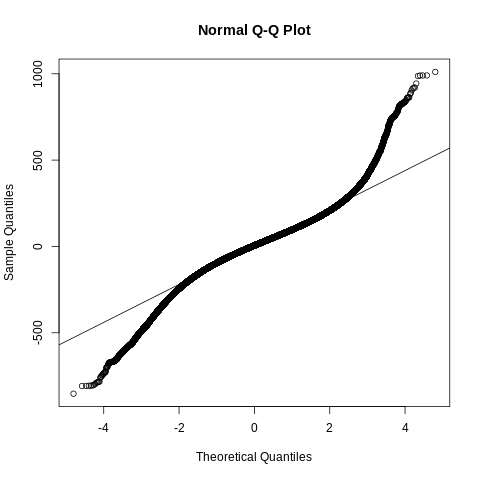

In [ ]:
%%R
qqnorm(residuals(fit.9b))
abline(0,sd(residuals(fit.9b)))

In [ ]:
%%R
confint(fit.9b)

                               2.5 %       97.5 %     Estimate
(Intercept)              585.6113101  625.3352971  605.4733036
fDimCat3                   1.7066057    4.2452799    2.9759428
fDimCat4                  29.4351794   31.9686243   30.7019018
fDimCat5                  57.0895769   59.9290093   58.5092931
fDimCat6                  71.8823065   75.3591705   73.6207385
fLactationNumberCat2      -7.5840947   -2.6097382   -5.0969165
fLactationNumberCat3     -33.7092298  -24.6192395  -29.1642347
fLactationNumberCat4     -60.6584916  -47.3598666  -54.0091791
fLactationNumberCat5     -78.4431702  -60.7350394  -69.5891048
fLactationNumberCat6    -105.2523717  -82.4526071  -93.8524894
fLactationNumberCat7    -106.9738531  -78.3352647  -92.6545589
fLactationNumberCat8    -144.5434683 -108.9873692 -126.7654187
fTempMean1daybeforeCat1    0.7786085    3.7924749    2.2855417
fTempMean1daybeforeCat2   -6.5115220   -2.9217449   -4.7166334
fTempMean1daybeforeCat3  -10.1377717   -6.2963210   -8.

In [ ]:
%%R
rm(fit.9b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739364  146.3    6364812  340.0   5795850  309.6
Vcells 200163437 1527.2  402605763 3071.7 385607265 2942.0


In [ ]:
%%R
##DRY 
fit.9c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model9c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMean1daybeforeDRY.R'
save(fit.9c, file= url_model9c)
summary(fit.9c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968441.4  968801.4 -484181.7  968363.4     75395 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.325e+04 152.4803       
              Day         4.561e-02   0.2136 -0.78 
 Residual                 1.976e+04 140.5829       
Number of obs: 75434, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             661.5607     9.3961   70.41  < 2e-16 ***
fLactationNumberCat2     76.0205     3.3842   22.46  < 2e-16 ***
fLactationNumberCat3     75.6742     4.4611   16.96  < 2e-16 ***
fLactationNumberCat4     67.8044     5.3334   12.71  < 2e-16 ***


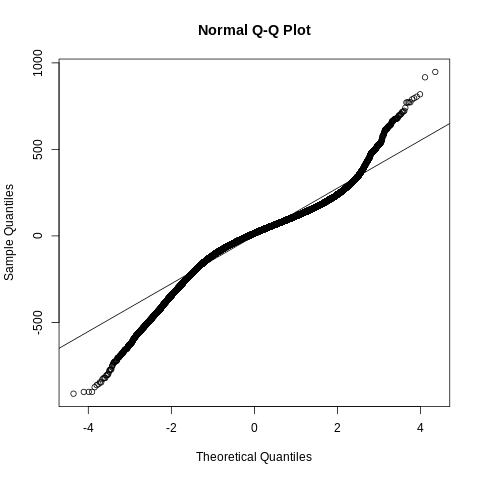

In [ ]:
%%R
qqnorm(residuals(fit.9c))
abline(0,sd(residuals(fit.9c)))

In [ ]:
%%R
confint(fit.9c)

                              2.5 %      97.5 %    Estimate
(Intercept)             643.1447840 679.9766690 661.5607265
fLactationNumberCat2     69.3876742  82.6534246  76.0205494
fLactationNumberCat3     66.9305776  84.4177909  75.6741843
fLactationNumberCat4     57.3512141  78.2576253  67.8044197
fLactationNumberCat5     60.6068230  85.1035094  72.8551662
fLactationNumberCat6     61.5429466  91.2449705  76.3939586
fLactationNumberCat7     77.5323750 116.6451951  97.0887851
fLactationNumberCat8     81.7624576 135.8299610 108.7962093
fTempMean1daybeforeCat1  -4.6799884   7.9950304   1.6575210
fTempMean1daybeforeCat2 -10.9749292   3.9977064  -3.4886114
fTempMean1daybeforeCat3 -11.4593163   4.3868370  -3.5362397
fTempMean1daybeforeCat4  -7.3438600   9.9997765   1.3279582
fTempMean1daybeforeCat5 -15.1203083   7.7625855  -3.6788614
fTempMean1daybeforeCat6 -24.9130743  13.7089642  -5.6020551
fYear2018                21.3126760  32.7843279  27.0485020
fYear2019                 8.5674903  27.

In [ ]:
%%R
rm(fit.9c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2176856  116.3    6364812  340.0   5795850  309.6
Vcells 172849603 1318.8  402605763 3071.7 385607265 2942.0


## Model Temp mean 2 days before

In [ ]:
%%R
##AMS
fit.10a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model10a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMean2daysbeforeAMS.R'
save(fit.10a, file= url_model10a)
summary(fit.10a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672657  3673059 -1836290  3672581   292580 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.511e+04 255.162        
              Day         1.317e-01   0.363  -0.78 
 Residual                 1.619e+04 127.222        
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               678.7093    13.5276   50.17  < 2e-16 ***
fDimCat3                   -6.2220     1.1686   -5.32 1.01e-07 ***
fDimCat4                   13.9833     1.1854   11.80  < 2e-16 ***
fDimCat5                   46.5495     1.3667   34.06  

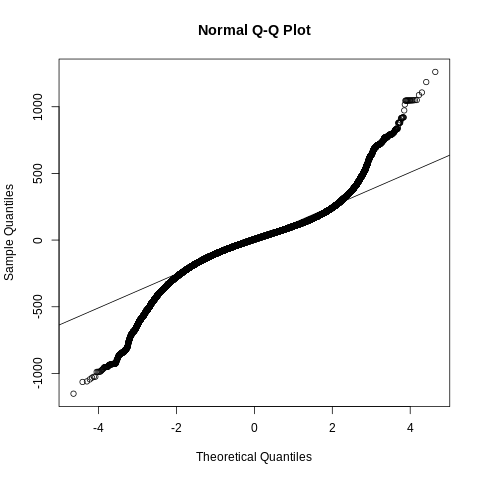

In [ ]:
%%R
qqnorm(residuals(fit.10a))
abline(0,sd(residuals(fit.10a)))

In [ ]:
%%R
confint(fit.10a)

                                2.5 %       97.5 %     Estimate
(Intercept)               652.1956889  705.2229285  678.7093087
fDimCat3                   -8.5122751   -3.9316369   -6.2219560
fDimCat4                   11.6600058   16.3065332   13.9832695
fDimCat5                   43.8708510   49.2281645   46.5495078
fDimCat6                   49.4193193   56.1689597   52.7941395
fLactationNumberCat2      -34.5065468  -24.5024864  -29.5045166
fLactationNumberCat3      -72.9577904  -54.1906941  -63.5742422
fLactationNumberCat4      -94.1818189  -66.8768773  -80.5293481
fLactationNumberCat5     -108.9400521  -72.7654978  -90.8527749
fLactationNumberCat6     -118.3764692  -72.8867870  -95.6316281
fLactationNumberCat7     -157.6587219 -102.8265411 -130.2426315
fLactationNumberCat8     -158.3899963  -93.1144730 -125.7522347
fTempMean2daysbeforeCat0  -11.6025487   -5.9881264   -8.7953375
fTempMean2daysbeforeCat2   -2.9413298    0.6352217   -1.1530541
fTempMean2daysbeforeCat3   -3.6632285   

In [ ]:
%%R
rm(fit.10a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394219  127.9    6364812  340.0   5795850  309.6
Vcells 182661601 1393.6  402605763 3071.7 385607265 2942.0


In [ ]:
%%R
##CMS 
fit.10b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model10b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMean2daysbeforeCMS.R'
save(fit.10b, file= url_model10b)
summary(fit.10b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7816771  7817225 -3908345  7816691   637477 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.729e+04 193.1076       
              Day         6.146e-02   0.2479 -0.75 
 Residual                 1.212e+04 110.1128       
Number of obs: 637517, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               606.8959    10.1274   59.93  < 2e-16 ***
fDimCat3                    2.9817     0.6478    4.60 4.17e-06 ***
fDimCat4                   30.6813     0.6465   47.46  < 2e-16 ***
fDimCat5                   58.4720     0.7247   80.69 

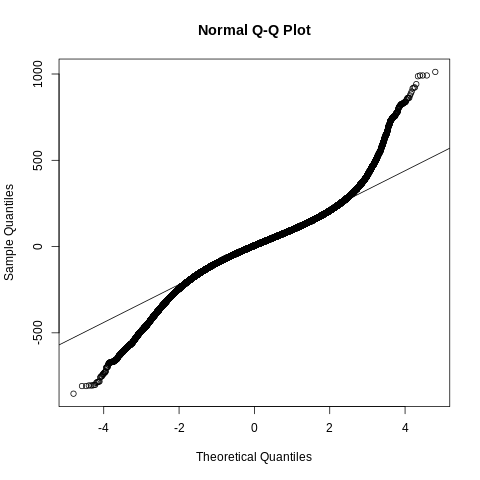

In [ ]:
%%R
qqnorm(residuals(fit.10b))
abline(0,sd(residuals(fit.10b)))

In [ ]:
%%R
confint(fit.10b)

                                2.5 %       97.5 %     Estimate
(Intercept)               587.0466654  626.7452247  606.8959451
fDimCat3                    1.7120048    4.2513047    2.9816548
fDimCat4                   29.4141569   31.9483790   30.6812680
fDimCat5                   57.0516359   59.8922716   58.4719537
fDimCat6                   71.8130742   75.2918927   73.5524834
fLactationNumberCat2       -7.6600360   -2.6824813   -5.1712587
fLactationNumberCat3      -33.9097243  -24.8134843  -29.3616043
fLactationNumberCat4      -61.0233379  -47.7151060  -54.3692219
fLactationNumberCat5      -79.0702532  -61.3489084  -70.2095808
fLactationNumberCat6     -106.0919222  -83.2751699  -94.6835460
fLactationNumberCat7     -108.0434575  -79.3842469  -93.7138522
fLactationNumberCat8     -145.9480628 -110.3684558 -128.1582593
fTempMean2daysbeforeCat0   -4.4260193   -1.4194553   -2.9227373
fTempMean2daysbeforeCat2   -4.0137792   -2.0443168   -3.0290480
fTempMean2daysbeforeCat3   -8.9391841   

In [ ]:
%%R
rm(fit.10b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739271  146.3    6364812  340.0   5795850  309.6
Vcells 200158820 1527.1  402605763 3071.7 385607265 2942.0


In [ ]:
%%R
##DRY 
fit.10c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model10c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMean2daysbeforeDRY.R'
save(fit.10c, file= url_model10c)
summary(fit.10c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968323.1  968683.1 -484122.5  968245.1     75385 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.328e+04 152.5936       
              Day         4.569e-02   0.2138 -0.78 
 Residual                 1.977e+04 140.5903       
Number of obs: 75424, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              662.6759     9.0970   72.85  < 2e-16 ***
fLactationNumberCat2      76.0072     3.3852   22.45  < 2e-16 ***
fLactationNumberCat3      75.6145     4.4631   16.94  < 2e-16 ***
fLactationNumberCat4      67.7028     5.3357   12.69  < 2e-

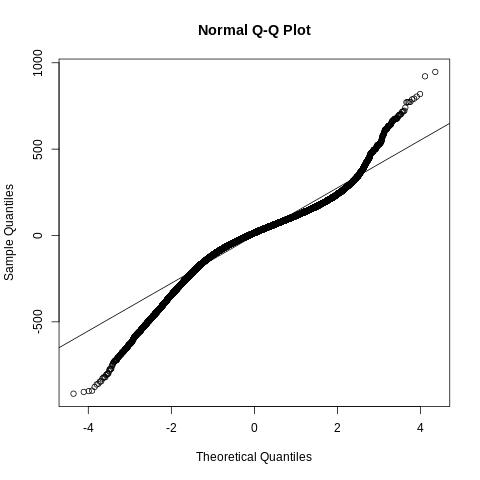

In [ ]:
%%R
qqnorm(residuals(fit.10c))
abline(0,sd(residuals(fit.10c)))

In [ ]:
%%R
confint(fit.10c)

                               2.5 %      97.5 %    Estimate
(Intercept)              644.8460317 680.5057171 662.6758744
fLactationNumberCat2      69.3723924  82.6420449  76.0072186
fLactationNumberCat3      66.8668938  84.3620221  75.6144580
fLactationNumberCat4      57.2451205  78.1605378  67.7028291
fLactationNumberCat5      60.4218245  84.9276997  72.6747621
fLactationNumberCat6      61.2934225  91.0054918  76.1494571
fLactationNumberCat7      77.4646104 116.5899730  97.0272917
fLactationNumberCat8      81.8667506 135.9523981 108.9095743
fTempMean2daysbeforeCat0  -6.4497818   6.1969675  -0.1264072
fTempMean2daysbeforeCat2  -4.6891968   3.3472817  -0.6709575
fTempMean2daysbeforeCat3  -6.9650266   2.6291664  -2.1679301
fTempMean2daysbeforeCat4  -3.5603229   8.3639358   2.4018065
fTempMean2daysbeforeCat5  -8.3192627  10.8807409   1.2807391
fTempMean2daysbeforeCat6 -16.4077880  20.7471440   2.1696780
fYear2018                 21.3881634  32.8702201  27.1291918
fYear2019               

In [ ]:
%%R
rm(fit.10c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177331  116.3    6364812  340.0   5795850  309.6
Vcells 172854372 1318.8  402605763 3071.7 385607265 2942.0


# Run models Lying grouped in 6 groups per 5

## Create sub datasets

In [ ]:
## load dataset
%%R 
url5 <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/df_joined_per5_lying.csv'

dataset_per5 <- read.csv(url5, header = TRUE, sep = ",")[ ,c('SensorValue','DimCat','LactationNumber','ThiMeanCat','TempMeanCat','ThiMaxCat','TempMinCat','ThiMinCat',
                                                       'ThiMean1daybeforeCat', 'TempMean1daybeforeCat', 'ThiMean2daysbeforeCat', 'TempMean2daysbeforeCat','CowLac',  
                                                        'TempMaxCat','Year', 'Month', 'HerdIdentifier','Day','AnimalEartag', 'Temp6Hrs16','Thi6Hrs60')]
## Change categorized data to factor and relevel 
dataset<-dataset_per5
dataset$fDimCat <- factor(dataset$DimCat)
dataset$fHerdIdentifier <- factor(dataset$HerdIdentifier)
dataset$fYear <- factor(dataset$Year)
dataset$fMonth <- factor(dataset$Month)
dataset$fThiMeanCat <- factor(dataset$ThiMeanCat)
dataset$fThiMaxCat <- factor(dataset$ThiMaxCat)
dataset$fThiMinCat <- factor(dataset$ThiMinCat)
dataset$fTempMeanCat <- factor(dataset$TempMeanCat)
dataset$fTempMaxCat <- factor(dataset$TempMaxCat)
dataset$fTempMinCat <- factor(dataset$TempMinCat)
dataset$fThiMean1daybeforeCat <- factor(dataset$ThiMean1daybeforeCat)
dataset$fThiMean2daysbeforeCat <- factor(dataset$ThiMean2daysbeforeCat)
dataset$fTempMean2daysbeforeCat <- factor(dataset$TempMean2daysbeforeCat)
dataset$fTempMean1daybeforeCat <- factor(dataset$TempMean1daybeforeCat)
dataset$fTemp6Hrs16 <- factor(dataset$Temp6Hrs16)
dataset$fThi6Hrs60 <- factor(dataset$Thi6Hrs60)
dataset$fLactationNumberCat <- factor(dataset$LactationNumber)
dataset <- within(dataset, fThiMeanCat <- relevel(fThiMeanCat, ref = "1"))
dataset <- within(dataset, fThiMinCat <- relevel(fThiMinCat, ref = "1"))
dataset <- within(dataset, fThiMaxCat <- relevel(fThiMaxCat, ref = "1"))
dataset <- within(dataset, fTempMeanCat <- relevel(fTempMeanCat, ref = "1"))
dataset <- within(dataset, fTempMinCat <- relevel(fTempMinCat, ref = "1"))
dataset <- within(dataset, fTempMaxCat <- relevel(fTempMaxCat, ref = "1"))
dataset <- within(dataset, fThiMean1daybeforeCat <- relevel(fThiMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean1day1beforeCat <- relevel(fTempMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fThiMean2daysbeforeCat <- relevel(fThiMean2daysbeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean2daysbeforeCat <- relevel(fTempMean2daysbeforeCat, ref = "1"))

In [ ]:
%%R
dataset_milk <- filter(dataset, fDimCat==1|fDimCat==2|fDimCat==3|fDimCat==4|fDimCat==5|fDimCat==6)
dataset_dry <- filter(dataset, fDimCat==0)
dataset_AMS <- filter(dataset_milk, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_CMS <- filter(dataset_milk, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)
dataset_dry_AMS <- filter(dataset_dry, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_dry_CMS <- filter(dataset_dry, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)

In [ ]:
%%R
write.csv(dataset_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per5_lying_AMS.csv', row.names = FALSE)
write.csv(dataset_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per5_lying_CMS.csv', row.names = FALSE)
write.csv(dataset_dry, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per5_lying_DRY.csv', row.names = FALSE)
write.csv(dataset_milk, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per5_lying_milk.csv', row.names = FALSE)
write.csv(dataset_dry_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per5_lying_DRY_AMS.csv', row.names = FALSE)
write.csv(dataset_dry_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per5_lying_DRY_CMS.csv', row.names = FALSE)


## Descriptives lactating AMS/CMS, dry cow

In [ ]:
%%R
data_count_AMS_cowlac <- dataset_AMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_AMS_cowlac

  count
1  1332


In [ ]:
%%R
data_count_AMS_cow <- dataset_AMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_AMS_cow

  count
1   559


In [ ]:
%%R
data_count_CMS_cowlac <- dataset_CMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_CMS_cowlac

  count
1  2793


In [ ]:
%%R
data_count_dry_CMS <- dataset_CMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_CMS

  count
1  1283


In [ ]:
%%R
data_count_dry_cowlac <- dataset_dry %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_dry_cowlac

  count
1  3615


In [ ]:
%%R
data_count_dry_cow <- dataset_dry %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_cow

  count
1  1878


In [ ]:
%%R
table(dataset_AMS$ThiMeanCat)


     0      1      2      3      4      5 
  1729 170485  44223  48708  21930   5543 


In [ ]:
%%R
table(dataset_AMS$ThiMaxCat)


     0      1      2      3      4      5 
   111 121714  40544  42890  49717  37642 


In [ ]:
%%R
table(dataset_AMS$ThiMinCat)


     0      1      2      3      4      5 
 14639 126635  49761  44942  39314  17327 


In [ ]:
%%R
table(dataset_AMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5 
  1735 170502  44287  48577  21996   5521 


In [ ]:
%%R
table(dataset_AMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5 
  1735 170727  44320  48414  21921   5501 


In [ ]:
%%R
table(dataset_AMS$TempMeanCat)


     0      1      2      3      4      5 
  9103 127334  62849  72429  18230   2673 


In [ ]:
%%R
table(dataset_AMS$TempMaxCat)


    0     1     2     3     4     5 
 2935 83150 66428 59420 54218 26467 


In [ ]:
%%R
table(dataset_AMS$TempMinCat)


    0     1     2     3     4     5 
30660 79839 83538 74079 23415  1087 


In [ ]:
%%R
table(dataset_AMS$TempMean1daybeforeCat)


     0      1      2      3      4      5 
  9092 127471  62846  72334  18214   2661 


In [ ]:
%%R
table(dataset_AMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5 
  9042 127655  63020  72053  18198   2650 


In [ ]:
%%R
table(dataset_CMS$ThiMeanCat)


     0      1      2      3      4      5 
  8773 353497 107544 104978  47822  15091 


In [ ]:
%%R
table(dataset_CMS$ThiMaxCat)


     0      1      2      3      4      5 
  1158 248229  86678  92711 115205  93724 


In [ ]:
%%R
table(dataset_CMS$ThiMinCat)


     0      1      2      3      4      5 
 46512 279447 108639  96724  77154  29229 


In [ ]:
%%R
table(dataset_CMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5 
  8771 353720 107414 104697  47922  15087 


In [ ]:
%%R
table(dataset_CMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5 
  8768 354169 106892 104693  47916  15079 


In [ ]:
%%R
table(dataset_CMS$TempMeanCat)


     0      1      2      3      4      5 
 24975 261573 143410 153053  46491   8203 


In [ ]:
%%R
table(dataset_CMS$TempMaxCat)


     0      1      2      3      4      5 
  8728 172217 127490 129244 128586  71440 


In [ ]:
%%R
table(dataset_CMS$TempMinCat)


     0      1      2      3      4      5 
 91652 166393 181768 156718  38030   3144 


In [ ]:
%%R
table(dataset_CMS$TempMean1daybeforeCat)


     0      1      2      3      4      5 
 24886 261999 143404 152534  46589   8199 


In [ ]:
%%R
table(dataset_CMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5 
 24899 262345 142968 152437  46662   8206 


In [ ]:
%%R
table(dataset_dry$ThiMeanCat)


    0     1     2     3     4     5 
  925 39465 12669 14093  6421  1870 


In [ ]:
%%R
table(dataset_dry$ThiMaxCat)


    0     1     2     3     4     5 
  106 27649  9800 11499 14465 11924 


In [ ]:
%%R
table(dataset_dry$ThiMinCat)


    0     1     2     3     4     5 
 4843 30467 12740 12219 10874  4300 


In [ ]:
%%R
table(dataset_dry$ThiMean1daybeforeCat)


    0     1     2     3     4     5 
  941 39499 12586 14100  6439  1869 


In [ ]:
%%R
table(dataset_dry$ThiMean2daysbeforeCat)


    0     1     2     3     4     5 
  965 39479 12581 14098  6457  1844 


In [ ]:
%%R
table(dataset_dry$TempMeanCat)


    0     1     2     3     4     5 
 2714 28867 16628 20402  5828  1004 


In [ ]:
%%R
table(dataset_dry$TempMaxCat)


    0     1     2     3     4     5 
  972 19132 14541 15878 16113  8807 


In [ ]:
%%R
table(dataset_dry$TempMinCat)


    0     1     2     3     4     5 
 9290 18474 20909 20720  5644   406 


In [ ]:
%%R
table(dataset_dry$TempMean1daybeforeCat)


    0     1     2     3     4     5 
 2732 28843 16663 20341  5855  1000 


In [ ]:
%%R
table(dataset_dry$TempMean2daysbeforeCat)


    0     1     2     3     4     5 
 2749 28860 16633 20335  5860   987 


## Model THI mean

In [ ]:
%%R
##AMS
fit.1a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model1a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMeanAMS.R'
save(fit.1a, file= url_model1a)
summary(fit.1a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3671872  3672264 -1835899  3671798   292581 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.442e+04 253.8117       
              Day         1.306e-01   0.3614 -0.78 
 Residual                 1.614e+04 127.0530       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.61e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           687.218     13.428   51.18  < 2e-16 ***
fDimCat3               -6.116      1.167   -5.24 1.60e-07 ***
fDimCat4               14.188      1.183   11.99  < 2e-16 ***
fDimCat5               46.893      1.364   34.38  < 2e-16 ***
fDimCat6               53

In [ ]:
%%R
confint(fit.1a)

                            2.5 %      97.5 %     Estimate
(Intercept)           660.9001361 713.5364189  687.2182775
fDimCat3               -8.4035075  -3.8290653   -6.1162864
fDimCat4               11.8682653  16.5075610   14.1879132
fDimCat5               44.2195527  49.5666872   46.8931200
fDimCat6               50.0717192  56.8065499   53.4391345
fLactationNumberCat2  -33.5530055 -23.5745611  -28.5637833
fLactationNumberCat3  -70.9819339 -52.2642561  -61.6230950
fLactationNumberCat4  -91.1391072 -63.9065496  -77.5228284
fLactationNumberCat5 -104.7776064 -68.6994971  -86.7385517
fLactationNumberCat6 -113.2110682 -67.8417039  -90.5263861
fLactationNumberCat7 -151.0742912 -96.3831686 -123.7287299
fLactationNumberCat8 -151.0329388 -85.9188689 -118.4759039
fThiMeanCat0          -24.7539008 -12.4442726  -18.5990867
fThiMeanCat2           -5.5440632  -1.9338379   -3.7389506
fThiMeanCat3          -10.6071510  -6.4372268   -8.5221889
fThiMeanCat4          -25.4989872 -20.3808562  -22.93992

In [ ]:
%%R
rm(fit.1a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394287  127.9    6364812  340.0   5795850  309.6
Vcells 191923586 1464.3  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.1b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model1b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMeanCMS.R'
save(fit.1b, file= url_model1b)
summary(fit.1b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817415  7817858 -3908669  7817337   637666 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.700e+04 192.343        
              Day         6.099e-02   0.247  -0.75 
 Residual                 1.209e+04 109.971        
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           611.5719    10.0930   60.59  < 2e-16 ***
fDimCat3                2.9193     0.6468    4.51 6.39e-06 ***
fDimCat4               30.7521     0.6454   47.65  < 2e-16 ***
fDimCat5               58.6194     0.7231   81.07  < 2e-16 ***
fDimCat6           

In [ ]:
%%R
confint(fit.1b)

                            2.5 %       97.5 %     Estimate
(Intercept)           591.7900886  631.3537938  611.5719412
fDimCat3                1.6515459    4.1871270    2.9193365
fDimCat4               29.4871539   32.0170738   30.7521138
fDimCat5               57.2021490   60.0366200   58.6193845
fDimCat6               72.0892924   75.5586592   73.8239758
fLactationNumberCat2   -7.3068644   -2.3447779   -4.8258212
fLactationNumberCat3  -33.0030157  -23.9365627  -28.4697892
fLactationNumberCat4  -59.4932721  -46.2295145  -52.8613933
fLactationNumberCat5  -76.6703990  -59.0092960  -67.8398475
fLactationNumberCat6 -102.8874796  -80.1484995  -91.5179895
fLactationNumberCat7 -103.9233542  -75.3596172  -89.6414857
fLactationNumberCat8 -140.7747186 -105.3067177 -123.0407182
fThiMeanCat0           -3.8690752    0.9813620   -1.4438566
fThiMeanCat2           -8.6324774   -6.6526328   -7.6425551
fThiMeanCat3          -13.4038162  -11.0354451  -12.2196306
fThiMeanCat4          -25.4428594  -22.5

In [ ]:
%%R
rm(fit.1b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739500  146.4    6364812  340.0   5795850  309.6
Vcells 208765495 1592.8  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##DRY 
fit.1c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model1c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMeanDRY.R'
save(fit.1c, file= url_model1c)
summary(fit.1c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968514.3  968865.1 -484219.2  968438.3     75405 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.330e+04 152.6372       
              Day         4.572e-02   0.2138 -0.78 
 Residual                 1.975e+04 140.5394       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           664.337      9.077   73.19  < 2e-16 ***
fLactationNumberCat2   76.058      3.384   22.47  < 2e-16 ***
fLactationNumberCat3   75.739      4.462   16.97  < 2e-16 ***
fLactationNumberCat4   67.699      5.335   12.69  < 2e-16 ***
fLactationNumberCat5   72

In [ ]:
%%R
confint(fit.1c)

                           2.5 %      97.5 %    Estimate
(Intercept)          646.5462123 682.1269890 664.3366007
fLactationNumberCat2  69.4243596  82.6910900  76.0577248
fLactationNumberCat3  66.9932075  84.4838864  75.7385470
fLactationNumberCat4  57.2426187  78.1551638  67.6988912
fLactationNumberCat5  60.4117084  84.9157628  72.6637356
fLactationNumberCat6  61.5088825  91.2210963  76.3649894
fLactationNumberCat7  78.0473312 117.1713094  97.6093203
fLactationNumberCat8  82.6906846 136.7740773 109.7323809
fThiMeanCat0         -24.0965910  -3.9848268 -14.0407089
fThiMeanCat2         -14.5086885  -6.4832328 -10.4959607
fThiMeanCat3         -14.9238149  -5.5741523 -10.2489836
fThiMeanCat4         -18.7468708  -7.5775414 -13.1622061
fThiMeanCat5         -34.8745967 -18.4767887 -26.6756927
fYear2018             21.8891245  33.3638700  27.6264972
fYear2019              8.6531404  27.6068248  18.1299826
fYear2020              1.8980858  29.5272175  15.7126517
fMonth2               -5.798873

In [ ]:
%%R
rm(fit.1c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177390  116.3    6364812  340.0   5795850  309.6
Vcells 182296371 1390.9  402605763 3071.7 402563854 3071.4


## Model THI max

In [ ]:
%%R
##AMS
fit.2a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model2a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMaxAMS.R'
save(fit.2a, file= url_model2a)
summary(fit.2a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672096  3672487 -1836011  3672022   292581 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.468e+04 254.3168       
              Day         1.307e-01   0.3615 -0.78 
 Residual                 1.615e+04 127.1013       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           684.9724    13.4516   50.92  < 2e-16 ***
fDimCat3               -6.0365     1.1674   -5.17 2.33e-07 ***
fDimCat4               14.2454     1.1840   12.03  < 2e-16 ***
fDimCat5               46.9665     1.3648   34.41  < 2e-16 ***
fDimCat6             

In [ ]:
%%R
confint(fit.2a)

                            2.5 %      97.5 %     Estimate
(Intercept)           658.6078364 711.3370186  684.9724275
fDimCat3               -8.3246070  -3.7483555   -6.0364812
fDimCat4               11.9247012  16.5660868   14.2453940
fDimCat5               44.2914738  49.6414761   46.9664750
fDimCat6               50.0390917  56.7781722   53.4086320
fLactationNumberCat2  -33.8907746 -23.9053490  -28.8980618
fLactationNumberCat3  -71.8054197 -53.0744313  -62.4399255
fLactationNumberCat4  -92.3012957 -65.0494620  -78.6753789
fLactationNumberCat5 -106.4275857 -70.3239002  -88.3757430
fLactationNumberCat6 -115.4242837 -70.0236304  -92.7239570
fLactationNumberCat7 -153.9921773 -99.2655977 -126.6288875
fLactationNumberCat8 -154.3801059 -89.2264566 -121.8032812
fThiMaxCat0           -64.5113511 -16.9613693  -40.7363602
fThiMaxCat2             3.6100036   7.0722623    5.3411329
fThiMaxCat3             0.1555949   4.3547174    2.2551562
fThiMaxCat4            -3.0445814   1.4613364   -0.79162

In [ ]:
%%R
rm(fit.2a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394257  127.9    6364812  340.0   5795850  309.6
Vcells 191923544 1464.3  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.2b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model2b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMaxCMS.R'
save(fit.2b, file= url_model2b)
summary(fit.2b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817706  7818150 -3908814  7817628   637666 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.711e+04 192.6325       
              Day         6.124e-02   0.2475 -0.75 
 Residual                 1.210e+04 109.9951       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           609.5547    10.1048   60.32  < 2e-16 ***
fDimCat3                2.9688     0.6470    4.59 4.46e-06 ***
fDimCat4               30.7559     0.6456   47.64  < 2e-16 ***
fDimCat5               58.5788     0.7234   80.98  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.2b)

                            2.5 %       97.5 %     Estimate
(Intercept)           589.7495870  629.3597535  609.5546702
fDimCat3                1.7007067    4.2369010    2.9688039
fDimCat4               29.4906005   32.0212658   30.7559332
fDimCat5               57.1610116   59.9966489   58.5788302
fDimCat6               72.0044654   75.4757299   73.7400976
fLactationNumberCat2   -7.2449926   -2.2799604   -4.7624765
fLactationNumberCat3  -33.0820998  -24.0094826  -28.5457912
fLactationNumberCat4  -59.8968951  -46.6232859  -53.2600905
fLactationNumberCat5  -77.6685472  -59.9935224  -68.8310348
fLactationNumberCat6 -104.4430029  -81.6851750  -93.0640889
fLactationNumberCat7 -105.9951317  -77.4075388  -91.7013352
fLactationNumberCat8 -143.5109847 -108.0149388 -125.7629617
fThiMaxCat0             8.9255659   21.7251377   15.3253518
fThiMaxCat2            -0.6430724    1.4498021    0.4033649
fThiMaxCat3            -5.2243424   -2.7554298   -3.9898861
fThiMaxCat4            -8.3576881   -5.7

In [ ]:
%%R
rm(fit.2b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739493  146.4    6364812  340.0   5795850  309.6
Vcells 208765674 1592.8  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##DRY 
fit.2c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model2c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMaxDRY.R'
save(fit.2c, file= url_model2c)
summary(fit.2c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968539.8  968890.5 -484231.9  968463.8     75405 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.329e+04 152.6038       
              Day         4.566e-02   0.2137 -0.78 
 Residual                 1.976e+04 140.5668       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           662.290      9.060   73.10  < 2e-16 ***
fLactationNumberCat2   76.133      3.384   22.50  < 2e-16 ***
fLactationNumberCat3   75.784      4.461   16.99  < 2e-16 ***
fLactationNumberCat4   67.773      5.334   12.71  < 2e-16 ***
fLactationNumberCat5   72.

In [ ]:
%%R
confint(fit.2c)

                           2.5 %      97.5 %    Estimate
(Intercept)          644.5333459 680.0472907 662.2903183
fLactationNumberCat2  69.5003131  82.7653837  76.1328484
fLactationNumberCat3  67.0405125  84.5280321  75.7842723
fLactationNumberCat4  57.3191894  78.2274113  67.7733003
fLactationNumberCat5  60.3593523  84.8569602  72.6081562
fLactationNumberCat6  61.3473718  91.0491355  76.1982537
fLactationNumberCat7  77.5001954 116.6108994  97.0555474
fLactationNumberCat8  82.1128321 136.1741281 109.1434801
fThiMaxCat0          -22.9976624  31.9109144   4.4566260
fThiMaxCat2           -1.3969933   6.9965996   2.7998032
fThiMaxCat3          -11.8202178  -1.7625255  -6.7913716
fThiMaxCat4           -8.2219879   2.3827180  -2.9196349
fThiMaxCat5          -15.6522340  -4.1550771  -9.9036555
fYear2018             22.4136030  33.8947058  28.1541544
fYear2019              9.0587562  27.9988389  18.5287976
fYear2020              2.1664824  29.7711885  15.9688355
fMonth2               -4.732344

In [ ]:
%%R
rm(fit.2c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177374  116.3    6364812  340.0   5795850  309.6
Vcells 182296529 1390.9  402605763 3071.7 402563854 3071.4


## Model THI min

In [ ]:
%%R
##AMS
fit.3a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model3a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIminAMS.R'
save(fit.3a, file= url_model3a)
summary(fit.3a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672402  3672794 -1836164  3672328   292581 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.483e+04 254.6102       
              Day         1.312e-01   0.3622 -0.78 
 Residual                 1.617e+04 127.1673       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           682.9366    13.4837   50.65  < 2e-16 ***
fDimCat3               -6.1319     1.1681   -5.25 1.52e-07 ***
fDimCat4               14.0742     1.1847   11.88  < 2e-16 ***
fDimCat5               46.6374     1.3657   34.15  < 2e-16 ***
fDimCat6             

In [ ]:
%%R
confint(fit.3a)

                            2.5 %      97.5 %     Estimate
(Intercept)           656.5090472 709.3641818  682.9366145
fDimCat3               -8.4212429  -3.8425591   -6.1319010
fDimCat4               11.7522431  16.3962528   14.0742480
fDimCat5               43.9606256  49.3141026   46.6373641
fDimCat6               49.7068969  56.4509945   53.0789457
fLactationNumberCat2  -33.3938755 -23.3974743  -28.3956749
fLactationNumberCat3  -70.7465578 -51.9941735  -61.3703656
fLactationNumberCat4  -91.3450260 -64.0632018  -77.7041139
fLactationNumberCat5 -105.3922652 -69.2490834  -87.3206743
fLactationNumberCat6 -114.2780660 -68.8281500  -91.5531080
fLactationNumberCat7 -153.0330381 -98.2473302 -125.6401841
fLactationNumberCat8 -153.5811625 -88.3591242 -120.9701434
fThiMinCat0           -11.7004292  -7.2172142   -9.4588217
fThiMinCat2             1.5132534   4.4268576    2.9700555
fThiMinCat3            -4.3877294  -0.7511234   -2.5694264
fThiMinCat4           -10.9040079  -6.7165245   -8.81026

In [ ]:
%%R
rm(fit.3a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394704  127.9    6364812  340.0   5795850  309.6
Vcells 191928522 1464.3  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.3b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model3b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMinCMS.R'
save(fit.3b, file= url_model3b)
summary(fit.3b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7818516  7818959 -3909219  7818438   637666 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.713e+04 192.7024       
              Day         6.126e-02   0.2475 -0.75 
 Residual                 1.211e+04 110.0652       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           609.2496    10.1080   60.27  < 2e-16 ***
fDimCat3                3.0218     0.6474    4.67 3.05e-06 ***
fDimCat4               30.7733     0.6460   47.63  < 2e-16 ***
fDimCat5               58.6088     0.7240   80.96  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.3b)

                            2.5 %       97.5 %     Estimate
(Intercept)           589.4383610  629.0608833  609.2496221
fDimCat3                1.7529321    4.2907240    3.0218281
fDimCat4               29.5070988   32.0395123   30.7733055
fDimCat5               57.1898851   60.0277607   58.6088229
fDimCat6               72.0274015   75.5017673   73.7645844
fLactationNumberCat2   -7.4743139   -2.5043380   -4.9893260
fLactationNumberCat3  -33.4132533  -24.3313809  -28.8723171
fLactationNumberCat4  -60.1353679  -46.8489654  -53.4921666
fLactationNumberCat5  -77.5750293  -59.8835701  -68.7292997
fLactationNumberCat6 -104.0825664  -81.3046156  -92.6935910
fLactationNumberCat7 -105.5636747  -76.9522406  -91.2579576
fLactationNumberCat8 -142.8633275 -107.3390100 -125.1011688
fThiMinCat0            -3.6536061   -1.4166407   -2.5351234
fThiMinCat2            -4.6210163   -2.8901767   -3.7555965
fThiMinCat3            -7.2578820   -5.1972081   -6.2275450
fThiMinCat4           -10.1207761   -7.8

In [ ]:
%%R
rm(fit.3b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739936  146.4    6364812  340.0   5795850  309.6
Vcells 208770636 1592.8  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##DRY 
fit.3c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model3c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMinDRY.R'
save(fit.3c, file= url_model3c)
summary(fit.3c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968547.8  968898.5 -484235.9  968471.8     75405 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.331e+04 152.6625       
              Day         4.573e-02   0.2138 -0.78 
 Residual                 1.976e+04 140.5715       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          664.3130     9.0879   73.10  < 2e-16 ***
fLactationNumberCat2  75.9342     3.3854   22.43  < 2e-16 ***
fLactationNumberCat3  75.5169     4.4630   16.92  < 2e-16 ***
fLactationNumberCat4  67.6408     5.3362   12.68  < 2e-16 ***
fLactationNumberCat5  72.5

In [ ]:
%%R
confint(fit.3c)

                           2.5 %      97.5 %    Estimate
(Intercept)          646.5010140 682.1249732 664.3129936
fLactationNumberCat2  69.2989299  82.5695253  75.9342276
fLactationNumberCat3  66.7696640  84.2641749  75.5169194
fLactationNumberCat4  57.1820763  78.0994840  67.6407802
fLactationNumberCat5  60.2532506  84.7614495  72.5073501
fLactationNumberCat6  61.1218341  90.8360930  75.9789635
fLactationNumberCat7  77.7492742 116.8760851  97.3126797
fLactationNumberCat8  82.1920132 136.2798552 109.2359342
fThiMinCat0          -12.3824148  -2.8277604  -7.6050876
fThiMinCat2           -3.8329677   2.9204619  -0.4562529
fThiMinCat3           -9.0692146  -0.9927899  -5.0310023
fThiMinCat4           -7.2397176   1.7078598  -2.7659289
fThiMinCat5          -15.6159785  -3.8622271  -9.7391028
fYear2018             21.6246441  33.0875345  27.3560893
fYear2019              8.6411456  27.5955473  18.1183464
fYear2020              1.6553941  29.2877769  15.4715855
fMonth2               -5.266119

In [ ]:
%%R
rm(fit.3c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177090  116.3    6364812  340.0   5795850  309.6
Vcells 182293213 1390.8  402605763 3071.7 402563854 3071.4


## Model THI mean 1 day before

In [ ]:
%%R
##AMS
fit.4a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model4a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMean1daybeforeAMS.R'
save(fit.4a, file= url_model4a)
summary(fit.4a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672540  3672931 -1836233  3672466   292581 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.495e+04 254.8544       
              Day         1.314e-01   0.3624 -0.78 
 Residual                 1.618e+04 127.1972       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             680.82241   13.49812   50.44  < 2e-16 ***
fDimCat3                 -6.18809    1.16832   -5.30 1.18e-07 ***
fDimCat4                 14.06095    1.18503   11.87  < 2e-16 ***
fDimCat5                 46.66767    1.36616   34.16  < 2e-16

In [ ]:
%%R
confint(fit.4a)

                              2.5 %        97.5 %      Estimate
(Intercept)             654.3665808  707.27823866  680.82240975
fDimCat3                 -8.4779606   -3.89821805   -6.18808933
fDimCat4                 11.7383215   16.38357316   14.06094732
fDimCat5                 43.9900579   49.34529125   46.66767458
fDimCat6                 49.6126486   56.35917262   52.98591060
fLactationNumberCat2    -33.9706514  -23.97283681  -28.97174409
fLactationNumberCat3    -72.0121067  -53.25657355  -62.63434012
fLactationNumberCat4    -92.9807706  -65.69205048  -79.33641056
fLactationNumberCat5   -107.5230282  -71.36982589  -89.44642702
fLactationNumberCat6   -116.8704529  -71.40727287  -94.13886288
fLactationNumberCat7   -155.9661570 -101.16495391 -128.56555544
fLactationNumberCat8   -156.8104926  -91.57130246 -124.19089753
fThiMean1daybeforeCat0  -22.3123580  -10.06505109  -16.18870455
fThiMean1daybeforeCat2   -6.3058787   -2.67981371   -4.49284622
fThiMean1daybeforeCat3   -9.1312916   -4

In [ ]:
%%R
rm(fit.4a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394422  127.9    6364812  340.0   5795850  309.6
Vcells 191925189 1464.3  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.4b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model4b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelThiMean1daybeforeCMS.R'
save(fit.4b, file= url_model4b)
summary(fit.4b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817732  7818175 -3908827  7817654   637572 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.717e+04 192.7837       
              Day         6.134e-02   0.2477 -0.75 
 Residual                 1.212e+04 110.0968       
Number of obs: 637611, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             607.9366    10.1143   60.11  < 2e-16 ***
fDimCat3                  2.9857     0.6476    4.61 4.02e-06 ***
fDimCat4                 30.7143     0.6463   47.52  < 2e-16 ***
fDimCat5                 58.5341     0.7243   80.81  < 2e-16 ***

In [ ]:
%%R
confint(fit.4b)

                              2.5 %       97.5 %     Estimate
(Intercept)             588.1128963  627.7603476  607.9366219
fDimCat3                  1.7163673    4.2550892    2.9857282
fDimCat4                 29.4476127   31.9810576   30.7143351
fDimCat5                 57.1144051   59.9537013   58.5340532
fDimCat6                 71.9159159   75.3924513   73.6541836
fLactationNumberCat2     -7.4742631   -2.5013024   -4.9877828
fLactationNumberCat3    -33.5270440  -24.4391167  -28.9830804
fLactationNumberCat4    -60.4789376  -47.1823507  -53.8306442
fLactationNumberCat5    -78.2956127  -60.5894059  -69.4425093
fLactationNumberCat6   -105.1392161  -82.3416110  -93.7404136
fLactationNumberCat7   -106.8881468  -78.2519422  -92.5700445
fLactationNumberCat8   -144.5576958 -109.0047451 -126.7812205
fThiMean1daybeforeCat0   -5.1663005   -0.3173709   -2.7418357
fThiMean1daybeforeCat2   -8.5610621   -6.5746406   -7.5678514
fThiMean1daybeforeCat3  -10.5698773   -8.1748352   -9.3723563
fThiMean

In [ ]:
%%R
rm(fit.4b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739557  146.4    6364812  340.0   5795850  309.6
Vcells 209081871 1595.2  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##DRY 
fit.4c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model4c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMean1daybeforeDRY.R'
save(fit.4c, file= url_model4c)
summary(fit.4c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968442.3  968793.1 -484183.2  968366.3     75396 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.326e+04 152.5020       
              Day         4.561e-02   0.2136 -0.78 
 Residual                 1.976e+04 140.5853       
Number of obs: 75434, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            663.21634    9.07410   73.09  < 2e-16 ***
fLactationNumberCat2    75.96604    3.38374   22.45  < 2e-16 ***
fLactationNumberCat3    75.57976    4.46088   16.94  < 2e-16 ***
fLactationNumberCat4    67.61579    5.33352   12.68  < 2e-16 ***


In [ ]:
%%R
confint(fit.4c)

                             2.5 %      97.5 %     Estimate
(Intercept)            645.4314325 681.0012407 663.21633662
fLactationNumberCat2    69.3340342  82.5980421  75.96603813
fLactationNumberCat3    66.8365996  84.3229251  75.57976235
fLactationNumberCat4    57.1622810  78.0693042  67.61579257
fLactationNumberCat5    60.4037860  84.9011627  72.65247437
fLactationNumberCat6    61.3268889  91.0308490  76.17886896
fLactationNumberCat7    77.4564751 116.5710434  97.01375927
fLactationNumberCat8    81.6757321 135.7472115 108.71147180
fThiMean1daybeforeCat0 -13.1015335   6.8089355  -3.14629902
fThiMean1daybeforeCat2  -7.6809667   0.3782878  -3.65133945
fThiMean1daybeforeCat3  -9.6091109  -0.1789460  -4.89402843
fThiMean1daybeforeCat4  -6.0009393   5.2348967  -0.38302130
fThiMean1daybeforeCat5  -9.2116719   7.2476551  -0.98200841
fYear2018               21.3037595  32.7750173  27.03938841
fYear2019                8.5761843  27.5163173  18.04625083
fYear2020                1.9267683  29.5

In [ ]:
%%R
rm(fit.4c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177522  116.3    6364812  340.0   5795850  309.6
Vcells 182335466 1391.2  402605763 3071.7 402563854 3071.4


##Model THI mean 2 days before

In [ ]:
%%R
##AMS
fit.5a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model5a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMean2daysbeforeAMS.R'
save(fit.5a, file= url_model5a)
summary(fit.5a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672662  3673053 -1836294  3672588   292581 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.519e+04 255.3182       
              Day         1.319e-01   0.3631 -0.78 
 Residual                 1.619e+04 127.2232       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              678.2463    13.5342   50.11  < 2e-16 ***
fDimCat3                  -6.2340     1.1686   -5.33 9.57e-08 ***
fDimCat4                  13.9786     1.1854   11.79  < 2e-16 ***
fDimCat5                  46.5481     1.3668   34.06  < 2e-1

In [ ]:
%%R
confint(fit.5a)

                               2.5 %       97.5 %     Estimate
(Intercept)              651.7197884  704.7727121  678.2462502
fDimCat3                  -8.5243838   -3.9436581   -6.2340210
fDimCat4                  11.6553120   16.3019579   13.9786350
fDimCat5                  43.8693189   49.2269123   46.5481156
fDimCat6                  49.3881031   56.1384491   52.7632761
fLactationNumberCat2     -34.3559510  -24.3514044  -29.3536777
fLactationNumberCat3     -72.7620028  -53.9930269  -63.3775148
fLactationNumberCat4     -94.0675277  -66.7585554  -80.4130416
fLactationNumberCat5    -108.9635294  -72.7830399  -90.8732846
fLactationNumberCat6    -118.5792153  -73.0819879  -95.8306016
fLactationNumberCat7    -157.9993340 -103.1586452 -130.5789896
fLactationNumberCat8    -159.0312912  -93.7480820 -126.3896866
fThiMean2daysbeforeCat0  -24.4697390  -12.2196050  -18.3446720
fThiMean2daysbeforeCat2   -3.3605804    0.2837417   -1.5384194
fThiMean2daysbeforeCat3   -3.6034463    0.6550143   -1.

In [ ]:
%%R
rm(fit.5a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394864  127.9    6364812  340.0   5795850  309.6
Vcells 191930157 1464.4  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.5b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model5b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelThiMean2daysbeforeCMS.R'
save(fit.5b, file= url_model5b)
summary(fit.5b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7816836  7817279 -3908379  7816758   637478 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.730e+04 193.138        
              Day         6.151e-02   0.248  -0.75 
 Residual                 1.213e+04 110.118        
Number of obs: 637517, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              605.8582    10.1302   59.81  < 2e-16 ***
fDimCat3                   3.0015     0.6478    4.63 3.60e-06 ***
fDimCat4                  30.6928     0.6465   47.47  < 2e-16 ***
fDimCat5                  58.5000     0.7247   80.72  < 2e-

In [ ]:
%%R
confint(fit.5b)

                               2.5 %       97.5 %     Estimate
(Intercept)              586.0033851  625.7129773  605.8581812
fDimCat3                   1.7318281    4.2712423    3.0015352
fDimCat4                  29.4256450   31.9600268   30.6928359
fDimCat5                  57.0795753   59.9204569   58.5000161
fDimCat6                  71.8419673   75.3212337   73.5816005
fLactationNumberCat2      -7.5438169   -2.5663125   -5.0550647
fLactationNumberCat3     -33.7612788  -24.6643212  -29.2128000
fLactationNumberCat4     -60.9332736  -47.6227911  -54.2780324
fLactationNumberCat5     -79.1113928  -61.3860948  -70.2487438
fLactationNumberCat6    -106.2819657  -83.4597610  -94.8708633
fLactationNumberCat7    -108.3724075  -79.7063867  -94.0393971
fLactationNumberCat8    -146.5103108 -110.9236969 -128.7170038
fThiMean2daysbeforeCat0    0.2037415    5.0526804    2.6282109
fThiMean2daysbeforeCat2   -3.9695738   -1.9761416   -2.9728577
fThiMean2daysbeforeCat3   -8.1396661   -5.7302227   -6.

In [ ]:
%%R
rm(fit.5b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739905  146.4    6364812  340.0   5795850  309.6
Vcells 209082374 1595.2  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##DRY 
fit.5c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model5c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTHIMean2daysbeforeDRY.R'
save(fit.5c, file= url_model5c)
summary(fit.5c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968318.0  968668.8 -484121.0  968242.0     75386 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.328e+04 152.5687       
              Day         4.567e-02   0.2137 -0.78 
 Residual                 1.977e+04 140.5882       
Number of obs: 75424, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             662.9208     9.0820   72.99  < 2e-16 ***
fLactationNumberCat2     75.9877     3.3845   22.45  < 2e-16 ***
fLactationNumberCat3     75.6173     4.4623   16.95  < 2e-16 ***
fLactationNumberCat4     67.6799     5.3348   12.69  < 2e-16 ***


In [ ]:
%%R
confint(fit.5c)

                              2.5 %      97.5 %    Estimate
(Intercept)             645.1203739 680.7211575 662.9207657
fLactationNumberCat2     69.3541819  82.6211344  75.9876582
fLactationNumberCat3     66.8714633  84.3631900  75.6173267
fLactationNumberCat4     57.2238028  78.1359971  67.6799000
fLactationNumberCat5     60.4743872  84.9766840  72.7255356
fLactationNumberCat6     61.3706198  91.0793800  76.2249999
fLactationNumberCat7     77.4737472 116.5944190  97.0340831
fLactationNumberCat8     81.7025446 135.7829907 108.7427677
fThiMean2daysbeforeCat0 -10.3537158   9.3788407  -0.4874376
fThiMean2daysbeforeCat2  -7.9099789   0.1718438  -3.8690675
fThiMean2daysbeforeCat3  -8.4199481   1.0644178  -3.6777652
fThiMean2daysbeforeCat4  -5.4602362   5.8234902   0.1816270
fThiMean2daysbeforeCat5  -7.5201414   9.0637133   0.7717860
fYear2018                21.2932903  32.7724826  27.0328864
fYear2019                 8.6635134  27.6133717  18.1384426
fYear2020                 2.0485179  29.

In [ ]:
%%R
rm(fit.5c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177218  116.3    6364812  340.0   5795850  309.6
Vcells 182331661 1391.1  402605763 3071.7 402563854 3071.4


## Model Temp mean

In [ ]:
%%R
##AMS
fit.6a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model6a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMeanAMS.R'
save(fit.6a, file= url_model6a)
summary(fit.6a)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3671759  3672150 -1835842  3671685   292581 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.450e+04 253.9590       
              Day         1.309e-01   0.3618 -0.78 
 Residual                 1.614e+04 127.0278       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.61e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           687.5190    13.4373   51.16  < 2e-16 ***
fDimCat3               -6.0291     1.1667   -5.17 2.37e-07 ***
fDimCat4               14.1935     1.1834   11.99  < 2e-16 ***
fDimCat5               46.8921     1.3641   34.38  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.6a)

                            2.5 %      97.5 %     Estimate
(Intercept)           661.1823008 713.8556264  687.5189636
fDimCat3               -8.3159148  -3.7423494   -6.0291321
fDimCat4               11.8741583  16.5128615   14.1935099
fDimCat5               44.2185430  49.5656893   46.8921161
fDimCat6               50.0725478  56.8079633   53.4402556
fLactationNumberCat2  -34.1142822 -24.1340193  -29.1241507
fLactationNumberCat3  -71.9308653 -53.2094906  -62.5701779
fLactationNumberCat4  -92.1261392 -64.8882974  -78.5072183
fLactationNumberCat5 -105.6326081 -69.5477529  -87.5901805
fLactationNumberCat6 -113.7802220 -68.4021790  -91.0912005
fLactationNumberCat7 -151.4250176 -96.7242237 -124.0746206
fLactationNumberCat8 -150.6827526 -85.5576616 -118.1202071
fTempMeanCat0         -17.9783347 -12.3602897  -15.1693122
fTempMeanCat2           0.6508546   3.9533961    2.3021253
fTempMeanCat3          -6.5768706  -2.3600262   -4.4684484
fTempMeanCat4         -28.3995646 -22.8022791  -25.60092

In [ ]:
%%R
rm(fit.6a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394574  127.9    6364812  340.0   5795850  309.6
Vcells 191926866 1464.3  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.6b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model6b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMeanCMS.R'
save(fit.6b, file= url_model6b)
summary(fit.6b)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817487  7817931 -3908705  7817409   637666 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.698e+04 192.3052       
              Day         6.095e-02   0.2469 -0.75 
 Residual                 1.209e+04 109.9769       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           611.7362    10.0908   60.62  < 2e-16 ***
fDimCat3                2.9302     0.6469    4.53 5.91e-06 ***
fDimCat4               30.7891     0.6454   47.70  < 2e-16 ***
fDimCat5               58.6380     0.7231   81.09  < 2e-16 ***
fDimCat6           

In [ ]:
%%R
confint(fit.6b)

                            2.5 %       97.5 %     Estimate
(Intercept)           591.9585766  631.5137427  611.7361597
fDimCat3                1.6622901    4.1980311    2.9301606
fDimCat4               29.5241115   32.0541570   30.7891342
fDimCat5               57.2207539   60.0553436   58.6380487
fDimCat6               72.0864304   75.5557978   73.8211141
fLactationNumberCat2   -7.4280284   -2.4652934   -4.9466609
fLactationNumberCat3  -33.1795468  -24.1127915  -28.6461691
fLactationNumberCat4  -59.6412010  -46.3781580  -53.0096795
fLactationNumberCat5  -76.7598871  -59.1004682  -67.9301776
fLactationNumberCat6 -102.8788185  -80.1419968  -91.5104077
fLactationNumberCat7 -103.7899739  -75.2286091  -89.5092915
fLactationNumberCat8 -140.4268317 -104.9602236 -122.6935276
fTempMeanCat0          -4.4739597   -1.4569564   -2.9654581
fTempMeanCat2          -3.8789049   -1.9991412   -2.9390230
fTempMeanCat3         -10.6609073   -8.3456163   -9.5032618
fTempMeanCat4         -28.3219740  -25.3

In [ ]:
%%R
rm(fit.6b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739821  146.4    6364812  340.0   5809254  310.3
Vcells 208768995 1592.8  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##DRY 
fit.6c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model6c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMeanDRY.R'
save(fit.6c, file= url_model6c)
summary(fit.6c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968506.6  968857.4 -484215.3  968430.6     75405 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.328e+04 152.5898       
              Day         4.576e-02   0.2139 -0.78 
 Residual                 1.975e+04 140.5316       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.97e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           665.071      9.092   73.15  < 2e-16 ***
fLactationNumberCat2   75.899      3.384   22.43  < 2e-16 ***
fLactationNumberCat3   75.691      4.462   16.96  < 2e-16 ***
fLactationNumberCat4   67.689      5.335   12.69  < 2e-16 ***
fLactationNumberCat5   7

In [ ]:
%%R
confint(fit.6c)

                           2.5 %      97.5 %    Estimate
(Intercept)          647.2504160 682.8908512 665.0706336
fLactationNumberCat2  69.2660678  82.5320973  75.8990826
fLactationNumberCat3  66.9458000  84.4361601  75.6909801
fLactationNumberCat4  57.2335619  78.1446681  67.6891150
fLactationNumberCat5  60.0368575  84.5398735  72.2883655
fLactationNumberCat6  61.0291214  90.7394550  75.8842882
fLactationNumberCat7  77.7591844 116.8843885  97.3217865
fLactationNumberCat8  82.7695575 136.8564259 109.8129917
fTempMeanCat0        -17.5072930  -4.7764986 -11.1418958
fTempMeanCat2         -8.5592073  -0.9063793  -4.7327933
fTempMeanCat3        -12.0171484  -2.5465429  -7.2818457
fTempMeanCat4        -17.7608817  -5.7343210 -11.7476013
fTempMeanCat5        -49.1741161 -28.1903786 -38.6822473
fYear2018             22.3620490  33.8372513  28.0996501
fYear2019              8.8717441  27.8316947  18.3517194
fYear2020              1.8501311  29.4926077  15.6713694
fMonth2               -5.606033

In [ ]:
%%R
rm(fit.6c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177672  116.4    6364812  340.0   5809254  310.3
Vcells 182299631 1390.9  402605763 3071.7 402563854 3071.4


## Model Temp max

In [ ]:
%%R
##AMS
fit.7a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model7a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMaxAMS.R'
save(fit.7a, file= url_model7a)
summary(fit.7a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3671943  3672335 -1835935  3671869   292581 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 64797.439 254.553        
              Day             0.131   0.362  -0.78 
 Residual                 16146.214 127.068        
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.61e+04 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           683.21029   13.46664   50.73  < 2e-16 ***
fDimCat3               -6.07050    1.16713   -5.20 1.98e-07 ***
fDimCat4               14.17498    1.18387   11.97  < 2e-16 ***
fDimCat5               46.85567    1.36485   34.33  < 2e-16 ***
fDimCat6       

In [ ]:
%%R
confint(fit.7a)

                            2.5 %       97.5 %      Estimate
(Intercept)           656.8161604  709.6044104  683.21028540
fDimCat3               -8.3580343   -3.7829632   -6.07049873
fDimCat4               11.8546352   16.4953286   14.17498186
fDimCat5               44.1806103   49.5307283   46.85566925
fDimCat6               49.9246167   56.6646682   53.29464244
fLactationNumberCat2  -34.5162538  -24.5260289  -29.52114139
fLactationNumberCat3  -72.7934563  -54.0542565  -63.42385638
fLactationNumberCat4  -93.3677974  -66.1053427  -79.73657004
fLactationNumberCat5 -107.4684892  -71.3517763  -89.41013275
fLactationNumberCat6 -116.3484635  -70.9331347  -93.64079911
fLactationNumberCat7 -154.8532970 -100.1112138 -127.48225541
fLactationNumberCat8 -154.6375506  -89.4691220 -122.05333630
fTempMaxCat0          -19.6400551  -10.2142846  -14.92716984
fTempMaxCat2            5.3684161    8.5418370    6.95512656
fTempMaxCat3            4.9750633    9.3293044    7.15218387
fTempMaxCat4           -

In [ ]:
%%R
rm(fit.7a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395002  128.0    6364812  340.0   5809254  310.3
Vcells 191931624 1464.4  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.7b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model7b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMaxCMS.R'
save(fit.7b, file= url_model7b)
summary(fit.7b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817289  7817732 -3908605  7817211   637666 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.705e+04 192.4723       
              Day         6.107e-02   0.2471 -0.75 
 Residual                 1.209e+04 109.9594       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           610.0557    10.0954   60.43  < 2e-16 ***
fDimCat3                2.9003     0.6468    4.48 7.32e-06 ***
fDimCat4               30.7673     0.6453   47.68  < 2e-16 ***
fDimCat5               58.5668     0.7230   81.00  < 2e-16 ***
fDimCat6           

In [ ]:
%%R
confint(fit.7b)

                             2.5 %       97.5 %     Estimate
(Intercept)           590.26918337  629.8423052  610.0557443
fDimCat3                1.63263715    4.1680027    2.9003199
fDimCat4               29.50247618   32.0321701   30.7673232
fDimCat5               57.14964870   59.9838780   58.5667634
fDimCat6               72.00803925   75.4770564   73.7425478
fLactationNumberCat2   -7.31590579   -2.3539347   -4.8349202
fLactationNumberCat3  -33.07093022  -24.0049579  -28.5379441
fLactationNumberCat4  -59.65967822  -46.3971065  -53.0283924
fLactationNumberCat5  -77.05843700  -59.3992386  -68.2288378
fLactationNumberCat6 -103.48111808  -80.7444551  -92.1127866
fLactationNumberCat7 -104.69553127  -76.1345718  -90.4150515
fLactationNumberCat8 -141.72450773 -106.2594235 -123.9919656
fTempMaxCat0           -5.03364441   -0.2309746   -2.6323095
fTempMaxCat2            1.49921265    3.4510990    2.4751558
fTempMaxCat3           -1.79819606    0.7423539   -0.5279211
fTempMaxCat4           -

In [ ]:
%%R
rm(fit.7b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739513  146.4    6364812  340.0   5809254  310.3
Vcells 208765720 1592.8  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##DRY 
fit.7c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model7c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMaxDRY.R'
save(fit.7c, file= url_model7c)
summary(fit.7c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968527.5  968878.2 -484225.7  968451.5     75405 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.330e+04 152.6484       
              Day         4.569e-02   0.2138 -0.78 
 Residual                 1.976e+04 140.5529       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          662.03943    9.07420   72.96  < 2e-16 ***
fLactationNumberCat2  75.88786    3.38419   22.42  < 2e-16 ***
fLactationNumberCat3  75.71081    4.46193   16.97  < 2e-16 ***
fLactationNumberCat4  67.62620    5.33491   12.68  < 2e-16 ***
fLactationNumberCat5

In [ ]:
%%R
confint(fit.7c)

                           2.5 %      97.5 %     Estimate
(Intercept)          644.2543184 679.8245424 662.03943037
fLactationNumberCat2  69.2549762  82.5207510  75.88786361
fLactationNumberCat3  66.9655918  84.4560236  75.71080773
fLactationNumberCat4  57.1699720  78.0824224  67.62619716
fLactationNumberCat5  60.0301897  84.5338909  72.28204031
fLactationNumberCat6  61.2137146  90.9225214  76.06811797
fLactationNumberCat7  77.7382051 116.8590717  97.29863842
fLactationNumberCat8  82.0617410 136.1368359 109.09928847
fTempMaxCat0         -23.4145382  -4.3797000 -13.89711911
fTempMaxCat2           1.5473087   9.3441079   5.44570833
fTempMaxCat3          -5.0804867   5.2361764   0.07784487
fTempMaxCat4          -2.8768848   8.3817444   2.75242983
fTempMaxCat5         -13.3089032  -0.7360955  -7.02249932
fYear2018             22.6509098  34.1399516  28.39543075
fYear2019              8.8141966  27.7621648  18.28818071
fYear2020              1.7446598  29.3637130  15.55418638
fMonth2       

In [ ]:
%%R
rm(fit.7c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177391  116.3    6364812  340.0   5809254  310.3
Vcells 182296535 1390.9  402605763 3071.7 402563854 3071.4


## Model Temp min

In [ ]:
%%R
##AMS
fit.8a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model8a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempminAMS.R'
save(fit.8a, file= url_model8a)
summary(fit.8a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672300  3672692 -1836113  3672226   292581 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.491e+04 254.7702       
              Day         1.313e-01   0.3624 -0.78 
 Residual                 1.617e+04 127.1451       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           682.4186    13.4918   50.58  < 2e-16 ***
fDimCat3               -6.1858     1.1678   -5.30 1.18e-07 ***
fDimCat4               14.0613     1.1845   11.87  < 2e-16 ***
fDimCat5               46.6093     1.3655   34.13  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.8a)

                            2.5 %      97.5 %     Estimate
(Intercept)           655.9752169 708.8619240  682.4185705
fDimCat3               -8.4747406  -3.8969171   -6.1858288
fDimCat4               11.7396687  16.3829502   14.0613094
fDimCat5               43.9329286  49.2856788   46.6093037
fDimCat6               49.6782263  56.4214282   53.0498273
fLactationNumberCat2  -33.5575575 -23.5626796  -28.5601185
fLactationNumberCat3  -71.0101214 -52.2608740  -61.6354977
fLactationNumberCat4  -91.6222552 -64.3446092  -77.9834322
fLactationNumberCat5 -105.6985219 -69.5610948  -87.6298083
fLactationNumberCat6 -114.5200014 -69.0773800  -91.7986907
fLactationNumberCat7 -153.2634115 -98.4871053 -125.8752584
fLactationNumberCat8 -153.5694170 -88.3588909 -120.9641539
fTempMinCat0          -10.0033118  -6.5514071   -8.2773594
fTempMinCat2            2.3585953   5.0421223    3.7003588
fTempMinCat3           -6.3714155  -2.6363278   -4.5038717
fTempMinCat4          -13.6880680  -8.6598086  -11.17393

In [ ]:
%%R
rm(fit.8a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394721  127.9    6364812  340.0   5809254  310.3
Vcells 191928528 1464.3  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.8b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model8b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMinCMS.R'
save(fit.8b, file= url_model8b)
summary(fit.8b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7818606  7819049 -3909264  7818528   637666 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.717e+04 192.8012       
              Day         6.130e-02   0.2476 -0.75 
 Residual                 1.212e+04 110.0729       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           608.8653    10.1103   60.22  < 2e-16 ***
fDimCat3                3.0046     0.6475    4.64 3.47e-06 ***
fDimCat4               30.7555     0.6461   47.60  < 2e-16 ***
fDimCat5               58.5524     0.7241   80.87  < 2e-16 ***
fDimCat6           

In [ ]:
%%R
confint(fit.8b)

                            2.5 %       97.5 %     Estimate
(Intercept)           589.0494712  628.6812162  608.8653437
fDimCat3                1.7355751    4.2735597    3.0045674
fDimCat4               29.4891598   32.0218386   30.7554992
fDimCat5               57.1332996   59.9715972   58.5524484
fDimCat6               71.9425568   75.4175993   73.6800780
fLactationNumberCat2   -7.6519212   -2.6808835   -5.1664024
fLactationNumberCat3  -33.7015502  -24.6175384  -29.1595443
fLactationNumberCat4  -60.4803939  -47.1906330  -53.8355135
fLactationNumberCat5  -77.9622883  -60.2664480  -69.1143681
fLactationNumberCat6 -104.4204317  -81.6371628  -93.0287972
fLactationNumberCat7 -105.7842623  -77.1667838  -91.4755231
fLactationNumberCat8 -143.1225434 -107.5917899 -125.3571667
fTempMinCat0           -4.1488136   -2.3194920   -3.2341528
fTempMinCat2           -0.9633684    0.6632596   -0.1500544
fTempMinCat3           -6.6223866   -4.4986354   -5.5605110
fTempMinCat4          -18.1743709  -15.1

In [ ]:
%%R
rm(fit.8b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739953  146.4    6364812  340.0   5809254  310.3
Vcells 208770642 1592.8  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##DRY 
fit.8c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model8c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMinDRY.R'
save(fit.8c, file= url_model8c)
summary(fit.8c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968528.5  968879.3 -484226.2  968452.5     75405 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.330e+04 152.6345       
              Day         4.571e-02   0.2138 -0.78 
 Residual                 1.976e+04 140.5535       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          665.3283     9.1061   73.06  < 2e-16 ***
fLactationNumberCat2  75.9580     3.3844   22.44  < 2e-16 ***
fLactationNumberCat3  75.5210     4.4621   16.92  < 2e-16 ***
fLactationNumberCat4  67.5974     5.3353   12.67  < 2e-16 ***
fLactationNumberCat5  72.

In [ ]:
%%R
confint(fit.8c)

                           2.5 %      97.5 %    Estimate
(Intercept)          647.4807439 683.1758643 665.3283041
fLactationNumberCat2  69.3246822  82.5913429  75.9580126
fLactationNumberCat3  66.7754297  84.2666046  75.5210172
fLactationNumberCat4  57.1404947  78.0543375  67.5974161
fLactationNumberCat5  60.1887706  84.6926103  72.4406904
fLactationNumberCat6  61.1557332  90.8663801  76.0110566
fLactationNumberCat7  77.6293932 116.7525032  97.1909482
fLactationNumberCat8  82.3969834 136.4792664 109.4381249
fTempMinCat0         -12.6351762  -4.9593516  -8.7972639
fTempMinCat2          -2.2891410   4.1044158   0.9076374
fTempMinCat3          -7.5676530   0.7896558  -3.3889986
fTempMinCat4         -10.3925757   0.8692316  -4.7616720
fTempMinCat5         -43.4645738 -14.0538323 -28.7592030
fYear2018             21.7432974  33.2037385  27.4735180
fYear2019              8.6164998  27.5675507  18.0920252
fYear2020              1.3034335  28.9312744  15.1173540
fMonth2               -4.053863

In [ ]:
%%R
rm(fit.8c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177833  116.4    6364812  340.0   5809254  310.3
Vcells 182301493 1390.9  402605763 3071.7 402563854 3071.4


## Model Temp mean 1 day before

In [ ]:
%%R
##AMS
fit.9a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model9a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMean1daybeforeAMS.R'
save(fit.9a, file= url_model9a)
summary(fit.9a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672435  3672826 -1836180  3672361   292581 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.482e+04 254.5896       
              Day         1.312e-01   0.3622 -0.78 
 Residual                 1.617e+04 127.1746       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              671.34724   13.53697   49.59  < 2e-16 ***
fDimCat3                  -6.16369    1.16810   -5.28 1.32e-07 ***
fDimCat4                  14.05806    1.18479   11.87  < 2e-16 ***
fDimCat5                  46.68862    1.36583   34.18  <

In [ ]:
%%R
confint(fit.9a)

                               2.5 %      97.5 %     Estimate
(Intercept)              644.8152581 697.8792176  671.3472379
fDimCat3                  -8.4531245  -3.8742529   -6.1636887
fDimCat4                  11.7359164  16.3801948   14.0580556
fDimCat5                  44.0116328  49.3656042   46.6886185
fDimCat6                  49.7045325  56.4490437   53.0767881
fLactationNumberCat2     -34.2504020 -24.2553850  -29.2528935
fLactationNumberCat3     -72.3306661 -53.5813170  -62.9559916
fLactationNumberCat4     -93.0804293 -65.8018235  -79.4411264
fLactationNumberCat5    -107.2797228 -71.1407592  -89.2102410
fLactationNumberCat6    -116.1012531 -70.6555070  -93.3783800
fLactationNumberCat7    -154.7188114 -99.9380807 -127.3284460
fLactationNumberCat8    -154.8541272 -89.6365032 -122.2453152
fTempMean1daybeforeCat1    8.6849274  14.2967260   11.4908267
fTempMean1daybeforeCat2   10.1208969  16.5601678   13.3405323
fTempMean1daybeforeCat3    3.0131409   9.9802401    6.4966905
fTempMea

In [ ]:
%%R
rm(fit.9a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394574  127.9    6364812  340.0   5809254  310.3
Vcells 191926893 1464.3  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.9b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model9b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMean1daybeforeCMS.R'
save(fit.9b, file= url_model9b)
summary(fit.9b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817791  7818234 -3908857  7817713   637572 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.714e+04 192.7292       
              Day         6.128e-02   0.2476 -0.75 
 Residual                 1.212e+04 110.1021       
Number of obs: 637611, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              606.0192    10.1280   59.84  < 2e-16 ***
fDimCat3                   2.9862     0.6477    4.61 4.02e-06 ***
fDimCat4                  30.7316     0.6463   47.55  < 2e-16 ***
fDimCat5                  58.5501     0.7243   80.84  < 2e-

In [ ]:
%%R
confint(fit.9b)

                               2.5 %       97.5 %     Estimate
(Intercept)              586.1687945  625.8696348  606.0192147
fDimCat3                   1.7167349    4.2555799    2.9861574
fDimCat4                  29.4648608   31.9983339   30.7315973
fDimCat5                  57.1304992   59.9696602   58.5500797
fDimCat6                  71.9210517   75.3971332   73.6590924
fLactationNumberCat2      -7.5892326   -2.6163661   -5.1027993
fLactationNumberCat3     -33.6663572  -24.5796744  -29.1230158
fLactationNumberCat4     -60.5477085  -47.2542637  -53.9009861
fLactationNumberCat5     -78.2548184  -60.5537979  -69.4043082
fLactationNumberCat6    -104.9247085  -82.1339341  -93.5293213
fLactationNumberCat7    -106.4695379  -77.8414461  -92.1554920
fLactationNumberCat8    -143.9185768 -108.3735493 -126.1460631
fTempMean1daybeforeCat1    0.8608712    3.8761983    2.3685347
fTempMean1daybeforeCat2   -1.0060462    2.5071102    0.7505320
fTempMean1daybeforeCat3   -7.8481535   -4.0697035   -5.

In [ ]:
%%R
rm(fit.9b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739709  146.4    6364812  340.0   5809254  310.3
Vcells 209083575 1595.2  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##DRY 
fit.9c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model9c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMean1daybeforeDRY.R'
save(fit.9c, file= url_model9c)
summary(fit.9c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968430.1  968780.9 -484177.1  968354.1     75396 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.325e+04 152.4923       
              Day         4.561e-02   0.2136 -0.78 
 Residual                 1.976e+04 140.5738       
Number of obs: 75434, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              661.593      9.396   70.41  < 2e-16 ***
fLactationNumberCat2      76.017      3.384   22.46  < 2e-16 ***
fLactationNumberCat3      75.624      4.461   16.95  < 2e-16 ***
fLactationNumberCat4      67.683      5.333   12.69  < 2e-16 ***


In [ ]:
%%R
confint(fit.9c)

                              2.5 %      97.5 %    Estimate
(Intercept)             643.1769556 680.0096886 661.5933221
fLactationNumberCat2     69.3852128  82.6497741  76.0174935
fLactationNumberCat3     66.8801163  84.3668150  75.6234656
fLactationNumberCat4     57.2305266  78.1365547  67.6835406
fLactationNumberCat5     60.3016181  84.7982828  72.5499504
fLactationNumberCat6     61.1985012  90.8999611  76.0492311
fLactationNumberCat7     77.3982384 116.5110772  96.9546578
fLactationNumberCat8     81.9813712 136.0494473 109.0154092
fTempMean1daybeforeCat1  -4.6791205   7.9987292   1.6598044
fTempMean1daybeforeCat2  -5.3285038   9.3422804   2.0068883
fTempMean1daybeforeCat3 -12.5657705   3.2013063  -4.6822321
fTempMean1daybeforeCat4  -7.2016867  10.2086655   1.5034894
fTempMean1daybeforeCat5 -21.6476373   2.8586986  -9.3944693
fYear2018                21.5054359  32.9754941  27.2404650
fYear2019                 8.7128158  27.6542122  18.1835140
fYear2020                 1.7086908  29.

In [ ]:
%%R
rm(fit.9c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177674  116.4    6364812  340.0   5809254  310.3
Vcells 182337170 1391.2  402605763 3071.7 402563854 3071.4


## Model Temp mean 2 days before

In [ ]:
%%R
##AMS
fit.10a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model10a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMean2daysbeforeAMS.R'
save(fit.10a, file= url_model10a)
summary(fit.10a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672657  3673048 -1836291  3672583   292581 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.510e+04 255.141        
              Day         1.317e-01   0.363  -0.78 
 Residual                 1.619e+04 127.222        
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               678.7247    13.5265   50.18  < 2e-16 ***
fDimCat3                   -6.2246     1.1685   -5.33 1.00e-07 ***
fDimCat4                   13.9842     1.1853   11.80  < 2e-16 ***
fDimCat5                   46.5524     1.3666   34.06  

In [ ]:
%%R
confint(fit.10a)

                                2.5 %        97.5 %     Estimate
(Intercept)               652.2133108  705.23611647  678.7247136
fDimCat3                   -8.5149419   -3.93431081   -6.2246264
fDimCat4                   11.6609818   16.30739175   13.9841868
fDimCat5                   43.8737874   49.23091611   46.5523518
fDimCat6                   49.4152343   56.16457133   52.7899028
fLactationNumberCat2      -34.5078305  -24.50470284  -29.5062666
fLactationNumberCat3      -72.9535576  -54.18807386  -63.5708157
fLactationNumberCat4      -94.1833098  -66.88037871  -80.5318443
fLactationNumberCat5     -108.9571611  -72.78508103  -90.8711211
fLactationNumberCat6     -118.4258415  -72.93819240  -95.6820170
fLactationNumberCat7     -157.6996860 -102.86969289 -130.2846895
fLactationNumberCat8     -158.4396251  -93.16614812 -125.8028866
fTempMean2daysbeforeCat0  -11.6742912   -6.05751633   -8.8659038
fTempMean2daysbeforeCat2   -3.4050481   -0.04877372   -1.7269109
fTempMean2daysbeforeCat3 

In [ ]:
%%R
rm(fit.10a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395016  128.0    6364812  340.0   5809254  310.3
Vcells 191931860 1464.4  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.10b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model10b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMean2daysbeforeCMS.R'
save(fit.10b, file= url_model10b)
summary(fit.10b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7816922  7817365 -3908422  7816844   637478 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.722e+04 192.9244       
              Day         6.138e-02   0.2477 -0.75 
 Residual                 1.213e+04 110.1264       
Number of obs: 637517, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               607.1872    10.1195   60.00  < 2e-16 ***
fDimCat3                    3.0050     0.6479    4.64 3.51e-06 ***
fDimCat4                   30.7148     0.6465   47.51  < 2e-16 ***
fDimCat5                   58.5066     0.7246   80.74 

In [ ]:
%%R
confint(fit.10b)

                                2.5 %       97.5 %     Estimate
(Intercept)               587.3532451  627.0210645  607.1871548
fDimCat3                    1.7352431    4.2748184    3.0050308
fDimCat4                   29.4475721   31.9819348   30.7147535
fDimCat5                   57.0863002   59.9268296   58.5065649
fDimCat6                   71.8461737   75.3244807   73.5853272
fLactationNumberCat2       -7.6321466   -2.6556759   -5.1439112
fLactationNumberCat3      -33.8418530  -24.7481584  -29.2950057
fLactationNumberCat4      -60.8829313  -47.5787663  -54.2308488
fLactationNumberCat5      -78.7848010  -61.0691382  -69.9269696
fLactationNumberCat6     -105.6780863  -82.8685488  -94.2733176
fLactationNumberCat7     -107.5028621  -78.8519932  -93.1774276
fLactationNumberCat8     -145.3011337 -109.7301690 -127.5156513
fTempMean2daysbeforeCat0   -4.5009315   -1.4927960   -2.9968638
fTempMean2daysbeforeCat2   -4.1205133   -2.2105299   -3.1655216
fTempMean2daysbeforeCat3   -6.3346521   

In [ ]:
%%R
rm(fit.10b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740057  146.4    6364812  340.0   5809254  310.3
Vcells 209084076 1595.2  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##DRY 
fit.10c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model10c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per5/ModelTempMean2daysbeforeDRY.R'
save(fit.10c, file= url_model10c)
summary(fit.10c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968321.0  968671.7 -484122.5  968245.0     75386 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.328e+04 152.5880       
              Day         4.570e-02   0.2138 -0.78 
 Residual                 1.977e+04 140.5901       
Number of obs: 75424, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              662.54862    9.09802   72.82  < 2e-16 ***
fLactationNumberCat2      76.00006    3.38496   22.45  < 2e-16 ***
fLactationNumberCat3      75.63037    4.46294   16.95  < 2e-16 ***
fLactationNumberCat4      67.71722    5.33541   12.69  

In [ ]:
%%R
confint(fit.10c)

                               2.5 %      97.5 %    Estimate
(Intercept)              644.7168305 680.3804024 662.5486165
fLactationNumberCat2      69.3656647  82.6344466  76.0000557
fLactationNumberCat3      66.8831567  84.3775783  75.6303675
fLactationNumberCat4      57.2600138  78.1744264  67.7172201
fLactationNumberCat5      60.3612737  84.8669286  72.6141011
fLactationNumberCat6      61.1926577  90.9041472  76.0484025
fLactationNumberCat7      77.3671702 116.4928244  96.9299973
fLactationNumberCat8      81.9995495 136.0861055 109.0428275
fTempMean2daysbeforeCat0  -6.4228588   6.2274974  -0.0976807
fTempMean2daysbeforeCat2  -3.5656844   4.2144532   0.3243844
fTempMean2daysbeforeCat3  -4.9569676   4.7323462  -0.1123107
fTempMean2daysbeforeCat4  -1.6778780  10.5266846   4.4244033
fTempMean2daysbeforeCat5 -11.1675303  10.0369674  -0.5652814
fYear2018                 21.3475300  32.8280024  27.0877662
fYear2019                  8.8114766  27.7684480  18.2899623
fYear2020               

In [ ]:
%%R
rm(fit.10c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177510  116.3    6364812  340.0   5809254  310.3
Vcells 182334764 1391.2  402605763 3071.7 402563854 3071.4


# Run models Lying grouped in 8 groups per 3

## Create dataset

In [ ]:
## load dataset
%%R 
url3 <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/df_joined_per3_lying.csv'

dataset_per3 <- read.csv(url3, header = TRUE, sep = ",")[ ,c('SensorValue','DimCat','LactationNumber','ThiMeanCat','TempMeanCat','ThiMaxCat','TempMinCat','ThiMinCat',
                                                       'ThiMean1daybeforeCat', 'CowLac','TempMean1daybeforeCat', 'ThiMean2daysbeforeCat', 'TempMean2daysbeforeCat','CowLac',  
                                                        'TempMaxCat','Year', 'Month', 'HerdIdentifier','Day','AnimalEartag', 'Temp6Hrs16','Thi6Hrs60')]
## Change categorized data to factor and relevel 
dataset<-dataset_per3
dataset$fDimCat <- factor(dataset$DimCat)
dataset$fHerdIdentifier <- factor(dataset$HerdIdentifier)
dataset$fYear <- factor(dataset$Year)
dataset$fMonth <- factor(dataset$Month)
dataset$fThiMeanCat <- factor(dataset$ThiMeanCat)
dataset$fThiMaxCat <- factor(dataset$ThiMaxCat)
dataset$fThiMinCat <- factor(dataset$ThiMinCat)
dataset$fTempMeanCat <- factor(dataset$TempMeanCat)
dataset$fTempMaxCat <- factor(dataset$TempMaxCat)
dataset$fTempMinCat <- factor(dataset$TempMinCat)
dataset$fThiMean1daybeforeCat <- factor(dataset$ThiMean1daybeforeCat)
dataset$fThiMean2daysbeforeCat <- factor(dataset$ThiMean2daysbeforeCat)
dataset$fTempMean2daysbeforeCat <- factor(dataset$TempMean2daysbeforeCat)
dataset$fTempMean1daybeforeCat <- factor(dataset$TempMean1daybeforeCat)
dataset$fTemp6Hrs16 <- factor(dataset$Temp6Hrs16)
dataset$fThi6Hrs60 <- factor(dataset$Thi6Hrs60)
dataset$fLactationNumberCat <- factor(dataset$LactationNumber)
dataset <- within(dataset, fThiMeanCat <- relevel(fThiMeanCat, ref = "1"))
dataset <- within(dataset, fThiMinCat <- relevel(fThiMinCat, ref = "1"))
dataset <- within(dataset, fThiMaxCat <- relevel(fThiMaxCat, ref = "1"))
dataset <- within(dataset, fTempMeanCat <- relevel(fTempMeanCat, ref = "1"))
dataset <- within(dataset, fTempMinCat <- relevel(fTempMinCat, ref = "1"))
dataset <- within(dataset, fTempMaxCat <- relevel(fTempMaxCat, ref = "1"))
dataset <- within(dataset, fThiMean1daybeforeCat <- relevel(fThiMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean1day1beforeCat <- relevel(fTempMean1daybeforeCat, ref = "1"))
dataset <- within(dataset, fThiMean2daysbeforeCat <- relevel(fThiMean2daysbeforeCat, ref = "1"))
dataset <- within(dataset, fTempMean2daysbeforeCat <- relevel(fTempMean2daysbeforeCat, ref = "1"))

In [ ]:
%%R
dataset_milk <- filter(dataset, fDimCat==1|fDimCat==2|fDimCat==3|fDimCat==4|fDimCat==5|fDimCat==6)
dataset_dry <- filter(dataset, fDimCat==0)
dataset_AMS <- filter(dataset_milk, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_CMS <- filter(dataset_milk, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)
dataset_dry_AMS <- filter(dataset_dry, HerdIdentifier==544|HerdIdentifier==2514|HerdIdentifier==3314)
dataset_dry_CMS <- filter(dataset_dry, HerdIdentifier==3|HerdIdentifier==2011|HerdIdentifier==2297|HerdIdentifier==2746|HerdIdentifier==5888)

In [ ]:
%%R
write.csv(dataset_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per3_lying_AMS.csv', row.names = FALSE)
write.csv(dataset_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per3_lying_CMS.csv', row.names = FALSE)
write.csv(dataset_dry, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per3_lying_DRY.csv', row.names = FALSE)
write.csv(dataset_milk, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per3_lying_milk.csv', row.names = FALSE)
write.csv(dataset_dry_AMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per3_lying_DRY_AMS.csv', row.names = FALSE)
write.csv(dataset_dry_CMS, '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/dataset_per3_lying_DRY_CMS.csv', row.names = FALSE)


## Descriptives lactating AMS/CMS, dry cow

In [ ]:
%%R
data_count_AMS_cowlac <- dataset_AMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_AMS_cowlac

  count
1  1332


In [ ]:
%%R
data_count_AMS_cow <- dataset_AMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_AMS_cow

  count
1   559


In [ ]:
%%R
data_count_CMS_cowlac <- dataset_CMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_CMS_cowlac

  count
1  2793


In [ ]:
%%R
data_count_dry_CMS <- dataset_CMS %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_CMS

  count
1  1283


In [ ]:
%%R
data_count_dry_cowlac <- dataset_dry %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(CowLac))
data_count_dry_cowlac

  count
1  3615


In [ ]:
%%R
data_count_dry_cow <- dataset_dry %>%                              # Applying group_by & summarise
  summarise(count = n_distinct(AnimalEartag))
data_count_dry_cow

  count
1  1878


In [ ]:
%%R
table(dataset_AMS$ThiMeanCat)


     0      1      2      3      4      5      6      7 
  1729 184809  29899  29244  27274  11881   5110   2672 


In [ ]:
%%R
table(dataset_AMS$ThiMaxCat)


     0      1      2      3      4      5      6      7 
   111 139745  22513  24657  28588  29945  23229  23830 


In [ ]:
%%R
table(dataset_AMS$ThiMinCat)


    0     1     2     3     4     5     6     7 
46701 94573 31470 27764 25158 28208 21417 17327 


In [ ]:
%%R
table(dataset_AMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
  1735 184780  30009  29204  27252  11872   5102   2664 


In [ ]:
%%R
table(dataset_AMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
  1735 185177  29870  29001  27239  11856   5088   2652 


In [ ]:
%%R
table(dataset_AMS$TempMeanCat)


     0      1      2      3      4      5      6      7 
  9103 165339  42234  44167  22081   7021   2095    578 


In [ ]:
%%R
table(dataset_AMS$TempMaxCat)


     0      1      2      3      4      5      6      7 
  2935 126068  34469  34564  38662  29453  15695  10772 


In [ ]:
%%R
table(dataset_AMS$TempMinCat)


    0     1     2     3     4     5     6     7 
30660 60553 52702 50122 45318 39013 13163  1087 


In [ ]:
%%R
table(dataset_AMS$TempMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
  9092 154308  53330  44167  22042   7018   2085    576 


In [ ]:
%%R
table(dataset_AMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
  9042 154570  53271  44077  22008   7000   2076    574 


In [ ]:
%%R
table(dataset_CMS$ThiMeanCat)


     0      1      2      3      4      5      6      7 
  8773 394360  66681  65271  56315  25097  13610   7598 


In [ ]:
%%R
table(dataset_CMS$ThiMaxCat)


     0      1      2      3      4      5      6      7 
  1158 281991  52916  53430  59916  70705  55983  61606 


In [ ]:
%%R
table(dataset_CMS$ThiMinCat)


     0      1      2      3      4      5      6      7 
130808 195151  64608  65328  59207  55140  38234  29229 


In [ ]:
%%R
table(dataset_CMS$ThiMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
  8771 394671  66463  65053  56333  25116  13612   7592 


In [ ]:
%%R
table(dataset_CMS$ThiMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
  8768 395040  66021  65153  56155  25130  13654   7596 


In [ ]:
%%R
table(dataset_CMS$TempMeanCat)


     0      1      2      3      4      5      6      7 
 24975 343241 100218  92608  50010  18450   6119   2084 


In [ ]:
%%R
table(dataset_CMS$TempMaxCat)


     0      1      2      3      4      5      6      7 
  8728 251923  78037  72456  83005  72116  38549  32891 


In [ ]:
%%R
table(dataset_CMS$TempMinCat)


     0      1      2      3      4      5      6      7 
 91652 129073 110667 108421 101423  72949  20376   3144 


In [ ]:
%%R
table(dataset_CMS$TempMean1daybeforeCat)


     0      1      2      3      4      5      6      7 
 24886 318025 125606  92484  49968  18443   6115   2084 


In [ ]:
%%R
table(dataset_CMS$TempMean2daysbeforeCat)


     0      1      2      3      4      5      6      7 
 24899 318347 125203  92492  49874  18496   6112   2094 


In [ ]:
%%R
table(dataset_dry$ThiMeanCat)


    0     1     2     3     4     5     6     7 
  925 43930  8204  8559  7796  3452  1648   929 


In [ ]:
%%R
table(dataset_dry$ThiMaxCat)


    0     1     2     3     4     5     6     7 
  106 31572  5877  6547  7591  8808  7267  7675 


In [ ]:
%%R
table(dataset_dry$ThiMinCat)


    0     1     2     3     4     5     6     7 
13496 21814  7683  7577  7207  7819  5547  4300 


In [ ]:
%%R
table(dataset_dry$ThiMean1daybeforeCat)


    0     1     2     3     4     5     6     7 
  941 43988  8097  8598  7780  3460  1650   920 


In [ ]:
%%R
table(dataset_dry$ThiMean2daysbeforeCat)


    0     1     2     3     4     5     6     7 
  965 43949  8111  8602  7771  3465  1658   903 


In [ ]:
%%R
table(dataset_dry$TempMeanCat)


    0     1     2     3     4     5     6     7 
 2714 38342 11967 12501  6647  2268   732   272 


In [ ]:
%%R
table(dataset_dry$TempMaxCat)


    0     1     2     3     4     5     6     7 
  972 28201  8763  9013 10716  8971  4914  3893 


In [ ]:
%%R
table(dataset_dry$TempMinCat)


    0     1     2     3     4     5     6     7 
 9290 14256 12323 12804 12828 10397  3139   406 


In [ ]:
%%R
table(dataset_dry$TempMean1daybeforeCat)


    0     1     2     3     4     5     6     7 
 2732 35420 14840 12490  6694  2258   737   263 


In [ ]:
%%R
table(dataset_dry$TempMean2daysbeforeCat)


    0     1     2     3     4     5     6     7 
 2749 35430 14803 12490  6697  2268   733   254 


## Model THI mean

In [ ]:
%%R
##AMS
fit.1a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model1a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMeanAMS.R'
save(fit.1a, file= url_model1a)
summary(fit.1a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3671781  3672194 -1835852  3671703   292579 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.435e+04 253.6805       
              Day         1.306e-01   0.3613 -0.78 
 Residual                 1.614e+04 127.0323       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.61e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           688.9211    13.4199   51.34  < 2e-16 ***
fDimCat3               -6.0441     1.1668   -5.18 2.22e-07 ***
fDimCat4               14.2153     1.1833   12.01  < 2e-16 ***
fDimCat5               46.9388     1.3638   34.42  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.1a)

                            2.5 %      97.5 %     Estimate
(Intercept)           662.6184912 715.2236174  688.9210543
fDimCat3               -8.3309849  -3.7571854   -6.0440852
fDimCat4               11.8960675  16.5344846   14.2152761
fDimCat5               44.2657776  49.6117591   46.9387683
fDimCat6               50.1639382  56.8971734   53.5305558
fLactationNumberCat2  -33.3123457 -23.3366434  -28.3244946
fLactationNumberCat3  -70.5382170 -51.8257679  -61.1819925
fLactationNumberCat4  -90.5295451 -63.3046873  -76.9171162
fLactationNumberCat5 -103.9382849 -67.8702665  -85.9042757
fLactationNumberCat6 -112.1513291 -66.7943920  -89.4728606
fLactationNumberCat7 -149.7950131 -95.1181019 -122.4565575
fLactationNumberCat8 -149.4338247 -84.3355009 -116.8846628
fThiMeanCat0          -24.7505578 -12.4429342  -18.5967460
fThiMeanCat2           -4.7134329  -0.8761571   -2.7947950
fThiMeanCat3           -6.5462737  -2.2979666   -4.4221202
fThiMeanCat4          -16.0151709 -11.3350183  -13.67509

In [ ]:
%%R
rm(fit.1a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2394957  128.0    6364812  340.0   5809254  310.3
Vcells 206093362 1572.4  402605763 3071.7 402563854 3071.4


In [ ]:
%%R
##CMS 
fit.1b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model1b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMeanCMS.R'
save(fit.1b, file= url_model1b)
summary(fit.1b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMeanCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817290  7817756 -3908604  7817208   637664 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.699e+04 192.3196       
              Day         6.098e-02   0.2469 -0.75 
 Residual                 1.209e+04 109.9595       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           611.7230    10.0893   60.63  < 2e-16 ***
fDimCat3                2.9269     0.6468    4.53 6.03e-06 ***
fDimCat4               30.7787     0.6453   47.70  < 2e-16 ***
fDimCat5               58.6298     0.7229   81.10  < 2e-16 ***
fDimCat6           

In [ ]:
%%R
confint(fit.1b)

                            2.5 %       97.5 %     Estimate
(Intercept)           591.9483720  631.4977149  611.7230435
fDimCat3                1.6592283    4.1945351    2.9268817
fDimCat4               29.5139028   32.0434675   30.7786851
fDimCat5               57.2128643   60.0467364   58.6298004
fDimCat6               72.0934492   75.5617655   73.8276074
fLactationNumberCat2   -7.2730403   -2.3127172   -4.7928787
fLactationNumberCat3  -32.9474322  -23.8845401  -28.4159861
fLactationNumberCat4  -59.4444641  -46.1861047  -52.8152844
fLactationNumberCat5  -76.6544600  -59.0006287  -67.8275443
fLactationNumberCat6 -102.9458048  -80.2159488  -91.5808768
fLactationNumberCat7 -104.0253674  -75.4725415  -89.7489545
fLactationNumberCat8 -140.9166688 -105.4606989 -123.1886839
fThiMeanCat0           -3.8686149    0.9813361   -1.4436394
fThiMeanCat2           -7.2880955   -5.1507126   -6.2194041
fThiMeanCat3           -7.6476547   -5.2268308   -6.4372428
fThiMeanCat4          -18.4859808  -15.9

In [ ]:
%%R
rm(fit.1b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2739979  146.4    6364812  340.0   5809254  310.3
Vcells 223623813 1706.2  407796310 3111.3 407796310 3111.3


In [ ]:
%%R
##DRY 
fit.1c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model1c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMeanDRY.R'
save(fit.1c, file= url_model1c)
summary(fit.1c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968528.4  968897.6 -484224.2  968448.4     75403 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.329e+04 152.6023       
              Day         4.573e-02   0.2138 -0.78 
 Residual                 1.975e+04 140.5490       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           663.752      9.077   73.13  < 2e-16 ***
fLactationNumberCat2   76.075      3.385   22.48  < 2e-16 ***
fLactationNumberCat3   75.808      4.462   16.99  < 2e-16 ***
fLactationNumberCat4   67.799      5.335   12.71  < 2e-16 ***
fLactationNumberCat5   72

In [ ]:
%%R
confint(fit.1c)

                           2.5 %       97.5 %    Estimate
(Intercept)          645.9620422 681.54150761 663.7517749
fLactationNumberCat2  69.4410896  82.70793307  76.0745113
fLactationNumberCat3  67.0621672  84.55299743  75.8075823
fLactationNumberCat4  57.3424188  78.25483704  67.7986279
fLactationNumberCat5  60.1538578  84.65747157  72.4056647
fLactationNumberCat6  61.0375510  90.75087806  75.8942145
fLactationNumberCat7  77.9214805 117.04846606  97.4849733
fLactationNumberCat8  83.0990427 137.18944234 110.1442425
fThiMeanCat0         -24.0430300  -3.92989977 -13.9864649
fThiMeanCat2          -9.1937262  -0.84038559  -5.0170559
fThiMeanCat3          -9.3635387  -0.08589332  -4.7247160
fThiMeanCat4         -11.1893466  -1.37571001  -6.2825283
fThiMeanCat5         -14.5861629  -2.12368379  -8.3549233
fThiMeanCat6         -21.8195039  -5.58974017 -13.7046220
fThiMeanCat7         -42.2820490 -21.32250617 -31.8022776
fYear2018             22.0295717  33.50795546  27.7687636
fYear2019     

In [ ]:
%%R
rm(fit.1c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177854  116.4    6364812  340.0   5809254  310.3
Vcells 196030294 1495.6  407796310 3111.3 407796310 3111.3


## Model THI max

In [ ]:
%%R
##AMS
fit.2a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model2a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMaxAMS.R'
save(fit.2a, file= url_model2a)
summary(fit.2a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672025  3672438 -1835974  3671947   292579 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.454e+04 254.0422       
              Day         1.306e-01   0.3614 -0.78 
 Residual                 1.615e+04 127.0854       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           686.41223   13.43673   51.08  < 2e-16 ***
fDimCat3               -6.06227    1.16728   -5.19 2.06e-07 ***
fDimCat4               14.25842    1.18386   12.04  < 2e-16 ***
fDimCat5               46.99230    1.36453   34.44  < 2e-16 ***
fDimCat6        

In [ ]:
%%R
confint(fit.2a)

                            2.5 %      97.5 %      Estimate
(Intercept)           660.0767281 712.7477346  686.41223135
fDimCat3               -8.3500854  -3.7744511   -6.06226822
fDimCat4               11.9380895  16.5787453   14.25841736
fDimCat5               44.3178616  49.6667329   46.99229725
fDimCat6               50.1093938  56.8467307   53.47806226
fLactationNumberCat2  -33.8181793 -23.8359428  -28.82706106
fLactationNumberCat3  -71.6265895 -52.9019422  -62.26426586
fLactationNumberCat4  -91.9449948 -64.7025092  -78.32375197
fLactationNumberCat5 -105.8735818 -69.7822279  -87.82790483
fLactationNumberCat6 -114.5937690 -69.2083150  -91.90104201
fLactationNumberCat7 -152.8478910 -98.1385655 -125.49322825
fLactationNumberCat8 -152.9393748 -87.8047461 -120.37206046
fThiMaxCat0           -64.6831507 -17.1391287  -40.91113972
fThiMaxCat2            -0.4469122   3.6658638    1.60947578
fThiMaxCat3            -2.9262285   1.4502909   -0.73796878
fThiMaxCat4            -2.1620049   2.44

In [ ]:
%%R
rm(fit.2a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395188  128.0    6364812  340.0   5809254  310.3
Vcells 206096799 1572.4  407796310 3111.3 407796310 3111.3


In [ ]:
%%R
##CMS 
fit.2b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model2b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMaxCMS.R'
save(fit.2b, file= url_model2b)
summary(fit.2b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817176  7817642 -3908547  7817094   637664 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.702e+04 192.4087       
              Day         6.109e-02   0.2472 -0.75 
 Residual                 1.209e+04 109.9493       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           611.2298    10.0954   60.55  < 2e-16 ***
fDimCat3                2.9522     0.6467    4.56 5.00e-06 ***
fDimCat4               30.7761     0.6453   47.69  < 2e-16 ***
fDimCat5               58.6192     0.7230   81.08  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.2b)

                            2.5 %       97.5 %     Estimate
(Intercept)           591.4432483  631.0164025  611.2298254
fDimCat3                1.6846148    4.2197211    2.9521680
fDimCat4               29.5114025   32.0408524   30.7761275
fDimCat5               57.2021790   60.0361236   58.6191513
fDimCat6               72.0807241   75.5494719   73.8150980
fLactationNumberCat2   -7.1737965   -2.2126533   -4.6932249
fLactationNumberCat3  -32.9045342  -23.8396358  -28.3720850
fLactationNumberCat4  -59.5556716  -46.2937783  -52.9247249
fLactationNumberCat5  -77.0949184  -59.4356851  -68.2653018
fLactationNumberCat6 -103.6823816  -80.9448115  -92.3135965
fLactationNumberCat7 -105.0267391  -76.4638443  -90.7452917
fLactationNumberCat8 -142.3134439 -106.8462688 -124.5798563
fThiMaxCat0             8.9191741   21.7132881   15.3162311
fThiMaxCat2            -1.8228698    0.5421788   -0.6403455
fThiMaxCat3            -6.8775356   -4.3085260   -5.5930308
fThiMaxCat4            -5.2294400   -2.5

In [ ]:
%%R
rm(fit.2b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740420  146.4    6364812  340.0   5809254  310.3
Vcells 223629250 1706.2  407799748 3111.3 407799748 3111.3


In [ ]:
%%R
##DRY 
fit.2c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model2c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMaxDRY.R'
save(fit.2c, file= url_model2c)
summary(fit.2c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968546.0  968915.3 -484233.0  968466.0     75403 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.329e+04 152.5973       
              Day         4.568e-02   0.2137 -0.78 
 Residual                 1.976e+04 140.5683       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           662.669      9.059   73.15  < 2e-16 ***
fLactationNumberCat2   76.093      3.384   22.49  < 2e-16 ***
fLactationNumberCat3   75.822      4.462   16.99  < 2e-16 ***
fLactationNumberCat4   67.866      5.334   12.72  < 2e-16 ***
fLactationNumberCat5   72.

In [ ]:
%%R
confint(fit.2c)

                           2.5 %      97.5 %    Estimate
(Intercept)          644.9146907 680.4236060 662.6691483
fLactationNumberCat2  69.4599556  82.7255169  76.0927363
fLactationNumberCat3  67.0776351  84.5665275  75.8220813
fLactationNumberCat4  57.4110455  78.3209402  67.8659929
fLactationNumberCat5  60.4587381  84.9583465  72.7085423
fLactationNumberCat6  61.4300029  91.1344900  76.2822465
fLactationNumberCat7  77.5713217 116.6866714  97.1289966
fLactationNumberCat8  82.2507164 136.3204941 109.2856052
fThiMaxCat0          -23.0569569  31.8521337   4.3975884
fThiMaxCat2           -7.9454273   1.5093543  -3.2180365
fThiMaxCat3          -14.8530359  -4.6891406  -9.7710882
fThiMaxCat4          -15.2713886  -4.5453385  -9.9083635
fThiMaxCat5          -11.2874119  -0.5062243  -5.8968181
fThiMaxCat6          -15.8268480  -4.2755771 -10.0512125
fThiMaxCat7          -20.0204744  -8.1681852 -14.0943298
fYear2018             22.3635424  33.8466604  28.1051014
fYear2019              8.986151

In [ ]:
%%R
rm(fit.2c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2178300  116.4    6364812  340.0   5809254  310.3
Vcells 196035736 1495.7  407799748 3111.3 407799748 3111.3


## Model THI min

In [ ]:
%%R
##AMS
fit.3a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model3a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIminAMS.R'
save(fit.3a, file= url_model3a)
summary(fit.3a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672396  3672809 -1836159  3672318   292579 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.485e+04 254.6504       
              Day         1.312e-01   0.3622 -0.78 
 Residual                 1.617e+04 127.1652       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           683.0499    13.4909   50.63  < 2e-16 ***
fDimCat3               -6.1463     1.1680   -5.26 1.42e-07 ***
fDimCat4               14.0591     1.1847   11.87  < 2e-16 ***
fDimCat5               46.6116     1.3657   34.13  < 2e-16 ***
fDimCat6             

In [ ]:
%%R
confint(fit.3a)

                            2.5 %      97.5 %     Estimate
(Intercept)           656.6082179 709.4915119  683.0498649
fDimCat3               -8.4356339  -3.8570268   -6.1463303
fDimCat4               11.7371548  16.3811141   14.0591345
fDimCat5               43.9348982  49.2883139   46.6116060
fDimCat6               49.6604971  56.4044481   53.0324726
fLactationNumberCat2  -33.0967464 -23.1003819  -28.0985642
fLactationNumberCat3  -70.3491089 -51.5967227  -60.9729158
fLactationNumberCat4  -91.0125877 -63.7308226  -77.3717052
fLactationNumberCat5 -105.2219481 -69.0790801  -87.1505141
fLactationNumberCat6 -114.3322525 -68.8835012  -91.6078768
fLactationNumberCat7 -153.3673995 -98.5840361 -125.9757178
fLactationNumberCat8 -154.2801996 -89.0623733 -121.6712864
fThiMinCat0            -7.5415516  -4.5688038   -6.0551777
fThiMinCat2             0.6761983   4.0531381    2.3646682
fThiMinCat3            -1.1704311   2.6045796    0.7170743
fThiMinCat4            -7.5231892  -3.2402576   -5.38172

In [ ]:
%%R
rm(fit.3a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395020  128.0    6364812  340.0   5809254  310.3
Vcells 206094740 1572.4  407799748 3111.3 407799748 3111.3


In [ ]:
%%R
##CMS 
fit.3b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model3b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMinCMS.R'
save(fit.3b, file= url_model3b)
summary(fit.3b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7818407  7818873 -3909163  7818325   637664 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.708e+04 192.5704       
              Day         6.122e-02   0.2474 -0.75 
 Residual                 1.211e+04 110.0556       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           610.8229    10.1039   60.45  < 2e-16 ***
fDimCat3                3.0262     0.6473    4.67 2.94e-06 ***
fDimCat4               30.7983     0.6460   47.68  < 2e-16 ***
fDimCat5               58.6204     0.7238   80.99  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.3b)

                            2.5 %       97.5 %     Estimate
(Intercept)           591.0196386  630.6262544  610.8229465
fDimCat3                1.7574694    4.2950166    3.0262430
fDimCat4               29.5322698   32.0644023   30.7983360
fDimCat5               57.2016478   60.0390566   58.6203522
fDimCat6               72.0593346   75.5329605   73.7961475
fLactationNumberCat2   -7.3943433   -2.4260053   -4.9101743
fLactationNumberCat3  -33.2656741  -24.1866697  -28.7261719
fLactationNumberCat4  -59.9678872  -46.6852496  -53.3265684
fLactationNumberCat5  -77.3694362  -59.6826588  -68.5260475
fLactationNumberCat6 -103.8605045  -81.0885952  -92.4745498
fLactationNumberCat7 -105.3667293  -76.7628951  -91.0648122
fLactationNumberCat8 -142.6419966 -107.1266852 -124.8843409
fThiMinCat0            -4.5118124   -2.8989930   -3.7054027
fThiMinCat2            -4.0651904   -2.0084285   -3.0368095
fThiMinCat3            -9.1660390   -6.9931602   -8.0795996
fThiMinCat4            -7.0363830   -4.6

In [ ]:
%%R
rm(fit.3b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740233  146.4    6364812  340.0   5809254  310.3
Vcells 223626976 1706.2  407799748 3111.3 407799748 3111.3


In [ ]:
%%R
##DRY 
fit.3c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model3c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMinDRY.R'
save(fit.3c, file= url_model3c)
summary(fit.3c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968545.8  968915.1 -484232.9  968465.8     75403 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.328e+04 152.5894       
              Day         4.570e-02   0.2138 -0.78 
 Residual                 1.976e+04 140.5670       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          665.4449     9.1020   73.11  < 2e-16 ***
fLactationNumberCat2  76.0475     3.3843   22.47  < 2e-16 ***
fLactationNumberCat3  75.6265     4.4616   16.95  < 2e-16 ***
fLactationNumberCat4  67.7245     5.3348   12.69  < 2e-16 ***
fLactationNumberCat5  72.6

In [ ]:
%%R
confint(fit.3c)

                           2.5 %      97.5 %    Estimate
(Intercept)          647.6053136 683.2845017 665.4449077
fLactationNumberCat2  69.4143413  82.6805614  76.0474513
fLactationNumberCat3  66.8820143  84.3710400  75.6265272
fLactationNumberCat4  57.2684095  78.1806304  67.7245200
fLactationNumberCat5  60.3858334  84.8886402  72.6372368
fLactationNumberCat6  61.2246068  90.9352173  76.0799121
fLactationNumberCat7  77.7990284 116.9225214  97.3607749
fLactationNumberCat8  82.3355129 136.4180400 109.3767764
fThiMinCat0           -9.7502840  -3.0889876  -6.4196358
fThiMinCat2           -4.5573552   3.3086303  -0.6243625
fThiMinCat3           -8.9459045  -0.4517650  -4.6988348
fThiMinCat4           -9.6412352  -0.3878237  -5.0145295
fThiMinCat5          -10.8545726  -1.3109280  -6.0827503
fThiMinCat6           -7.3995880   3.1767014  -2.1114433
fThiMinCat7          -16.6061895  -4.7521681 -10.6791788
fYear2018             21.6397824  33.1026969  27.3712397
fYear2019              8.527512

In [ ]:
%%R
rm(fit.3c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2178118  116.4    6364812  340.0   5809254  310.3
Vcells 196033467 1495.7  407799748 3111.3 407799748 3111.3


## Model THI mean 1 day before

In [ ]:
%%R
##AMS
fit.4a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model4a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMean1daybeforeAMS.R'
save(fit.4a, file= url_model4a)
summary(fit.4a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672455  3672868 -1836189  3672377   292579 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.472e+04 254.3934       
              Day         1.309e-01   0.3618 -0.78 
 Residual                 1.617e+04 127.1786       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             683.1451    13.4696   50.72  < 2e-16 ***
fDimCat3                 -6.1968     1.1682   -5.30 1.13e-07 ***
fDimCat4                 14.0623     1.1848   11.87  < 2e-16 ***
fDimCat5                 46.6901     1.3657   34.19  < 2e-16 ***


In [ ]:
%%R
confint(fit.4a)

                               2.5 %      97.5 %     Estimate
(Intercept)             656.74516313 709.5451251  683.1451441
fDimCat3                 -8.48637742  -3.9072506   -6.1968140
fDimCat4                 11.74020390  16.3844102   14.0623071
fDimCat5                 44.01338601  49.3668437   46.6901149
fDimCat6                 49.70209841  56.4456811   53.0738898
fLactationNumberCat2    -33.76849573 -23.7757506  -28.7721232
fLactationNumberCat3    -71.58659958 -52.8412526  -62.2139261
fLactationNumberCat4    -92.30453506 -65.0312940  -78.6679145
fLactationNumberCat5   -106.61092614 -70.4784662  -88.5446962
fLactationNumberCat6   -115.67247223 -70.2351015  -92.9537869
fLactationNumberCat7   -154.52832106 -99.7568393 -127.1425802
fLactationNumberCat8   -155.16246613 -89.9559810 -122.5592236
fThiMean1daybeforeCat0  -22.31174175 -10.0662607  -16.1890012
fThiMean1daybeforeCat2   -8.11868872  -4.2831493   -6.2009190
fThiMean1daybeforeCat3   -8.10094228  -3.7967409   -5.9488416
fThiMean

In [ ]:
%%R
rm(fit.4a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395452  128.0    6364812  340.0   5809254  310.3
Vcells 206099991 1572.5  407799748 3111.3 407799748 3111.3


In [ ]:
%%R
##CMS 
fit.4b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model4b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelThiMean1daybeforeCMS.R'
save(fit.4b, file= url_model4b)
summary(fit.4b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817748  7818214 -3908833  7817666   637570 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.713e+04 192.6995       
              Day         6.129e-02   0.2476 -0.75 
 Residual                 1.212e+04 110.0981       
Number of obs: 637611, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             608.4726    10.1085   60.19  < 2e-16 ***
fDimCat3                  2.9888     0.6476    4.61 3.93e-06 ***
fDimCat4                 30.7347     0.6463   47.56  < 2e-16 ***
fDimCat5                 58.5591     0.7242   80.86  < 2e-16 ***

In [ ]:
%%R
confint(fit.4b)

                              2.5 %       97.5 %     Estimate
(Intercept)             588.6602355  628.2849787  608.4726071
fDimCat3                  1.7193998    4.2581235    2.9887616
fDimCat4                 29.4680717   32.0013829   30.7347273
fDimCat5                 57.1397062   59.9785394   58.5591228
fDimCat6                 71.9352777   75.4108268   73.6730522
fLactationNumberCat2     -7.4678348   -2.4965565   -4.9821956
fLactationNumberCat3    -33.4810964  -24.3967935  -28.9389450
fLactationNumberCat4    -60.3718532  -47.0810114  -53.7264323
fLactationNumberCat5    -78.1223557  -60.4241787  -69.2732672
fLactationNumberCat6   -104.8698945  -82.0826368  -93.4762656
fLactationNumberCat7   -106.5259165  -77.9021439  -92.2140302
fLactationNumberCat8   -144.1227963 -108.5833559 -126.3530761
fThiMean1daybeforeCat0   -5.1765464   -0.3275562   -2.7520513
fThiMean1daybeforeCat2   -9.0440704   -6.8962441   -7.9701572
fThiMean1daybeforeCat3   -9.1701677   -6.7179229   -7.9440453
fThiMean

In [ ]:
%%R
rm(fit.4b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740587  146.4    6364812  340.0   5809254  310.3
Vcells 223946838 1708.6  409055546 3120.9 409055546 3120.9


In [ ]:
%%R
##DRY 
fit.4c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model4c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMean1daybeforeDRY.R'
save(fit.4c, file= url_model4c)
summary(fit.4c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fThiMean1daybeforeCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968431.7  968801.0 -484175.9  968351.7     75394 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.323e+04 152.4164       
              Day         4.558e-02   0.2135 -0.78 
 Residual                 1.976e+04 140.5729       
Number of obs: 75434, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            663.2187     9.0707   73.12  < 2e-16 ***
fLactationNumberCat2    75.9010     3.3830   22.44  < 2e-16 ***
fLactationNumberCat3    75.5538     4.4597   16.94  < 2e-16 ***
fLactationNumberCat4    67.6218     5.3320   12.68  < 2e-16 ***
fLact

In [ ]:
%%R
confint(fit.4c)

                             2.5 %      97.5 %    Estimate
(Intercept)            645.4404080 680.9970725 663.2187403
fLactationNumberCat2    69.2704821  82.5315709  75.9010265
fLactationNumberCat3    66.8129817  84.2946671  75.5538244
fLactationNumberCat4    57.1711797  78.0723576  67.6217686
fLactationNumberCat5    60.2112244  84.7018214  72.4565229
fLactationNumberCat6    61.0703465  90.7677266  75.9190365
fLactationNumberCat7    77.3467154 116.4533704  96.9000429
fLactationNumberCat8    82.0929195 136.1559577 109.1244386
fThiMean1daybeforeCat0 -13.0406097   6.8680386  -3.0862856
fThiMean1daybeforeCat2  -8.7929142  -0.3720305  -4.5824723
fThiMean1daybeforeCat3  -9.9592999  -0.5879765  -5.2736382
fThiMean1daybeforeCat4  -8.4356826   1.4256891  -3.5049968
fThiMean1daybeforeCat5  -4.7242771   7.8169253   1.5463241
fThiMean1daybeforeCat6  -1.8994948  14.4017510   6.2511281
fThiMean1daybeforeCat7 -24.5224790  -3.4060707 -13.9642749
fYear2018               21.3347823  32.8045742  27.06967

In [ ]:
%%R
rm(fit.4c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2177973  116.4    6364812  340.0   5809254  310.3
Vcells 196068951 1495.9  409055546 3120.9 409055546 3120.9


##Model THI mean 2 days before

In [ ]:
%%R
##AMS
fit.5a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model5a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMean2daysbeforeAMS.R'
save(fit.5a, file= url_model5a)
summary(fit.5a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672647  3673060 -1836284  3672569   292579 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.519e+04 255.3249       
              Day         1.319e-01   0.3631 -0.78 
 Residual                 1.618e+04 127.2191       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              678.1582    13.5351   50.10  < 2e-16 ***
fDimCat3                  -6.2445     1.1686   -5.34 9.11e-08 ***
fDimCat4                  13.9465     1.1853   11.77  < 2e-16 ***
fDimCat5                  46.5090     1.3667   34.03  < 2e-1

In [ ]:
%%R
confint(fit.5a)

                               2.5 %       97.5 %     Estimate
(Intercept)              651.6298462  704.6866305  678.1582383
fDimCat3                  -8.5349001   -3.9541729   -6.2445365
fDimCat4                  11.6232759   16.2697563   13.9465161
fDimCat5                  43.8303209   49.1877728   46.5090468
fDimCat6                  49.3435760   56.0937582   52.7186671
fLactationNumberCat2     -34.3718763  -24.3674080  -29.3696422
fLactationNumberCat3     -72.7835774  -54.0148084  -63.3991929
fLactationNumberCat4     -94.1172345  -66.8087827  -80.4630086
fLactationNumberCat5    -109.0373708  -72.8573794  -90.9473751
fLactationNumberCat6    -118.6663536  -73.1696661  -95.9180099
fLactationNumberCat7    -158.0732812 -103.2330264 -130.6531538
fLactationNumberCat8    -159.1131427  -93.8302290 -126.4716858
fThiMean2daysbeforeCat0  -24.4889186  -12.2392050  -18.3640618
fThiMean2daysbeforeCat2   -0.1624437    3.6775975    1.7575769
fThiMean2daysbeforeCat3   -0.4867358    3.8416912    1.

In [ ]:
%%R
rm(fit.5a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395314  128.0    6364812  340.0   5809254  310.3
Vcells 206098161 1572.5  409055546 3120.9 409055546 3120.9


In [ ]:
%%R
##CMS 
fit.5b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model5b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelThiMean2daysbeforeCMS.R'
save(fit.5b, file= url_model5b)
summary(fit.5b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7816870  7817336 -3908394  7816788   637476 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.724e+04 192.9838       
              Day         6.140e-02   0.2478 -0.75 
 Residual                 1.213e+04 110.1214       
Number of obs: 637517, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              606.35371   10.12163   59.91  < 2e-16 ***
fDimCat3                   3.01048    0.64783    4.65 3.37e-06 ***
fDimCat4                  30.72649    0.64651   47.53  < 2e-16 ***
fDimCat5                  58.53661    0.72460   80.78  

In [ ]:
%%R
confint(fit.5b)

                               2.5 %       97.5 %     Estimate
(Intercept)              586.5156916  626.1917329  606.3537122
fDimCat3                   1.7407544    4.2802060    3.0104802
fDimCat4                  29.4593602   31.9936264   30.7264933
fDimCat5                  57.1164229   59.9568033   58.5366131
fDimCat6                  71.8898038   75.3679426   73.6288732
fLactationNumberCat2      -7.5344266   -2.5588696   -5.0466481
fLactationNumberCat3     -33.6708516  -24.5781580  -29.1245048
fLactationNumberCat4     -60.7335740  -47.4299605  -54.0817672
fLactationNumberCat5     -78.7402177  -61.0246877  -69.8824527
fLactationNumberCat6    -105.7152255  -82.9058160  -94.3105207
fLactationNumberCat7    -107.5797064  -78.9292174  -93.2544619
fLactationNumberCat8    -145.5604822 -109.9909541 -127.7757182
fThiMean2daysbeforeCat0    0.2290965    5.0781661    2.6536313
fThiMean2daysbeforeCat2   -1.0446090    1.1122938    0.0338424
fThiMean2daysbeforeCat3   -7.0266939   -4.5608854   -5.

In [ ]:
%%R
rm(fit.5b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740355  146.4    6364812  340.0   5809254  310.3
Vcells 223940339 1708.6  409055546 3120.9 409055546 3120.9


In [ ]:
%%R
##DRY 
fit.5c <- glmmTMB(SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model5c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTHIMean2daysbeforeDRY.R'
save(fit.5c, file= url_model5c)
summary(fit.5c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fThiMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968315.9  968685.1 -484117.9  968235.9     75384 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.326e+04 152.5139       
              Day         4.565e-02   0.2137 -0.78 
 Residual                 1.976e+04 140.5833       
Number of obs: 75424, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             662.6705     9.0797   72.98  < 2e-16 ***
fLactationNumberCat2     75.9317     3.3840   22.44  < 2e-16 ***
fLactationNumberCat3     75.5865     4.4616   16.94  < 2e-16 ***
fLactationNumberCat4     67.6909     5.3339   12.69  < 2e-16 ***


In [ ]:
%%R
confint(fit.5c)

                              2.5 %      97.5 %    Estimate
(Intercept)             644.8745595 680.4664365 662.6704980
fLactationNumberCat2     69.2991438  82.5642146  75.9316792
fLactationNumberCat3     66.8420023  84.3310673  75.5865348
fLactationNumberCat4     57.2365854  78.1451702  67.6908778
fLactationNumberCat5     60.2663042  84.7642281  72.5152662
fLactationNumberCat6     61.0638786  90.7686034  75.9162410
fLactationNumberCat7     77.2775485 116.3931086  96.8353285
fLactationNumberCat8     81.9949478 136.0714406 109.0331942
fThiMean2daysbeforeCat0 -10.3058983   9.4259417  -0.4399783
fThiMean2daysbeforeCat2  -3.9560341   4.4781644   0.2610652
fThiMean2daysbeforeCat3  -5.4513419   3.9627480  -0.7442969
fThiMean2daysbeforeCat4  -5.7512677   4.1654605  -0.7929036
fThiMean2daysbeforeCat5  -0.3428931  12.2057310   5.9314190
fThiMean2daysbeforeCat6   1.3206079  17.6565230   9.4885654
fThiMean2daysbeforeCat7 -15.5477907   5.7764656  -4.8856625
fYear2018                21.3413751  32.

In [ ]:
%%R
rm(fit.5c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2178404  116.4    6364812  340.0   5809254  310.3
Vcells 196073856 1496.0  409055546 3120.9 409055546 3120.9


## Model Temp mean

In [ ]:
%%R
##AMS
fit.6a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model6a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMeanAMS.R'
save(fit.6a, file= url_model6a)
summary(fit.6a)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3671682  3672095 -1835802  3671604   292579 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.446e+04 253.8897       
              Day         1.309e-01   0.3618 -0.78 
 Residual                 1.613e+04 127.0101       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.61e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           688.3304    13.4326   51.24  < 2e-16 ***
fDimCat3               -6.0469     1.1666   -5.18 2.18e-07 ***
fDimCat4               14.2339     1.1832   12.03  < 2e-16 ***
fDimCat5               46.9109     1.3639   34.39  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.6a)

                            2.5 %       97.5 %     Estimate
(Intercept)           662.0029964 714.65782180  688.3304091
fDimCat3               -8.3333809  -3.76037479   -6.0468778
fDimCat4               11.9148061  16.55293608   14.2338711
fDimCat5               44.2377581  49.58413338   46.9109457
fDimCat6               50.1236789  56.85805966   53.4908693
fLactationNumberCat2  -33.8627409 -23.88405331  -28.8733971
fLactationNumberCat3  -71.5032851 -52.78481655  -62.1440508
fLactationNumberCat4  -91.6651669 -64.43154774  -78.0483573
fLactationNumberCat5 -105.1192567 -69.03989294  -87.0795748
fLactationNumberCat6 -113.3616543 -67.99071116  -90.6761827
fLactationNumberCat7 -150.9663331 -96.27380121 -123.6200671
fLactationNumberCat8 -150.2655778 -85.15007786 -117.7078278
fTempMeanCat0         -18.0987460 -12.48337447  -15.2910602
fTempMeanCat2          -5.4560167  -1.81055368   -3.6332852
fTempMeanCat3         -10.3279937  -6.16423654   -8.2461151
fTempMeanCat4         -22.3478390 -17.33

In [ ]:
%%R
rm(fit.6a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395760  128.0    6364812  340.0   5809254  310.3
Vcells 206103608 1572.5  409055546 3120.9 409055546 3120.9


In [ ]:
%%R
##CMS 
fit.6b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model6b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMeanCMS.R'
save(fit.6b, file= url_model6b)
summary(fit.6b)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fDimCat + fLactationNumberCat + fTempMeanCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817205  7817671 -3908562  7817123   637664 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.697e+04 192.2818       
              Day         6.095e-02   0.2469 -0.75 
 Residual                 1.209e+04 109.9522       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           611.7273    10.0896   60.63  < 2e-16 ***
fDimCat3                2.8867     0.6467    4.46 8.07e-06 ***
fDimCat4               30.7429     0.6453   47.64  < 2e-16 ***
fDimCat5               58.5779     0.7230   81.02  < 2e-16 ***
fDimCat6           

In [ ]:
%%R
confint(fit.6b)

                            2.5 %       97.5 %     Estimate
(Intercept)           591.9520432  631.5024628  611.7272530
fDimCat3                1.6191041    4.1542915    2.8866978
fDimCat4               29.4780954   32.0076153   30.7428554
fDimCat5               57.1608331   59.9948802   58.5778567
fDimCat6               72.0275553   75.4963666   73.7619610
fLactationNumberCat2   -7.4267522   -2.4647391   -4.9457456
fLactationNumberCat3  -33.1879812  -24.1222643  -28.6551228
fLactationNumberCat4  -59.6869252  -46.4251856  -53.0560554
fLactationNumberCat5  -76.8671152  -59.2091673  -68.0381413
fLactationNumberCat6 -103.0858357  -80.3509571  -91.7183964
fLactationNumberCat7 -104.0999852  -75.5415349  -89.8207600
fLactationNumberCat8 -140.7899165 -105.3276995 -123.0588080
fTempMeanCat0          -4.3544900   -1.3391623   -2.8468261
fTempMeanCat2          -8.2218433   -6.1939077   -7.2078755
fTempMeanCat3         -11.9040339   -9.5022965  -10.7031652
fTempMeanCat4         -23.7057550  -20.9

In [ ]:
%%R
rm(fit.6b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740256  146.4    6364812  340.0   5809254  310.3
Vcells 223627029 1706.2  409055546 3120.9 409055546 3120.9


In [ ]:
%%R
##DRY 
fit.6c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model6c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMeanDRY.R'
save(fit.6c, file= url_model6c)
summary(fit.6c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMeanCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968494.4  968863.7 -484207.2  968414.4     75403 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.329e+04 152.6162       
              Day         4.576e-02   0.2139 -0.78 
 Residual                 1.974e+04 140.5156       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.97e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          665.0985     9.0907   73.16  < 2e-16 ***
fLactationNumberCat2  75.9176     3.3846   22.43  < 2e-16 ***
fLactationNumberCat3  75.7057     4.4621   16.97  < 2e-16 ***
fLactationNumberCat4  67.5836     5.3348   12.67  < 2e-16 ***
fLactationNumberCat5  72

In [ ]:
%%R
confint(fit.6c)

                           2.5 %      97.5 %    Estimate
(Intercept)          647.2810077 682.9159993 665.0985035
fLactationNumberCat2  69.2837744  82.5513324  75.9175534
fLactationNumberCat3  66.9600171  84.4512894  75.7056532
fLactationNumberCat4  57.1275477  78.0396041  67.5835759
fLactationNumberCat5  60.1219376  84.6254056  72.3736716
fLactationNumberCat6  61.1786274  90.8905831  76.0346053
fLactationNumberCat7  77.8004907 116.9260829  97.3632868
fLactationNumberCat8  83.0301014 137.1165058 110.0733036
fTempMeanCat0        -17.3424388  -4.6159533 -10.9791960
fTempMeanCat2        -14.0069597  -5.8695324  -9.9382460
fTempMeanCat3        -12.7773766  -3.3824633  -8.0799199
fTempMeanCat4        -16.3733026  -5.5689423 -10.9711224
fTempMeanCat5        -23.0247875  -8.2142114 -15.6194994
fTempMeanCat6        -54.9152403 -31.4695076 -43.1923739
fTempMeanCat7        -51.0244845 -15.1972518 -33.1108681
fYear2018             22.2560627  33.7467273  28.0013950
fYear2019              8.807424

In [ ]:
%%R
rm(fit.6c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2178149  116.4    6364812  340.0   5809254  310.3
Vcells 196033492 1495.7  409055546 3120.9 409055546 3120.9


## Model Temp max

In [ ]:
%%R
##AMS
fit.7a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model7a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMaxAMS.R'
save(fit.7a, file= url_model7a)
summary(fit.7a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3671816  3672228 -1835869  3671738   292579 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.453e+04 254.0271       
              Day         1.306e-01   0.3614 -0.78 
 Residual                 1.614e+04 127.0397       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.61e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           687.8634    13.4295   51.22  < 2e-16 ***
fDimCat3               -6.1141     1.1669   -5.24 1.61e-07 ***
fDimCat4               14.2127     1.1834   12.01  < 2e-16 ***
fDimCat5               46.9867     1.3641   34.45  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.7a)

                            2.5 %      97.5 %     Estimate
(Intercept)           661.5421591 714.1846644  687.8634117
fDimCat3               -8.4011233  -3.8270969   -6.1141101
fDimCat4               11.8931701  16.5321842   14.2126771
fDimCat5               44.3131715  49.6601934   46.9866824
fDimCat6               50.1656672  56.9005816   53.5331244
fLactationNumberCat2  -33.9753936 -23.9961174  -28.9857555
fLactationNumberCat3  -71.7561046 -53.0373868  -62.3967457
fLactationNumberCat4  -91.9077492 -64.6742230  -78.2909861
fLactationNumberCat5 -105.6288157 -69.5498923  -87.5893540
fLactationNumberCat6 -114.0703868 -68.7008659  -91.3856264
fLactationNumberCat7 -152.1153921 -97.4256064 -124.7704992
fLactationNumberCat8 -151.8705087 -86.7593603 -119.3149345
fTempMaxCat0          -21.1667726 -11.7765165  -16.4716446
fTempMaxCat2            2.3349353   5.9210680    4.1280016
fTempMaxCat3           -1.2991645   2.9238001    0.8123178
fTempMaxCat4           -2.8003270   1.7130048   -0.54366

In [ ]:
%%R
rm(fit.7a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395444  128.0    6364812  340.0   5809254  310.3
Vcells 206099752 1572.5  409055546 3120.9 409055546 3120.9


In [ ]:
%%R
##CMS 
fit.7b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model7b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMaxCMS.R'
save(fit.7b, file= url_model7b)
summary(fit.7b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMaxCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817038  7817504 -3908478  7816956   637664 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.698e+04 192.306        
              Day         6.101e-02   0.247  -0.75 
 Residual                 1.209e+04 109.938        
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           611.4108    10.0894   60.60  < 2e-16 ***
fDimCat3                2.9181     0.6467    4.51 6.40e-06 ***
fDimCat4               30.7881     0.6452   47.72  < 2e-16 ***
fDimCat5               58.6141     0.7228   81.09  < 2e-16 ***
fDimCat6           

In [ ]:
%%R
confint(fit.7b)

                            2.5 %       97.5 %     Estimate
(Intercept)           591.6359953  631.1855830  611.4107892
fDimCat3                1.6506868    4.1855313    2.9181090
fDimCat4               29.5235121   32.0526042   30.7880581
fDimCat5               57.1974277   60.0308015   58.6141146
fDimCat6               72.0747867   75.5424878   73.8086372
fLactationNumberCat2   -7.2584906   -2.2987549   -4.7786228
fLactationNumberCat3  -32.9444315  -23.8828088  -28.4136202
fLactationNumberCat4  -59.4434621  -46.1872387  -52.8153504
fLactationNumberCat5  -76.7029117  -59.0519371  -67.8774244
fLactationNumberCat6 -103.0140947  -80.2876503  -91.6508725
fLactationNumberCat7 -104.0822584  -75.5335140  -89.8078862
fLactationNumberCat8 -140.9696915 -105.5187567 -123.2442241
fTempMaxCat0           -5.5483103   -0.7686615   -3.1584859
fTempMaxCat2           -0.1822772    1.9829534    0.9003381
fTempMaxCat3           -5.9994080   -3.4849476   -4.7421778
fTempMaxCat4           -6.7635883   -4.1

In [ ]:
%%R
rm(fit.7b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740676  146.4    6364812  340.0   5809254  310.3
Vcells 223632203 1706.2  409055546 3120.9 409055546 3120.9


In [ ]:
%%R
##DRY 
fit.7c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model7c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMaxDRY.R'
save(fit.7c, file= url_model7c)
summary(fit.7c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMaxCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968523.1  968892.3 -484221.5  968443.1     75403 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.331e+04 152.6892       
              Day         4.574e-02   0.2139 -0.78 
 Residual                 1.975e+04 140.5436       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          663.66159    9.06769   73.19  < 2e-16 ***
fLactationNumberCat2  75.95405    3.38469   22.44  < 2e-16 ***
fLactationNumberCat3  75.74098    4.46252   16.97  < 2e-16 ***
fLactationNumberCat4  67.63103    5.33548   12.68  < 2e-16 ***
fLactationNumberCat5

In [ ]:
%%R
confint(fit.7c)

                           2.5 %      97.5 %     Estimate
(Intercept)          645.8892438 681.4339355 663.66158966
fLactationNumberCat2  69.3201846  82.5879254  75.95405499
fLactationNumberCat3  66.9946056  84.4873606  75.74098310
fLactationNumberCat4  57.1736785  78.0883766  67.63102756
fLactationNumberCat5  60.0736147  84.5793929  72.32650385
fLactationNumberCat6  61.2553383  90.9663011  76.11081970
fLactationNumberCat7  77.8682981 116.9922543  97.43027619
fLactationNumberCat8  82.2646104 136.3462362 109.30542329
fTempMaxCat0         -24.2685393  -5.2735204 -14.77102981
fTempMaxCat2          -4.3231902   4.3509293   0.01386955
fTempMaxCat3         -14.1418297  -4.0077361  -9.07478288
fTempMaxCat4         -12.5642762  -1.8535604  -7.20891832
fTempMaxCat5         -10.1761297   0.9749991  -4.60056532
fTempMaxCat6         -19.2767219  -6.5012252 -12.88897360
fTempMaxCat7         -24.9534237 -10.9949558 -17.97418972
fYear2018             22.4993700  33.9924432  28.24590661
fYear2019     

In [ ]:
%%R
rm(fit.7c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2178556  116.4    6364812  340.0   5809254  310.3
Vcells 196038689 1495.7  409055546 3120.9 409055546 3120.9


## Model Temp min

In [ ]:
%%R
##AMS
fit.8a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model8a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempminAMS.R'
save(fit.8a, file= url_model8a)
summary(fit.8a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672216  3672628 -1836069  3672138   292579 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.477e+04 254.5059       
              Day         1.312e-01   0.3622 -0.78 
 Residual                 1.616e+04 127.1259       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           682.7991    13.4794   50.65  < 2e-16 ***
fDimCat3               -6.1386     1.1677   -5.26 1.46e-07 ***
fDimCat4               14.1078     1.1843   11.91  < 2e-16 ***
fDimCat5               46.6796     1.3652   34.19  < 2e-16 ***
fDimCat6            

In [ ]:
%%R
confint(fit.8a)

                            2.5 %      97.5 %     Estimate
(Intercept)           656.3799320 709.2183542  682.7991431
fDimCat3               -8.4272223  -3.8500357   -6.1386290
fDimCat4               11.7866156  16.4289828   14.1077992
fDimCat5               44.0039203  49.3553750   46.6796477
fDimCat6               49.8003995  56.5416956   53.1710475
fLactationNumberCat2  -33.1793037 -23.1869135  -28.1831086
fLactationNumberCat3  -70.2921004 -51.5477379  -60.9199192
fLactationNumberCat4  -90.6721196 -63.4024107  -77.0372651
fLactationNumberCat5 -104.5350289 -68.4086371  -86.4718330
fLactationNumberCat6 -113.1695721 -67.7412857  -90.4554289
fLactationNumberCat7 -151.7290290 -96.9694373 -124.3492331
fLactationNumberCat8 -151.9585054 -86.7671641 -119.3628347
fTempMinCat0           -9.2549049  -5.6679976   -7.4614513
fTempMinCat2            2.2372036   5.2683478    3.7527757
fTempMinCat3            3.3214010   6.6708351    4.9961181
fTempMinCat4           -3.0333491   1.0625710   -0.98538

In [ ]:
%%R
rm(fit.8a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395890  128.0    6364812  340.0   5809254  310.3
Vcells 206105199 1572.5  409055546 3120.9 409055546 3120.9


In [ ]:
%%R
##CMS 
fit.8b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model8b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMinCMS.R'
save(fit.8b, file= url_model8b)
summary(fit.8b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMinCat + fYear +  
    fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7818440  7818906 -3909179  7818358   637664 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.711e+04 192.6294       
              Day         6.119e-02   0.2474 -0.75 
 Residual                 1.211e+04 110.0585       
Number of obs: 637705, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           609.3700    10.1042   60.31  < 2e-16 ***
fDimCat3                3.0224     0.6474    4.67 3.03e-06 ***
fDimCat4               30.7921     0.6460   47.67  < 2e-16 ***
fDimCat5               58.6130     0.7239   80.97  < 2e-16 ***
fDimCat6           

In [ ]:
%%R
confint(fit.8b)

                            2.5 %       97.5 %     Estimate
(Intercept)           589.5661765  629.1738756  609.3700260
fDimCat3                1.7535501    4.2911899    3.0223700
fDimCat4               29.5259821   32.0582354   30.7921087
fDimCat5               57.1942064   60.0318346   58.6130205
fDimCat6               72.0264785   75.5004070   73.7634427
fLactationNumberCat2   -7.5175381   -2.5482990   -5.0329186
fLactationNumberCat3  -33.4520075  -24.3717157  -28.9118616
fLactationNumberCat4  -60.1149479  -46.8309119  -53.4729299
fLactationNumberCat5  -77.4172073  -59.7291118  -68.5731596
fLactationNumberCat6 -103.7734696  -81.0002364  -92.3868530
fLactationNumberCat7 -105.0893119  -76.4841439  -90.7867279
fLactationNumberCat8 -142.1899670 -106.6732105 -124.4315887
fTempMinCat0           -4.2055129   -2.2932991   -3.2494060
fTempMinCat2            0.6230612    2.4396074    1.5313343
fTempMinCat3           -4.6540480   -2.6411796   -3.6476138
fTempMinCat4           -8.0745468   -5.7

In [ ]:
%%R
rm(fit.8b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740413  146.4    6364812  340.0   5809254  310.3
Vcells 223628917 1706.2  409055546 3120.9 409055546 3120.9


In [ ]:
%%R
##DRY 
fit.8c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model8c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMinDRY.R'
save(fit.8c, file= url_model8c)
summary(fit.8c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMinCat + fYear + fMonth +  
    fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968529.6  968898.8 -484224.8  968449.6     75403 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.329e+04 152.6045       
              Day         4.571e-02   0.2138 -0.78 
 Residual                 1.975e+04 140.5511       
Number of obs: 75443, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          666.1484     9.1191   73.05  < 2e-16 ***
fLactationNumberCat2  75.9357     3.3841   22.44  < 2e-16 ***
fLactationNumberCat3  75.5071     4.4616   16.92  < 2e-16 ***
fLactationNumberCat4  67.6009     5.3348   12.67  < 2e-16 ***
fLactationNumberCat5  72.

In [ ]:
%%R
confint(fit.8c)

                           2.5 %      97.5 %    Estimate
(Intercept)          648.2754235 684.0214698 666.1484466
fLactationNumberCat2  69.3028923  82.5684654  75.9356788
fLactationNumberCat3  66.7624234  84.2517432  75.5070833
fLactationNumberCat4  57.1449766  78.0568265  67.6009015
fLactationNumberCat5  60.2250147  84.7268290  72.4759219
fLactationNumberCat6  61.1669991  90.8761044  76.0215517
fLactationNumberCat7  77.6940784 116.8153875  97.2547330
fLactationNumberCat8  82.3493139 136.4297831 109.3895485
fTempMinCat0         -13.5548941  -5.6066631  -9.5807786
fTempMinCat2          -3.7892404   3.3299766  -0.2296319
fTempMinCat3          -6.6454488   1.2885378  -2.6784555
fTempMinCat4         -10.4616910  -1.2137191  -5.8377051
fTempMinCat5         -10.9115478  -0.7921596  -5.8518537
fTempMinCat6         -16.1971593  -2.4603237  -9.3287415
fTempMinCat7         -46.4246116 -16.8197180 -31.6221648
fYear2018             21.7115987  33.1758335  27.4437161
fYear2019              8.610444

In [ ]:
%%R
rm(fit.8c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2178293  116.4    6364812  340.0   5809254  310.3
Vcells 196035403 1495.7  409055546 3120.9 409055546 3120.9


## Model Temp mean 1 day before

In [ ]:
%%R
##AMS
fit.9a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model9a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMean1daybeforeAMS.R'
save(fit.9a, file= url_model9a)
summary(fit.9a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672431  3672844 -1836177  3672353   292579 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.474e+04 254.4344       
              Day         1.311e-01   0.3621 -0.78 
 Residual                 1.617e+04 127.1731       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              671.0456    13.5327   49.59  < 2e-16 ***
fDimCat3                  -6.2324     1.1681   -5.34 9.53e-08 ***
fDimCat4                  14.0410     1.1848   11.85  < 2e-16 ***
fDimCat5                  46.6441     1.3658   34.15  < 2e-1

In [ ]:
%%R
confint(fit.9a)

                               2.5 %       97.5 %     Estimate
(Intercept)              644.5218833  697.5692496  671.0455665
fDimCat3                  -8.5218705   -3.9429559   -6.2324132
fDimCat4                  11.7188566   16.3631162   14.0409864
fDimCat5                  43.9672809   49.3209603   46.6441206
fDimCat6                  49.6630113   56.4069220   53.0349667
fLactationNumberCat2     -34.1753253  -24.1812700  -29.1782977
fLactationNumberCat3     -72.2461871  -53.4988357  -62.8725114
fLactationNumberCat4     -92.9937029  -65.7181532  -79.3559281
fLactationNumberCat5    -107.2118779  -71.0768525  -89.1443652
fLactationNumberCat6    -116.0950003  -70.6543943  -93.3746973
fLactationNumberCat7    -154.7753060 -100.0002027 -127.3877544
fLactationNumberCat8    -154.9490016  -89.7372631 -122.3431323
fTempMean1daybeforeCat1    8.6855017   14.2949227   11.4902122
fTempMean1daybeforeCat2    3.1315955    9.7676432    6.4496193
fTempMean1daybeforeCat3    2.1831400    9.2610331    5.

In [ ]:
%%R
rm(fit.9a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395621  128.0    6364812  340.0   5809254  310.3
Vcells 206101903 1572.5  409055546 3120.9 409055546 3120.9


In [ ]:
%%R
##CMS 
fit.9b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model9b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMean1daybeforeCMS.R'
save(fit.9b, file= url_model9b)
summary(fit.9b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7817600  7818066 -3908759  7817518   637570 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.713e+04 192.6854       
              Day         6.123e-02   0.2474 -0.75 
 Residual                 1.212e+04 110.0854       
Number of obs: 637611, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              606.0136    10.1264   59.84  < 2e-16 ***
fDimCat3                   2.9794     0.6476    4.60 4.21e-06 ***
fDimCat4                  30.7125     0.6462   47.53  < 2e-16 ***
fDimCat5                  58.5259     0.7242   80.81  < 2e-

In [ ]:
%%R
confint(fit.9b)

                               2.5 %       97.5 %     Estimate
(Intercept)              586.1661750  625.8609628  606.0135689
fDimCat3                   1.7101267    4.2485993    2.9793630
fDimCat4                  29.4459768   31.9791082   30.7125425
fDimCat5                  57.1064794   59.9453266   58.5259030
fDimCat6                  71.9141300   75.3899621   73.6520461
fLactationNumberCat2      -7.5451566   -2.5724868   -5.0588217
fLactationNumberCat3     -33.6065565  -24.5200853  -29.0633209
fLactationNumberCat4     -60.4558142  -47.1626556  -53.8092349
fLactationNumberCat5     -78.0784863  -60.3778569  -69.2281716
fLactationNumberCat6    -104.7509209  -81.9609562  -93.3559386
fLactationNumberCat7    -106.3587916  -77.7322834  -92.0455375
fLactationNumberCat8    -143.8413628 -108.2991902 -126.0702765
fTempMean1daybeforeCat1    0.7307842    3.7444453    2.2376148
fTempMean1daybeforeCat2   -6.5844804   -2.9951354   -4.7898079
fTempMean1daybeforeCat3  -10.7755191   -6.8777233   -8.

In [ ]:
%%R
rm(fit.9b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740751  146.4    6364812  340.0   5809254  310.3
Vcells 223948729 1708.6  409057459 3120.9 409057459 3120.9


In [ ]:
%%R
##DRY 
fit.9c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model9c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMean1daybeforeDRY.R'
save(fit.9c, file= url_model9c)
summary(fit.9c)

 Family: gaussian  ( identity )
Formula:          SensorValue ~ fLactationNumberCat + fTempMean1daybeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968434.0  968803.3 -484177.0  968354.0     75394 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.324e+04 152.4497       
              Day         4.561e-02   0.2136 -0.78 
 Residual                 1.976e+04 140.5746       
Number of obs: 75434, groups:  AnimalEartag, 1878

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             661.7083     9.3947   70.43  < 2e-16 ***
fLactationNumberCat2     75.9621     3.3839   22.45  < 2e-16 ***
fLactationNumberCat3     75.6104     4.4605   16.95  < 2e-16 ***
fLactationNumberCat4     67.7144     5.3326   12.70  < 2e-16 ***


In [ ]:
%%R
confint(fit.9c)

                              2.5 %      97.5 %    Estimate
(Intercept)             643.2950394 680.1215317 661.7082856
fLactationNumberCat2     69.3298758  82.5943257  75.9621008
fLactationNumberCat3     66.8679807  84.3528925  75.6104366
fLactationNumberCat4     57.2626862  78.1661923  67.7144393
fLactationNumberCat5     60.5307748  85.0242409  72.7775078
fLactationNumberCat6     61.4841644  91.1832315  76.3336980
fLactationNumberCat7     77.5257818 116.6348064  97.0802941
fLactationNumberCat8     81.9339922 135.9967983 108.9653952
fTempMean1daybeforeCat1  -4.6872327   7.9870253   1.6498963
fTempMean1daybeforeCat2 -11.0221082   3.9494774  -3.5363154
fTempMean1daybeforeCat3 -12.9831208   3.0220108  -4.9805550
fTempMean1daybeforeCat4  -6.2043897  10.6290487   2.2123295
fTempMean1daybeforeCat5  -9.1550799  10.5345853   0.6897527
fTempMean1daybeforeCat6 -23.7365656   2.9936645 -10.3714506
fTempMean1daybeforeCat7 -24.6456490  13.9756107  -5.3350192
fYear2018                21.0454137  32.

In [ ]:
%%R
rm(fit.9c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2178721  116.4    6364812  340.0   5809254  310.3
Vcells 196078134 1496.0  409057459 3120.9 409057459 3120.9


## Model Temp mean 2 days before

In [ ]:
%%R
##AMS
fit.10a <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_AMS, REML=FALSE)
url_model10a <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMean2daysbeforeAMS.R'
save(fit.10a, file= url_model10a)
summary(fit.10a)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_AMS

     AIC      BIC   logLik deviance df.resid 
 3672676  3673089 -1836299  3672598   292579 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 6.507e+04 255.0963       
              Day         1.317e-01   0.3629 -0.78 
 Residual                 1.619e+04 127.2258       
Number of obs: 292618, groups:  AnimalEartag, 559

Dispersion estimate for gaussian family (sigma^2): 1.62e+04 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               678.9546    13.5245   50.20  < 2e-16 ***
fDimCat3                   -6.2478     1.1686   -5.35 8.98e-08 ***
fDimCat4                   13.9676     1.1854   11.78  < 2e-16 ***
fDimCat5                   46.5311     1.3667   34.05  

In [ ]:
%%R
confint(fit.10a)

                                2.5 %       97.5 %     Estimate
(Intercept)               652.4470534  705.4622163  678.9546349
fDimCat3                   -8.5382299   -3.9573553   -6.2477926
fDimCat4                   11.6442714   16.2909615   13.9676164
fDimCat5                   43.8524684   49.2098301   46.5311492
fDimCat6                   49.4104963   56.1601087   52.7853025
fLactationNumberCat2      -34.4507792  -24.4469976  -29.4488884
fLactationNumberCat3      -72.8420404  -54.0754410  -63.4587407
fLactationNumberCat4      -94.0343101  -66.7299269  -80.3821185
fLactationNumberCat5     -108.7740098  -72.6000904  -90.6870501
fLactationNumberCat6     -118.1511535  -72.6620020  -95.4065778
fLactationNumberCat7     -157.4355465 -102.6038716 -130.0197091
fLactationNumberCat8     -158.1550756  -92.8797135 -125.5173946
fTempMean2daysbeforeCat0  -11.5623537   -5.9476965   -8.7550251
fTempMean2daysbeforeCat2   -2.9196385    0.6569610   -1.1313388
fTempMean2daysbeforeCat3   -4.2340866   

In [ ]:
%%R
rm(fit.10a)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2395459  128.0    6364812  340.0   5809254  310.3
Vcells 206099868 1572.5  409057459 3120.9 409057459 3120.9


In [ ]:
%%R
##CMS 
fit.10b <- glmmTMB(SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat+ fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_CMS, REML=FALSE)
url_model10b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMean2daysbeforeCMS.R'
save(fit.10b, file= url_model10b)
summary(fit.10b)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fDimCat + fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_CMS

     AIC      BIC   logLik deviance df.resid 
 7816805  7817271 -3908362  7816723   637476 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 3.724e+04 192.9809       
              Day         6.138e-02   0.2477 -0.75 
 Residual                 1.213e+04 110.1159       
Number of obs: 637517, groups:  AnimalEartag, 1283

Dispersion estimate for gaussian family (sigma^2): 1.21e+04 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               607.0415    10.1216   59.97  < 2e-16 ***
fDimCat3                    2.9856     0.6478    4.61 4.05e-06 ***
fDimCat4                   30.6926     0.6465   47.48  < 2e-16 ***
fDimCat5                   58.4851     0.7246   80.71 

In [ ]:
%%R
confint(fit.10b)

                                2.5 %       97.5 %     Estimate
(Intercept)               587.2034723  626.8794970  607.0414846
fDimCat3                    1.7158967    4.2552615    2.9855791
fDimCat4                   29.4255477   31.9597404   30.6926440
fDimCat5                   57.0648623   59.9052897   58.4850760
fDimCat6                   71.8306340   75.3089600   73.5697970
fLactationNumberCat2       -7.6523488   -2.6756360   -5.1639924
fLactationNumberCat3      -33.8599497  -24.7656136  -29.3127816
fLactationNumberCat4      -60.9023219  -47.5971933  -54.2497576
fLactationNumberCat5      -78.8019441  -61.0850372  -69.9434906
fLactationNumberCat6     -105.6961326  -82.8853282  -94.2907304
fLactationNumberCat7     -107.5268608  -78.8750624  -93.2009616
fLactationNumberCat8     -145.3414936 -109.7703555 -127.5559245
fTempMean2daysbeforeCat0   -4.3757675   -1.3691054   -2.8724364
fTempMean2daysbeforeCat2   -4.0829677   -2.1137173   -3.0983425
fTempMean2daysbeforeCat3   -9.6933954   

In [ ]:
%%R
rm(fit.10b)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2740500  146.4    6364812  340.0   5809254  310.3
Vcells 223942046 1708.6  409057459 3120.9 409057459 3120.9


In [ ]:
%%R
##DRY 
fit.10c <- glmmTMB(SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat + fYear + fMonth + fHerdIdentifier +
                         (1+Day|AnimalEartag), 
                         data = dataset_dry, REML=FALSE)
url_model10c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/per3/ModelTempMean2daysbeforeDRY.R'
save(fit.10c, file= url_model10c)
summary(fit.10c)

 Family: gaussian  ( identity )
Formula:          
SensorValue ~ fLactationNumberCat + fTempMean2daysbeforeCat +  
    fYear + fMonth + fHerdIdentifier + (1 + Day | AnimalEartag)
Data: dataset_dry

      AIC       BIC    logLik  deviance  df.resid 
 968319.9  968689.2 -484120.0  968239.9     75384 

Random effects:

Conditional model:
 Groups       Name        Variance  Std.Dev. Corr  
 AnimalEartag (Intercept) 2.328e+04 152.5655       
              Day         4.569e-02   0.2137 -0.78 
 Residual                 1.976e+04 140.5858       
Number of obs: 75424, groups:  AnimalEartag, 1877

Dispersion estimate for gaussian family (sigma^2): 1.98e+04 

Conditional model:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              662.7696     9.0960   72.86  < 2e-16 ***
fLactationNumberCat2      75.9788     3.3850   22.45  < 2e-16 ***
fLactationNumberCat3      75.6083     4.4627   16.94  < 2e-16 ***
fLactationNumberCat4      67.6863     5.3351   12.69  < 2e-

In [ ]:
%%R
confint(fit.10c)

                               2.5 %      97.5 %    Estimate
(Intercept)              644.9418156 680.5974099 662.7696127
fLactationNumberCat2      69.3443774  82.6132768  75.9788271
fLactationNumberCat3      66.8615955  84.3550412  75.6083183
fLactationNumberCat4      57.2296407  78.1430109  67.6863258
fLactationNumberCat5      60.4135641  84.9172141  72.6653891
fLactationNumberCat6      61.2898014  91.0002249  76.1450132
fLactationNumberCat7      77.4207824 116.5439917  96.9823870
fLactationNumberCat8      81.9050743 135.9885826 108.9468284
fTempMean2daysbeforeCat0  -6.4302127   6.2161237  -0.1070445
fTempMean2daysbeforeCat2  -4.7235498   3.3123416  -0.7056041
fTempMean2daysbeforeCat3  -8.2270777   1.6200438  -3.3035169
fTempMean2daysbeforeCat4  -3.2089250   7.9734537   2.3822643
fTempMean2daysbeforeCat5  -3.8978327  11.2267167   3.6644420
fTempMean2daysbeforeCat6 -15.4361776   8.2015628  -3.6173074
fTempMean2daysbeforeCat7 -16.1415999  21.0127717   2.4355859
fYear2018               

In [ ]:
%%R
rm(fit.10c)
gc()

            used   (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells   2178549  116.4    6364812  340.0   5809254  310.3
Vcells 196075563 1496.0  409057459 3120.9 409057459 3120.9


#Lying time figures

### THI mean figures results

In [ ]:
%%R
url_model1a <- "/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMeanAMS.R"
model<- load(file= url_model1a)
url_model1b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMeanCMS.R'
model<- load(file= url_model1b)
url_model1c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTHIMeanDRY.R'
model<- load(file= url_model1c)

In [ ]:
%%R
##LSMs for dry cows
LSMsD<-emmeans::lsmeans(fit.1c, ~ fThiMeanCat, glhargs=list())
dfD<-LSMsD%>%
  as.data.frame()

## LSMSs for AMS
LSMsA<-emmeans::lsmeans(fit.1a, ~ fThiMeanCat, glhargs=list())
dfA<-LSMsA%>%
  as.data.frame()

## LSMs for CMS
LSMsC<-emmeans::lsmeans(fit.1b, ~ fThiMeanCat, glhargs=list())
dfC<-LSMsC%>%
  as.data.frame()

In [ ]:
%%R
THImean<- c("< 30","30-56","56-60","60-64","64-68","68-72",">= 72")
df1 <- data.frame(THImean)
finaldfD<-cbind(df1,dfD)
finaldfD<- subset(finaldfD, select = -c(fThiMeanCat))
finaldfC<-cbind(df1,dfC)
finaldfC<- subset(finaldfC, select = -c(fThiMeanCat))
finaldfA<-cbind(df1,dfA)
finaldfA<- subset(finaldfA, select = -c(fThiMeanCat))


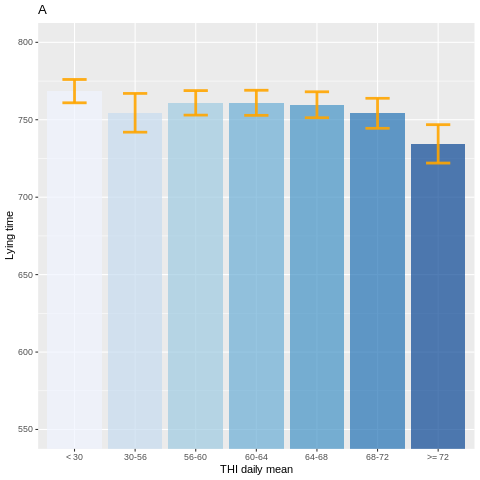

In [ ]:
%%R
finaldf<-finaldfD

finaldf$THImean <-factor(finaldf$THImean, levels=c("< 30","30-56","56-60","60-64","64-68","68-72",">= 72"))
p <-ggplot(finaldf)+ geom_bar( aes(x=THImean , y=lsmean, fill=THImean ), stat="identity",,alpha=0.7)+
geom_errorbar( aes(x=THImean, ymin=lower.CL, ymax=upper.CL), width=0.4, colour="orange", alpha=0.9, size=1.3)
p + coord_cartesian(ylim=c(550,800))+ scale_fill_brewer(palette= "Blues")+ theme(legend.position= "none")+ 
labs(x = "THI daily mean")+ labs(y = "Lying time")+labs(title = "A")+ theme(plot.title = element_text(hjust = 0))

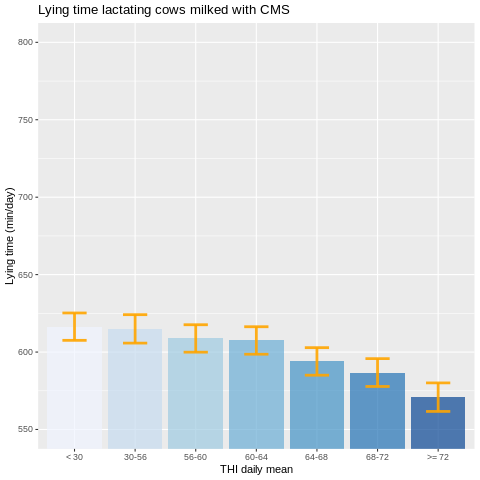

In [ ]:
%%R
finaldf<-finaldfC

finaldf$THImean <-factor(finaldf$THImean, levels=c("< 30","30-56","56-60","60-64","64-68","68-72",">= 72"))
p <-ggplot(finaldf)+ geom_bar( aes(x=THImean , y=lsmean, fill=THImean ), stat="identity",,alpha=0.7)+
geom_errorbar( aes(x=THImean, ymin=lower.CL, ymax=upper.CL), width=0.4, colour="orange", alpha=0.9, size=1.3)
p + coord_cartesian(ylim=c(550,800))+ scale_fill_brewer(palette= "Blues")+ theme(legend.position= "none")+ 
labs(x = "THI daily mean")+ labs(y = "Lying time (min/day)")+labs(title = "Lying time lactating cows milked with CMS")


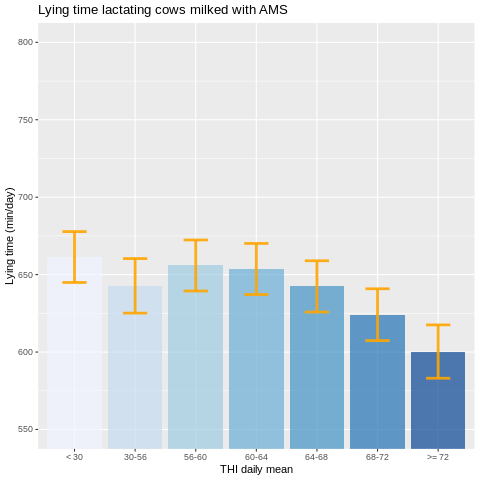

In [ ]:
%%R
finaldf<-finaldfA
finaldf$THImean <-factor(finaldf$THImean, levels=c("< 30","30-56","56-60","60-64","64-68","68-72",">= 72"))
p <-ggplot(finaldf)+ geom_bar( aes(x=THImean , y=lsmean, fill=THImean ), stat="identity",,alpha=0.7)+
geom_errorbar( aes(x=THImean, ymin=lower.CL, ymax=upper.CL), width=0.4, colour="orange", alpha=0.9, size=1.3)
p + coord_cartesian(ylim=c(550,800))+ scale_fill_brewer(palette= "Blues")+ theme(legend.position= "none")+ 
labs(x = "THI daily mean")+ labs(y = "Lying time (min/day)")+labs(title = "Lying time lactating cows milked with AMS")


In [ ]:
%%R
LSMsAL<-emmeans::lsmeans(fit.1a, ~ fThiMeanCat, glhargs=list())
print(LSMsAL)

 fThiMeanCat lsmean   SE     df lower.CL upper.CL
 1              661 8.38 292580      645      678
 0              643 8.98 292580      625      660
 2              656 8.41 292580      639      672
 3              654 8.42 292580      637      670
 4              642 8.44 292580      626      659
 5              624 8.54 292580      607      641
 6              600 8.79 292580      583      618

Results are averaged over the levels of: fDimCat, fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 


In [ ]:
%%R
LSMsCL<-emmeans::lsmeans(fit.1b, ~ fThiMeanCat, glhargs=list())
print(LSMsCL)

 fThiMeanCat lsmean   SE     df lower.CL upper.CL
 1              616 4.51 637665      608      625
 0              615 4.68 637665      606      624
 2              609 4.52 637665      600      618
 3              607 4.53 637665      599      616
 4              594 4.54 637665      585      603
 5              587 4.58 637665      578      596
 6              571 4.70 637665      562      580

Results are averaged over the levels of: fDimCat, fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 


In [ ]:
%%R
LSMsDL<-emmeans::lsmeans(fit.1c, ~ fThiMeanCat, glhargs=list())
print(LSMsDL)

 fThiMeanCat lsmean   SE    df lower.CL upper.CL
 1              768 3.84 75404      761      776
 0              754 6.38 75404      742      767
 2              761 4.03 75404      753      769
 3              761 4.13 75404      753      769
 4              760 4.27 75404      751      768
 5              754 4.94 75404      744      764
 6              734 6.33 75404      722      747

Results are averaged over the levels of: fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 


## Temperature mean figures results

In [ ]:
%%R
url_model6a <- "/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMeanAMS.R"
model<- load(file= url_model6a)
url_model6b <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMeanCMS.R'
model<- load(file= url_model6b)
url_model6c <- '/content/drive/Shareddrives/Bovi-Analytics/Projects/JosjeScheurwater/ProjectHeatStressSensor/data/out/lying/models/ModelTempMeanDRY.R'
model<- load(file= url_model6c)

In [ ]:
%%R
##LSMs for dry cows
LSMsD<-emmeans::lsmeans(fit.6c, ~ fTempMeanCat, glhargs=list())
dfD<-LSMsD%>%
  as.data.frame()

## LSMSs for AMS
LSMsA<-emmeans::lsmeans(fit.6a, ~ fTempMeanCat, glhargs=list())
dfA<-LSMsA%>%
  as.data.frame()

## LSMs for CMS
LSMsC<-emmeans::lsmeans(fit.6b, ~ fTempMeanCat, glhargs=list())
dfC<-LSMsC%>%
  as.data.frame()

In [ ]:
%%R
TempMean<- c("< 0","0-12","12-16","16-20","20-24","24-28",">= 28")
df1 <- data.frame(TempMean)
finaldfD<-cbind(df1,dfD)
finaldfD<- subset(finaldfD, select = -c(fTempMeanCat))
finaldfC<-cbind(df1,dfC)
finaldfC<- subset(finaldfC, select = -c(fTempMeanCat))
finaldfA<-cbind(df1,dfA)
finaldfA<- subset(finaldfA, select = -c(fTempMeanCat))


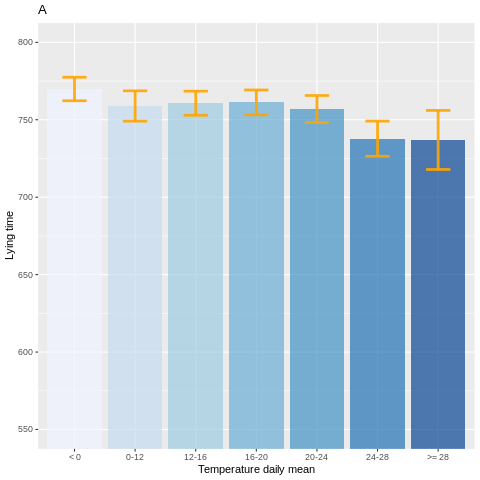

In [ ]:
%%R
finaldf<-finaldfD

finaldf$TempMean <-factor(finaldf$TempMean, levels=c("< 0","0-12","12-16","16-20","20-24","24-28",">= 28"))
p <-ggplot(finaldf)+ geom_bar( aes(x=TempMean , y=lsmean, fill=TempMean ), stat="identity",,alpha=0.7)+
geom_errorbar( aes(x=TempMean, ymin=lower.CL, ymax=upper.CL), width=0.4, colour="orange", alpha=0.9, size=1.3)
p + coord_cartesian(ylim=c(550,800))+ scale_fill_brewer(palette= "Blues")+ theme(legend.position= "none")+ 
labs(x = "Temperature daily mean")+ labs(y = "Lying time")+labs(title = "A")+ theme(plot.title = element_text(hjust = 0))

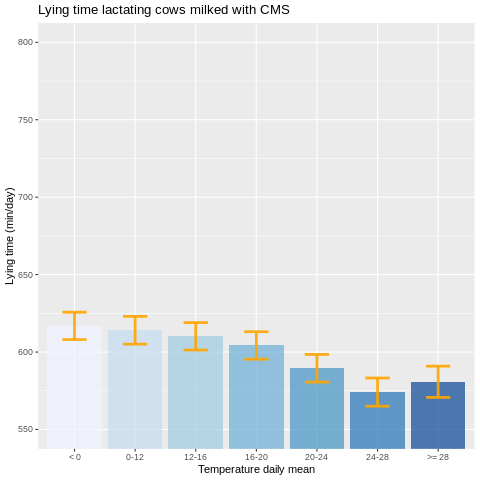

In [ ]:
%%R
finaldf<-finaldfC

finaldf$TempMean <-factor(finaldf$TempMean, levels=c("< 0","0-12","12-16","16-20","20-24","24-28",">= 28"))
p <-ggplot(finaldf)+ geom_bar( aes(x=TempMean , y=lsmean, fill=TempMean ), stat="identity",,alpha=0.7)+
geom_errorbar( aes(x=TempMean, ymin=lower.CL, ymax=upper.CL), width=0.4, colour="orange", alpha=0.9, size=1.3)
p + coord_cartesian(ylim=c(550,800))+ scale_fill_brewer(palette= "Blues")+ theme(legend.position= "none")+ 
labs(x = "Temperature daily mean")+ labs(y = "Lying time (min/day)")+labs(title = "Lying time lactating cows milked with CMS")


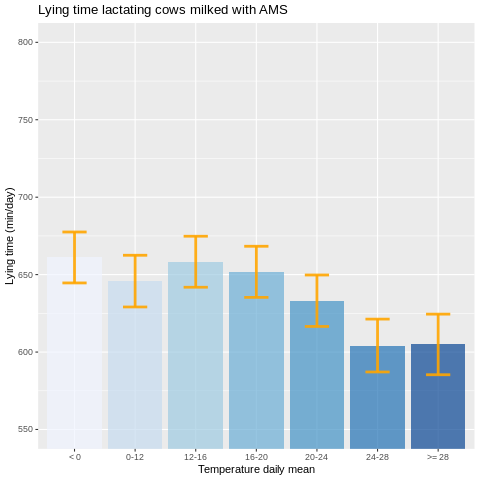

In [ ]:
%%R
finaldf<-finaldfA
finaldf$TempMean <-factor(finaldf$TempMean, levels=c("< 0","0-12","12-16","16-20","20-24","24-28",">= 28"))
p <-ggplot(finaldf)+ geom_bar( aes(x=TempMean , y=lsmean, fill=TempMean ), stat="identity",,alpha=0.7)+
geom_errorbar( aes(x=TempMean, ymin=lower.CL, ymax=upper.CL), width=0.4, colour="orange", alpha=0.9, size=1.3)
p + coord_cartesian(ylim=c(550,800))+ scale_fill_brewer(palette= "Blues")+ theme(legend.position= "none")+ 
labs(x = "Temperature daily mean")+ labs(y = "Lying time (min/day)")+labs(title = "Lying time lactating cows milked with AMS")


In [ ]:
%%R
LSMsAL<-emmeans::lsmeans(fit.6a, ~ fTempMeanCat, glhargs=list())
print(LSMsAL)

 fTempMeanCat lsmean   SE     df lower.CL upper.CL
 1               661 8.39 292580      645      678
 0               646 8.52 292580      629      662
 2               658 8.40 292580      642      675
 3               652 8.42 292580      635      668
 4               633 8.47 292580      617      650
 5               604 8.71 292580      587      621
 6               605 9.99 292580      585      624

Results are averaged over the levels of: fDimCat, fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 


In [ ]:
%%R
LSMsCL<-emmeans::lsmeans(fit.6b, ~ fTempMeanCat, glhargs=list())
print(LSMsCL)

 fTempMeanCat lsmean   SE     df lower.CL upper.CL
 1               617 4.51 637665      608      626
 0               614 4.58 637665      605      623
 2               610 4.52 637665      601      619
 3               604 4.53 637665      595      613
 4               590 4.55 637665      581      598
 5               574 4.65 637665      565      583
 6               581 5.15 637665      571      591

Results are averaged over the levels of: fDimCat, fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 


In [ ]:
%%R
LSMsDL<-emmeans::lsmeans(fit.6c, ~ fTempMeanCat, glhargs=list())
print(LSMsDL)

 fTempMeanCat lsmean   SE    df lower.CL upper.CL
 1               770 3.87 75404      762      777
 0               759 4.99 75404      749      769
 2               761 3.97 75404      753      768
 3               761 4.08 75404      753      769
 4               757 4.44 75404      748      766
 5               738 5.80 75404      726      749
 6               737 9.73 75404      718      756

Results are averaged over the levels of: fLactationNumberCat, fYear, fMonth, fHerdIdentifier 
Confidence level used: 0.95 
